In [4]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
!pip install datasets
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import json

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 9.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 12.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver 

# Zero shot

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# –ö–∞–Ω–¥–∏–¥–∞—Ç–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
categories = ["–ü—Ä–µ—Ç–µ–Ω–∑–∏—è", "–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ", "–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å"]

In [ ]:
# –¢–µ–∫—Å—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
text = ["–°–µ—Ä–≤–∏—Å —É–∂–∞—Å–Ω—ã–π, —Ç–æ–≤–∞—Ä –¥–æ—Å—Ç–∞–≤–∏–ª–∏ —Å –æ–ø–æ–∑–¥–∞–Ω–∏–µ–º.",
        "–°–µ—Ä–≤–∏—Å –æ—Ç–ª–∏—á–Ω—ã–π, —Ç–æ–≤–∞—Ä –¥–æ—Å—Ç–∞–≤–∏–ª–∏ –≤–æ–≤—Ä–µ–º—è!",
        "–°–µ—Ä–≤–∏—Å —É–∂–∞—Å–Ω—ã–π, –º–Ω–µ –Ω–∏—á–µ–≥–æ –Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å, —É –º–µ–Ω—è –∫ –≤–∞—Å –º–Ω–æ–≥–æ –ø—Ä–µ—Ç–µ–Ω–∑–∏–π",
        "–ü—Ä–µ–¥–ª–∞–≥–∞—é –≤–∞–º —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è. –ö–∞–∫ –≤—ã —Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –º–æ–∏ –∏–¥–µ–∏ –∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏—á–∞—Ç—å?",
        "–°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∑–∞ —Ç–∞–∫–æ–π —Å–µ—Ä–≤–∏—Å, —è –≤–∞–º –æ—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω! –°–∞–º—ã–π –ª—É—á—à–∏–π —Å–µ—Ä–≤–∏—Å!"]
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.345, 0.341, 0.314] <--- –°–µ—Ä–≤–∏—Å —É–∂–∞—Å–Ω—ã–π, —Ç–æ–≤–∞—Ä –¥–æ—Å—Ç–∞–≤–∏–ª–∏ —Å –æ–ø–æ–∑–¥–∞–Ω–∏–µ–º.
['–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.366, 0.35, 0.284] <--- –°–µ—Ä–≤–∏—Å –æ—Ç–ª–∏—á–Ω—ã–π, —Ç–æ–≤–∞—Ä –¥–æ—Å—Ç–∞–≤–∏–ª–∏ –≤–æ–≤—Ä–µ–º—è!
['–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.873, 0.081, 0.046] <--- –°–µ—Ä–≤–∏—Å —É–∂–∞—Å–Ω—ã–π, –º–Ω–µ –Ω–∏—á–µ–≥–æ –Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å, —É –º–µ–Ω—è –∫ –≤–∞—Å –º–Ω–æ–≥–æ –ø—Ä–µ—Ç–µ–Ω–∑–∏–π
['–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.722, 0.246, 0.032] <--- –ü—Ä–µ–¥–ª–∞–≥–∞—é –≤–∞–º —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è. –ö–∞–∫ –≤—ã —Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –º–æ–∏ –∏–¥–µ–∏ –∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏—á–∞—Ç—å?
['–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ü—Ä–µ—Ç–µ–Ω–∑–∏—è'] : [0.88, 0.

In [ ]:
# –¢–µ–∫—Å—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
text = ["–í—Å—ë –ø–ª–æ—Ö–æ", "–ü—Ä–µ–¥–ª–∞–≥–∞—é –∏–¥–µ—é", "–°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ"]
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å', '–ü—Ä–µ—Ç–µ–Ω–∑–∏—è'] : [0.357, 0.355, 0.287] <--- –í—Å—ë –ø–ª–æ—Ö–æ
['–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.583, 0.248, 0.169] <--- –ü—Ä–µ–¥–ª–∞–≥–∞—é –∏–¥–µ—é
['–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ü—Ä–µ—Ç–µ–Ω–∑–∏—è'] : [0.353, 0.337, 0.31] <--- –°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ


In [ ]:
# –¢–µ–∫—Å—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
text = categories
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.818, 0.134, 0.048] <--- –ü—Ä–µ—Ç–µ–Ω–∑–∏—è
['–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.771, 0.174, 0.055] <--- –ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ
['–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ü—Ä–µ—Ç–µ–Ω–∑–∏—è'] : [0.797, 0.109, 0.094] <--- –ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å


In [ ]:
# –¢–µ–∫—Å—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
text = ['–î–æ–±—Ä—ã–π –¥–µ–Ω—å. –ù–µ–¥–∞–≤–Ω–æ —É–∑–Ω–∞–ª, —á—Ç–æ –≤ –ü—Ä–æ–º—Å–≤—è–∑—å–±–∞–Ω–∫–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç –∞–∫—Ü–∏—è "–º–æ–π —Å—É–ø–µ—Ä–ø—Ä–∏–∑". –ò —Ä–µ—à–∏–ª –æ–±—Ä–∞—Ç–∏—Ç—Å—è 18 –¥–µ–∫–∞–±—Ä—è 2024 –≥–æ–¥–∞ –≤ 13-50 –≤ —á–∞—Ç –±–∞–Ω–∫–∞ –∑–∞ –ø–æ–¥—Ä–æ–±–Ω—ã–º–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è–º–∏ –ø–æ –¥–∞–Ω–Ω–æ–π –∞–∫—Ü–∏–∏.'
        '–û–ø–µ—Ä–∞—Ç–æ—Ä –ö–∞—Ä–∏–Ω–∞ –º–æ–º–µ–Ω—Ç–∞–ª—å–Ω–æ –ø–æ–¥–∫–ª—é—á–∏–ª–∞—Å—å –∫ –¥–∏–∞–ª–æ–≥—É, –≤–µ–∂–ª–∏–≤–æ –ø–æ–∑–¥–æ—Ä–æ–≤–∞–ª–∞—Å—å —Å–æ –º–Ω–æ–π –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª–∞ –º–Ω–µ –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è –ø–æ –¥–∞–Ω–Ω–æ–º—É –≤–æ–ø—Ä–æ—Å—É. –¢–∞–∫–∂–µ –æ–Ω–∞ –≤–∫–ª—é—á–∏–ª–∞ –º–µ–Ω—è –≤ –¥–∞–Ω–Ω—É—é –∞–∫—Ü–∏—é –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –≤ —á–∞—Ç–µ. –ê —Ç–∞–∫–∂–µ –¥–∞–ª–∞ –≤—Å—é –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∫–∞–∫–æ–π –∏–º–µ–Ω–Ω–æ —è –¥–æ–ª–∂–µ–Ω –æ—Ç–∫—Ä—ã—Ç—å –≤–∫–ª–∞–¥ –∏ –Ω–∞ –∫–∞–∫–æ–π —Å—Ä–æ–∫, —á—Ç–æ–±—ã —Å–æ–±–ª—é—Å—Ç–∏ –≤—Å–µ —É—Å–ª–æ–≤–∏—è –¥–∞–Ω–Ω–æ–π –∞–∫—Ü–∏–∏.'
        '–ù–∞ –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –º–æ–∏ –≤–æ–ø—Ä–æ—Å—ã –æ—Ç–≤–µ—Ç–∏–ª–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä –í–µ—Ä–æ–Ω–∏–∫–∞ –∏ –ø–æ–º–æ–≥–ª–∞ –º–Ω–µ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ –¥–∞–Ω–Ω–æ–º –≤–æ–ø—Ä–æ—Å–µ. –°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é –∏ –≥—Ä–∞–º–æ—Ç–Ω—É—é –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é. –°–∞–º –±—ã —è –Ω–µ —Ä–∞–∑–æ–±—Ä–∞–ª—Å—è.']
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.616, 0.288, 0.096] <--- –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –ù–µ–¥–∞–≤–Ω–æ —É–∑–Ω–∞–ª, —á—Ç–æ –≤ –ü—Ä–æ–º—Å–≤—è–∑—å–±–∞–Ω–∫–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç –∞–∫—Ü–∏—è "–º–æ–π —Å—É–ø–µ—Ä–ø—Ä–∏–∑". –ò —Ä–µ—à–∏–ª –æ–±—Ä–∞—Ç–∏—Ç—Å—è 18 –¥–µ–∫–∞–±—Ä—è 2024 –≥–æ–¥–∞ –≤ 13-50 –≤ —á–∞—Ç –±–∞–Ω–∫–∞ –∑–∞ –ø–æ–¥—Ä–æ–±–Ω—ã–º–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è–º–∏ –ø–æ –¥–∞–Ω–Ω–æ–π –∞–∫—Ü–∏–∏.–û–ø–µ—Ä–∞—Ç–æ—Ä –ö–∞—Ä–∏–Ω–∞ –º–æ–º–µ–Ω—Ç–∞–ª—å–Ω–æ –ø–æ–¥–∫–ª—é—á–∏–ª–∞—Å—å –∫ –¥–∏–∞–ª–æ–≥—É, –≤–µ–∂–ª–∏–≤–æ –ø–æ–∑–¥–æ—Ä–æ–≤–∞–ª–∞—Å—å —Å–æ –º–Ω–æ–π –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª–∞ –º–Ω–µ –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è –ø–æ –¥–∞–Ω–Ω–æ–º—É –≤–æ–ø—Ä–æ—Å—É. –¢–∞–∫–∂–µ –æ–Ω–∞ –≤–∫–ª—é—á–∏–ª–∞ –º–µ–Ω—è –≤ –¥–∞–Ω–Ω—É—é –∞–∫—Ü–∏—é –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –≤ —á–∞—Ç–µ. –ê —Ç–∞–∫–∂–µ –¥–∞–ª–∞ –≤—Å—é –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∫–∞–∫–æ–π –∏–º–µ–Ω–Ω–æ —è –¥–æ–ª–∂–µ–Ω –æ—Ç–∫—Ä—ã—Ç—å –≤–∫–ª–∞–¥ –∏ –Ω–∞ –∫–∞–∫–æ–π —Å—Ä–æ–∫, —á—Ç–æ–

In [ ]:
# –¢–µ–∫—Å—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
text = ['–î–æ–±—Ä—ã–π –¥–µ–Ω—å!'
        '–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –∏—Å–∫—Ä–µ–Ω–Ω—é—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫—É –†-–≤–æ–π –ú–∞—Ä–∏–∏ –ë. - —É–ø—Ä–∞–≤–ª—è—é—â–µ–º—É –î–û ¬´–ü–æ–±–µ–¥–∞¬ª –≤ –≥. –°–∞–º–∞—Ä–∞ –ø–æ –∞–¥—Ä–µ—Å—É —É–ª. –ü–æ–±–µ–¥—ã, –¥. 92 –∑–∞ –µ–µ –∫–æ–º–ø–µ—Ç–µ–Ω—Ç–Ω–æ—Å—Ç—å, –¥–æ–±—Ä–æ–∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å, –∑–∞ –Ω–µ—Ä–∞–≤–Ω–æ–¥—É—à–∏–µ –∏ —É–º–µ–Ω–∏–µ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–ª–∏–µ–Ω—Ç–∞–º–∏.'
        '12.11.2024–≥ —è –ø–∏—Å—å–º–µ–Ω–Ω–æ –æ–±—Ä–∞—Ç–∏–ª–∞—Å—å –≤ –ü–°–ë —Å –≤–æ–ø—Ä–æ—Å–æ–º –æ —Ç–æ–º, –ø–æ—á–µ–º—É —É—Å–ª–æ–≤–∏—è –æ—Ç–∫—Ä—ã—Ç–æ–≥–æ –º–Ω–æ–π –≤–∫–ª–∞–¥–∞ –≤ –î–æ–≥–æ–≤–æ—Ä–µ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è —Å —É—Å–ª–æ–≤–∏—è–º–∏ —ç—Ç–æ–≥–æ –∂–µ –≤–∫–ª–∞–¥–∞ –≤ –º–æ–±–∏–ª—å–Ω–æ–º –±–∞–Ω–∫–µ. –ö–ª–∏–µ–Ω—Ç—Å–∫–∏–π –æ—Ç–¥–µ–ª –ü—Ä–∏–≤–æ–ª–∂—Å–∫–æ–≥–æ —Ñ–∏–ª–∏–∞–ª–∞ –ü–ê–° –ü–°–ë, –∫—É–¥–∞ –±—ã–ª–∏ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω—ã –º–æ–∏ –ø–∏—Å—å–º–µ–Ω–Ω—ã–µ –∑–∞–ø—Ä–æ—Å—ã, –æ–≥—Ä–∞–Ω–∏—á–∏–ª—Å—è —Ñ–æ—Ä–º–∞–ª—å–Ω—ã–º–∏ –æ—Ç–ø–∏—Å–∫–∞–º–∏ ‚Äì —Ü–∏—Ç–∞—Ç–æ–π –∏–∑ —É—Å–ª–æ–≤–∏–π, –ø—Ä–µ–¥—É—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –î–æ–≥–æ–≤–æ—Ä–æ–º, –Ω–æ –Ω–µ –æ–±—ä—è—Å–Ω—è—é—â–∏—Ö –∫–æ–Ω–∫—Ä–µ—Ç–Ω—É—é —Å–∏—Ç—É–∞—Ü–∏—é.'
        '–ú–∞—Ä–∏—è –ë. ‚Äì –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π —Å–æ—Ç—Ä—É–¥–Ω–∏–∫, –∫–æ—Ç–æ—Ä—ã–π –¥–æ—Å–∫–æ–Ω–∞–ª—å–Ω–æ —Ä–∞–∑–æ–±—Ä–∞–ª—Å—è –≤ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–µ–º –º–µ–Ω—è –≤–æ–ø—Ä–æ—Å–µ, –ø–æ–Ω—è–≤ –µ–≥–æ —Å—É—Ç—å. –ò–º–µ–Ω–Ω–æ –æ–Ω–∞ –Ω–∞—à–ª–∞ –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö –ü–°–ë –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏. '
        '–°–ø–∞—Å–∏–±–æ –í–∞–º, –ú–∞—Ä–∏—è –ë.!']
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å', '–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ'] : [0.435, 0.323, 0.243] <--- –î–æ–±—Ä—ã–π –¥–µ–Ω—å!–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –∏—Å–∫—Ä–µ–Ω–Ω—é—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫—É –†-–≤–æ–π –ú–∞—Ä–∏–∏ –ë. - —É–ø—Ä–∞–≤–ª—è—é—â–µ–º—É –î–û ¬´–ü–æ–±–µ–¥–∞¬ª –≤ –≥. –°–∞–º–∞—Ä–∞ –ø–æ –∞–¥—Ä–µ—Å—É —É–ª. –ü–æ–±–µ–¥—ã, –¥. 92 –∑–∞ –µ–µ –∫–æ–º–ø–µ—Ç–µ–Ω—Ç–Ω–æ—Å—Ç—å, –¥–æ–±—Ä–æ–∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å, –∑–∞ –Ω–µ—Ä–∞–≤–Ω–æ–¥—É—à–∏–µ –∏ —É–º–µ–Ω–∏–µ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–ª–∏–µ–Ω—Ç–∞–º–∏.12.11.2024–≥ —è –ø–∏—Å—å–º–µ–Ω–Ω–æ –æ–±—Ä–∞—Ç–∏–ª–∞—Å—å –≤ –ü–°–ë —Å –≤–æ–ø—Ä–æ—Å–æ–º –æ —Ç–æ–º, –ø–æ—á–µ–º—É —É—Å–ª–æ–≤–∏—è –æ—Ç–∫—Ä—ã—Ç–æ–≥–æ –º–Ω–æ–π –≤–∫–ª–∞–¥–∞ –≤ –î–æ–≥–æ–≤–æ—Ä–µ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è —Å —É—Å–ª–æ–≤–∏—è–º–∏ —ç—Ç–æ–≥–æ –∂–µ –≤–∫–ª–∞–¥–∞ –≤ –º–æ–±–∏–ª—å–Ω–æ–º –±–∞–Ω–∫–µ. –ö–ª–∏–µ–Ω—Ç—Å–∫–∏–π –æ—Ç–¥–µ–ª –ü—Ä–∏–≤–æ–ª–∂—Å–∫–æ–≥–æ —Ñ–∏–ª–∏–∞–ª–∞ –ü–ê–° –ü–°–ë, –∫—É–¥–∞ –±—ã–ª–∏ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω—ã –º–æ–∏ –ø–∏—Å—å–º–µ–Ω–Ω—ã–µ –∑–∞–ø—Ä–æ—Å—ã, –æ–≥—Ä–∞–Ω–

In [ ]:
# –¢–µ–∫—Å—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
text = ['–ß–µ—Ç—ã—Ä–µ –¥–Ω—è –Ω–∞–∑–∞–¥ –ø–æ–ª—É—á–∏–ª–∞ –¥–µ–±–µ—Ç–æ–≤—É—é –∫–∞—Ä—Ç—É –ü–°–ë (–¥–æ—Å—Ç–∞–≤–∫–∞ –∫—É—Ä—å–µ—Ä–æ–º) –ö–∞—Ä—Ç–∞ –Ω–µ –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–∞ –¥–æ —Å–∏—Ö –ø–æ—Ä ("–Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞ –¥–ª—è –≤—Ö–æ–¥–∞", —Ç.–∫. '
        '"–∫—É—Ä—å–µ—Ä –Ω–µ –ø–µ—Ä–µ–¥–∞–ª —Å–≤–µ–¥–µ–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫–∞") –ü–æ–≤—Ç–æ—Ä–Ω—ã–µ –æ–±—Ä–∞—â–µ–Ω–∏—è –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ - –±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞! –ü–æ–ª–Ω–∞—è –Ω–µ—Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫—É—Ä—å–µ—Ä—Å–∫–æ–π —Å–ª—É–∂–±—ã –∏ —Å–ª—É–∂–±—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏! –ü–æ–∑–æ—Ä!']
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.638, 0.222, 0.141] <--- –ß–µ—Ç—ã—Ä–µ –¥–Ω—è –Ω–∞–∑–∞–¥ –ø–æ–ª—É—á–∏–ª–∞ –¥–µ–±–µ—Ç–æ–≤—É—é –∫–∞—Ä—Ç—É –ü–°–ë (–¥–æ—Å—Ç–∞–≤–∫–∞ –∫—É—Ä—å–µ—Ä–æ–º) –ö–∞—Ä—Ç–∞ –Ω–µ –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–∞ –¥–æ —Å–∏—Ö –ø–æ—Ä ("–Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞ –¥–ª—è –≤—Ö–æ–¥–∞", —Ç.–∫. "–∫—É—Ä—å–µ—Ä –Ω–µ –ø–µ—Ä–µ–¥–∞–ª —Å–≤–µ–¥–µ–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫–∞") –ü–æ–≤—Ç–æ—Ä–Ω—ã–µ –æ–±—Ä–∞—â–µ–Ω–∏—è –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ - –±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞! –ü–æ–ª–Ω–∞—è –Ω–µ—Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫—É—Ä—å–µ—Ä—Å–∫–æ–π —Å–ª—É–∂–±—ã –∏ —Å–ª—É–∂–±—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏! –ü–æ–∑–æ—Ä!


In [ ]:
# –¢–µ–∫—Å—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
text = ["""
–ü—Ä–æ—à—É —Ä–µ–≥—É–ª—è—Ç–æ—Ä–Ω–æ –Ω–∞–¥–∑–∏—Ä–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ä–≥–∞–Ω—ã –≤ —á–∞—Å—Ç–∏ –∫–æ–Ω—Ç—Ä–æ–ª—è –∑–∞ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º–∏ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è–º–∏ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –º–æ–π –æ—Ç–∑—ã–≤!
–ò –Ω–∞ –±–∞–Ω–∫ –≤ —Ü–µ–ª–æ–º –∏ –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∞ ¬´—Ñ–ª–∞–≥–º–∞–Ω—Å–∫–∏–π¬ª –æ—Ñ–∏—Å ¬´–î–û –ö–∏—Ç–∞–π-–≥–æ—Ä–æ–¥¬ª .
–°–µ–≥–æ–¥–Ω—è 06.12.24 —è –±—ã–ª–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∫–ª–∏–µ–Ω—Ç–∞ –±–∞–Ω–∫–∞ –∏ –æ–∂–∏–¥–∞—è —Å–≤–æ—é –æ—á–µ—Ä–µ–¥—å —Å—Ç–∞–ª–∞ –Ω–µ–≤–æ–ª—å–Ω–æ–π —Å–≤–∏–¥–µ—Ç–µ–ª—å–Ω–∏—Ü–µ–π –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ —Å–µ—Ä—å–µ–∑–Ω–æ–≥–æ –Ω–∞—Ä—É—à–µ–Ω–∏—è!
–ú–Ω–æ—é –ó–∞–º–µ—á–µ–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ–µ –Ω–∞—Ä—É—à–µ–Ω–∏–µ –∑–∞–∫–æ–Ω–æ–¥–∞—Ç–µ–ª—å–Ω–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –≤ —á–∞—Å—Ç–∏ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–∞–Ω–∫–∞ , –∞ –∏–º–µ–Ω–Ω–æ: –ü–æ–∫–∞ —è —Å–∏–¥–µ–ª–∞ –≤ –æ—á–µ—Ä–µ–¥–∏ —è —É—Å–ª—ã—à–∞–ª–∞ —Ä–∞–∑–≥–æ–≤–æ—Ä —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü—ã —Ä–∞–±–æ—Ç–∞—é—â–µ–π –≤ –æ–∫–Ω–µ 3 (–Ω–µ –∑–Ω–∞—é –µ–µ –∏–º–µ–Ω–∏) –∏ –∫–ª–∏–µ–Ω—Ç–∞ –∫–æ—Ç–æ—Ä—ã–π –±—ã–ª –Ω–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏ –≤ –µ–µ –æ–∫–Ω–µ. –°–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ –ø–æ–ø—Ä–æ—Å–∏–ª–∞ –∫–ª–∏–µ–Ω—Ç–∞ –ø—Ä–µ–¥—ä—è–≤–∏—Ç—å –ø–∞—Å–ø–æ—Ä—Ç , –Ω–∞ —á—Ç–æ –∫–ª–∏–µ–Ω—Ç –¥–∞–ª –µ–π —Å–≤–æ–µ –≤–æ–¥–∏—Ç–µ–ª—å—Å–∫–æ–µ —É–¥–æ—Å—Ç–æ–≤–µ—Ä–µ–Ω–∏–µ,–Ω–æ —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ –≤—Å–µ –µ—â–µ —Ç—Ä–µ–±–æ–≤–∞–ª–∞ –ø–∞—Å–ø–æ—Ä—Ç.
–ö–ª–∏–µ–Ω—Ç –æ—Ç–∫–∞–∑—ã–≤–∞–ª—Å—è –¥–∞–≤–∞—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–µ —Å–≤–æ–π –ø–∞—Å–ø–æ—Ä—Ç , –º–æ—Ç–∏–≤–∏—Ä—É—è —ç—Ç–æ —Ç–µ–º, —á—Ç–æ –æ–Ω –≤–æ–ª–Ω—É–µ—Ç—Å—è –∑–∞ —Å–≤–æ–∏ –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ ¬´–∫–ª–∏–µ–Ω—Ç –≤—Å–µ–≥–¥–∞ –ø—Ä–∞–≤¬ª, —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ –ø—Ä–∏ —ç—Ç–æ–º —Å–∫–∞–∑–∞–ª–∞ —á—Ç–æ –ø–∞—Å–ø–æ—Ä—Ç –∫–∞–∫ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –¥–æ–∫—É–º–µ–Ω—Ç —É–¥–æ—Å—Ç–æ–≤–µ—Ä—è—é—â–∏–π –ª–∏—á–Ω–æ—Å—Ç—å –æ–Ω–∏ –æ–±—è–∑–∞–Ω—ã –ø—Ä–æ–≤–µ—Ä—è—Ç—å –Ω–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–º –ø—Ä–∏–±–æ—Ä–µ –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç —Ç–æ–≥–æ –Ω–µ –ø–æ–¥–¥–µ–ª—å–Ω—ã–π –ª–∏ –æ–Ω –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ.
–î–∞–ª–µ–µ —è –æ—Ç–≤–ª–µ–∫–ª–∞—Å—å –Ω–∞ —Ç–µ–ª–µ—Ñ–æ–Ω –∏ –ø—Ä–æ–ø—É—Å—Ç–∏–ª–∞ —á–∞—Å—Ç—å –∏—Ö –¥–∏–∞–ª–æ–≥–∞ ( –æ—á–µ–Ω—å –∂–∞–ª—å!) –∏ –≤–∫–ª—é—á–∏–ª–∞—Å—å –æ–±—Ä–∞—Ç–Ω–æ –≤ –ø—Ä–æ—Ü–µ—Å—Å –Ω–∞ —Ç–æ–º, —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ (–≤–º–µ—Å—Ç–µ —Å –ï–ª–∏–∑–∞–≤–µ—Ç–æ–π –∏–∑ –æ–∫–Ω–∞ 2) –∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä–æ–≤–∞–ª–∏ –∫–ª–∏–µ–Ω—Ç–∞ –ø–æ –≤–æ–ø—Ä–æ—Å—É —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ (–∏–∑ –¥–∏–∞–ª–æ–≥–∞ –º–Ω–µ —Å—Ç–∞–ª–æ –ø–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ –∫–ª–∏–µ–Ω—Ç –≤–ª–∞–¥–µ–µ—Ç —Ü–µ–Ω–Ω—ã–º–∏ –±—É–º–∞–≥–∞–º–∏ –∏ —è–≤–ª—è–µ—Ç—Å—è –∫–ª–∏–µ–Ω—Ç–æ–º VIP —Å–µ–≥–º–µ–Ω—Ç–∞ orange premium club.
–°–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ —É—Ç–æ—á–Ω—è–ª–∞ —É –∫–ª–∏–µ–Ω—Ç–∞ —á—Ç–æ-—Ç–æ —Å–≤—è–∑–∞–Ω–Ω–æ–µ —Å —Ü–∏—Ñ—Ä–∞–º–∏ –Ω–∞ –µ–≥–æ —Å—á–µ—Ç–µ –∏ –≤—Å–µ —ç—Ç–æ –±—ã–ª–æ –ü–û–°–õ–ï —Ç–æ–≥–æ –∫–∞–∫ –∫–ª–∏–µ–Ω—Ç–∞ –ø—Ä–æ—Å–∏–ª–∏ –¥–∞—Ç—å –ø–∞—Å–ø–æ—Ä—Ç –∏ –æ–Ω –æ—Ç–∫–∞–∑–∞–ª—Å—è. –ü—Ä–æ—à—É –ø—Ä–æ–≤–µ—Å—Ç–∏ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—É—é –ø—Ä–æ–≤–µ—Ä–∫—É —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ ¬´–î–û –ö–∏—Ç–∞–π –≥–æ—Ä–æ–¥¬ª –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç –¥–∞–Ω–Ω–æ–≥–æ –∏–Ω—Ü–∏–¥–µ–Ω—Ç–∞ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –≤–ª–µ–∫—É—â–µ–≥–æ –∑–∞ —Å–æ–±–æ–π –æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–Ω—ã–µ , —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ –∏ —Ä–µ–≥—É–ª—è—Ç–æ—Ä—ã–µ —Ä–∏—Å–∫–∏ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–∞ –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å!
–¢–∞–∫–∞—è —Ä–∞–±–æ—Ç–∞ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º–∞!
–Ω—É –∏ –∫–æ–Ω–µ—á–Ω–æ —Ä–∞–∑ —É–∂ —Ç–∞–∫–∏–µ –Ω–∞—Ä—É—à–µ–Ω–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å , —Ç–æ –æ—Å—Ç–∞–ª—å–Ω–æ–µ —É–∂–µ –∫–∞–∂–µ—Ç—Å—è –∏–≥–æ–ª–∫–æ–π –≤ —Å—Ç–æ–≥—É —Å–µ–Ω–∞ :
2) –Ø –ø—Ä–æ–∂–¥–∞–ª–∞ –æ—á–µ—Ä–µ–¥—å –ø–æ —Å–≤–æ–µ–º—É —Ç–∞–ª–æ–Ω—É –±–æ–ª–µ–µ 1,5 —á–∞—Å–æ–≤ –≤–≤–∏–¥—É —Ç–æ–≥–æ —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ –ï–ª–∏–∑–∞–≤–µ—Ç–∞ (–æ–∫–Ω–æ 2) –∑–∞–±–∏—Ä–∞–ª–∞ –¥—Ä—É–≥–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–µ–∑ –æ—á–µ—Ä–µ–¥–∏ –ø—Ä–∏ —ç—Ç–æ–º –¥–µ–ª–∞–ª–∞ –∏–º –∑–∞–º–µ—á–∞–Ω–∏—è –Ω–æ –Ω–µ –ø—Ä–æ—Å–∏–ª–∞ –ø–æ–∫–∏–Ω—É—Ç—å –æ–∫–Ω–æ –∏ –ø—Ä–æ–¥–æ–ª–∂–∞–ª–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ.
3) –°–æ—Ç—Ä—É–¥–Ω–∏—Ü—ã —É–º—É–¥—Ä–∏–ª–∏—Å—å –ø–æ—Ç–µ—Ä—è—Ç—å –º–æ–π —Ç–∞–ª–æ–Ω —Å –Ω–æ–º–µ—Ä–æ–º –ü–ö–û (–∑–∞—á–µ–º-—Ç–æ –Ω–æ–º–µ—Ä –æ—Ä–¥–µ—Ä–∞ –æ–Ω–∏ –ø–∏—à—É—Ç —Ä—É—á–∫–æ–π –Ω–∞ —Ç–∞–ª–æ–Ω–∞—Ö –ø–æ –∫–æ—Ç–æ—Ä—ã–º –≤—ã–∑—ã–≤–∞—é—Ç –∫–ª–∏–µ–Ω—Ç–æ–≤) –∑–∞ –¥–≤–∞ —à–∞–≥–∞ –æ—Ç –æ–∫–Ω–∞ –¥–æ –∫–∞—Å—Å—ã –±–µ–∑ –∫–æ—Ç–æ—Ä–æ–≥–æ –Ω–µ —Å–º–æ–≥–ª–∏ –º–Ω–µ –≤–Ω–µ—Å—Ç–∏ –¥–µ–Ω—å–≥–∏ –Ω–∞ —Å—á–µ—Ç –∏ —Ç—Ä–µ–±–æ–≤–∞–ª–∏ –µ–≥–æ —Å –º–µ–Ω—è.
–Ø –Ω–∞—á–∞–ª–∞ –≤–æ–∑–º—É—â–∞—Ç—å—Å—è –Ω–∞ —Å—á–µ—Ç —Ç–æ–≥–æ —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –≤–≤–æ–¥—è—Ç –º–µ–Ω—è –∫–∞–∫ –∫–ª–∏–µ–Ω—Ç–∞ –≤ –∑–∞–±–ª—É–∂–¥–µ–Ω–∏–µ , –Ω–∞ —á—Ç–æ —É—Å–ª—ã—à–∞–≤ –ï–ª–∏–∑–∞–≤–µ—Ç–∞ –ø—Ä–∏—à–ª–∞ –∏ –Ω–∞—á–∞–ª–∞ —É–≥—Ä–æ–∂–∞—Ç—å –º–Ω–µ —á—Ç–æ –ø–æ–∑–æ–≤–µ—Ç –æ—Ö—Ä–∞–Ω—É –∏ –Ω–∞–∂–º–µ—Ç —Ç—Ä–µ–≤–æ–∂–Ω—É—é –∫–Ω–æ–ø–∫—É. –°–æ–±—Å—Ç–≤–µ–Ω–Ω–æ –æ—Ö—Ä–∞–Ω–Ω–∏–∫ –∏ –ø—Ä–∏—à–µ–ª –∏ —Å—Ç–∞–ª –Ω–µ–≤–æ–ª—å–Ω—ã–º —Å–≤–∏–¥–µ—Ç–µ–ª–µ–º —Ç–æ–≥–æ, —á—Ç–æ –º–æ–π —Ç–∞–ª–æ–Ω –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø–æ—Ç–µ—Ä—è–ª–∏ –≤ –∫–∞—Å—Å–µ . –î–æ–≤–µ–ª–∏ –º–µ–Ω—è –¥–æ –∏—Å—Ç–µ—Ä–∏–∫–∏.
—ç—Ç–æ –≤–æ—Ç —Ç–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –±–∞–Ω–∫ —Å –≥–æ—Å —É—á–∞—Å—Ç–∏–µ–º –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –≤–æ–µ–Ω–Ω–æ—Å–ª—É–∂–∞—â–∏—Ö –†–æ—Å—Å–∏–∏?
"""]
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
result = classifier(text, candidate_labels=categories)
print(*[f'{res["labels"]} : {[round(x, 3) for x in res["scores"]]} <--- {res["sequence"]}' for res in result], sep='\n')

['–ü—Ä–µ—Ç–µ–Ω–∑–∏—è', '–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ', '–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å'] : [0.425, 0.349, 0.226] <--- 
–ü—Ä–æ—à—É —Ä–µ–≥—É–ª—è—Ç–æ—Ä–Ω–æ –Ω–∞–¥–∑–∏—Ä–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ä–≥–∞–Ω—ã –≤ —á–∞—Å—Ç–∏ –∫–æ–Ω—Ç—Ä–æ–ª—è –∑–∞ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º–∏ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è–º–∏ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –º–æ–π –æ—Ç–∑—ã–≤!
–ò –Ω–∞ –±–∞–Ω–∫ –≤ —Ü–µ–ª–æ–º –∏ –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∞ ¬´—Ñ–ª–∞–≥–º–∞–Ω—Å–∫–∏–π¬ª –æ—Ñ–∏—Å ¬´–î–û –ö–∏—Ç–∞–π-–≥–æ—Ä–æ–¥¬ª . 
–°–µ–≥–æ–¥–Ω—è 06.12.24 —è –±—ã–ª–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∫–ª–∏–µ–Ω—Ç–∞ –±–∞–Ω–∫–∞ –∏ –æ–∂–∏–¥–∞—è —Å–≤–æ—é –æ—á–µ—Ä–µ–¥—å —Å—Ç–∞–ª–∞ –Ω–µ–≤–æ–ª—å–Ω–æ–π —Å–≤–∏–¥–µ—Ç–µ–ª—å–Ω–∏—Ü–µ–π –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ —Å–µ—Ä—å–µ–∑–Ω–æ–≥–æ –Ω–∞—Ä—É—à–µ–Ω–∏—è!
–ú–Ω–æ—é –ó–∞–º–µ—á–µ–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ–µ –Ω–∞—Ä—É—à–µ–Ω–∏–µ –∑–∞–∫–æ–Ω–æ–¥–∞—Ç–µ–ª—å–Ω–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –≤ —á–∞—Å—Ç–∏ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–∞–Ω–∫–∞ , –∞ –∏–º–µ–Ω–Ω–æ: –ü–æ–∫–∞ —è —Å–∏–¥–µ–ª–∞ –≤ –æ—á–µ—Ä–µ–¥–∏ —è —É—Å–ª—ã—à–∞–ª–∞ —Ä–∞–∑–≥–æ–≤–æ—Ä —Å–æ—Ç—Ä—É–¥–Ω–

# ruBERT

In [ ]:
# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
data = {
    "text": [
        '–ù–µ–¥–∞–≤–Ω–æ —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –ø—Ä–æ–±–ª–µ–º–æ–π –ø—Ä–∏ –ø–µ—Ä–µ–≤–æ–¥–µ —Å—Ä–µ–¥—Å—Ç–≤ —á–µ—Ä–µ–∑ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –°—É–º–º–∞ –±—ã–ª–∞ —Å–ø–∏—Å–∞–Ω–∞ —Å –º–æ–µ–≥–æ —Å—á–µ—Ç–∞, –Ω–æ –ø–æ–ª—É—á–∞—Ç–µ–ª—å —Ç–∞–∫ –∏ –Ω–µ –ø–æ–ª—É—á–∏–ª –¥–µ–Ω—å–≥–∏. –û–ø–µ—Ä–∞—Ç–æ—Ä—ã –Ω–∞ –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ –Ω–µ —Å–º–æ–≥–ª–∏ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ —Ä–µ—à–∏—Ç—å –≤–æ–ø—Ä–æ—Å, –ø–æ–ø—Ä–æ—Å–∏–ª–∏ –ø–æ–¥–æ–∂–¥–∞—Ç—å –¥–æ 5 —Ä–∞–±–æ—á–∏—Ö –¥–Ω–µ–π. –≠—Ç–æ –∞–±—Å–æ–ª—é—Ç–Ω–æ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º–æ –¥–ª—è —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ –±–∞–Ω–∫–∞. –ü–æ–∂–∞–ª—É–π—Å—Ç–∞, –¥–æ—Ä–∞–±–æ—Ç–∞–π—Ç–µ –ø—Ä–æ—Ü–µ—Å—Å –≤–æ–∑–≤—Ä–∞—Ç–∞ —Å—Ä–µ–¥—Å—Ç–≤, —á—Ç–æ–±—ã —Ç–∞–∫–∏–µ –∑–∞–¥–µ—Ä–∂–∫–∏ –Ω–µ –ø–æ–≤—Ç–æ—Ä—è–ª–∏—Å—å.',
        '–°–ø–∞—Å–∏–±–æ –∑–∞ –≤–∞—à—É –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≤ —Ä–µ—à–µ–Ω–∏–∏ –≤–æ–ø—Ä–æ—Å–æ–≤! –ù–µ–¥–∞–≤–Ω–æ –ø–æ—Ç–µ—Ä—è–ª –∫–∞—Ä—Ç—É, –æ–±—Ä–∞—Ç–∏–ª—Å—è –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –∏ –º–Ω–µ –º–≥–Ω–æ–≤–µ–Ω–Ω–æ –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–ª–∏ –∫–∞—Ä—Ç—É –∏ –≤—ã–¥–∞–ª–∏ –Ω–æ–≤—É—é –≤ —Ç–æ—Ç –∂–µ –¥–µ–Ω—å. –í–ø–µ—á–∞—Ç–ª–µ–Ω –≤–∞—à–∏–º –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º–æ–º. –¢–∞–∫ –¥–µ—Ä–∂–∞—Ç—å! –•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –µ—â–µ –±–æ–ª—å—à–µ –ø–æ–¥–æ–±–Ω—ã—Ö –∏–Ω–∏—Ü–∏–∞—Ç–∏–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç–∞ –≤–∏—Ä—Ç—É–∞–ª—å–Ω—ã—Ö –∫–∞—Ä—Ç.',
        '–í–∞—à–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ, –Ω–æ –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å —É—Å—Ç–∞—Ä–µ–ª. –ú–æ–≥—É –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å –≤–Ω–µ–¥—Ä–∏—Ç—å –ø–µ—Ä—Å–æ–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Ç–µ–º—ã –∏ —É–ª—É—á—à–∏—Ç—å —Ä–∞–∑–¥–µ–ª –∞–Ω–∞–ª–∏—Ç–∏–∫–∏ —Ä–∞—Å—Ö–æ–¥–æ–≤, –¥–æ–±–∞–≤–∏–≤ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –±—é–¥–∂–µ—Ç–∞. –≠—Ç–æ —Å–¥–µ–ª–∞–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≤–∞—à–µ–≥–æ —Å–µ—Ä–≤–∏—Å–∞ —É–¥–æ–±–Ω–µ–µ –∏ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–µ–µ.',
        '–û—Ç–¥–µ–ª–µ–Ω–∏–µ –≤ –º–æ–µ–º —Ä–∞–π–æ–Ω–µ –≤—Å–µ–≥–¥–∞ –ø–µ—Ä–µ–ø–æ–ª–Ω–µ–Ω–æ, –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∂–¥–∞—Ç—å –±–æ–ª—å—à–µ —á–∞—Å–∞. –ù–∞–π–º–∏—Ç–µ –±–æ–ª—å—à–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤, —á—Ç–æ–±—ã —É—Å–∫–æ—Ä–∏—Ç—å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤.',
        '–û—á–µ–Ω—å —Ä–∞–¥—É–µ—Ç –≤–∞—à –∫—ç—à–±—ç–∫ –Ω–∞ –ø–æ–∫—É–ø–∫–∏! –ó–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü —Å—ç–∫–æ–Ω–æ–º–∏–ª –±–æ–ª—å—à–µ, —á–µ–º –∑–∞ –≥–æ–¥ —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º –±–∞–Ω–∫–æ–º.',
        '–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –º–≥–Ω–æ–≤–µ–Ω–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è –ª–∏–º–∏—Ç–∞ –Ω–∞ —Å–Ω—è—Ç–∏–µ –Ω–∞–ª–∏—á–Ω—ã—Ö —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –≠—Ç–æ –æ—á–µ–Ω—å —É–ø—Ä–æ—Å—Ç–∏–ª–æ –±—ã –∂–∏–∑–Ω—å.',
        '–ö–æ–º–∏—Å—Å–∏–∏ –∑–∞ —Å–Ω—è—Ç–∏–µ –¥–µ–Ω–µ–≥ —Å–ª–∏—à–∫–æ–º –≤—ã—Å–æ–∫–∏–µ!',
        '–°–ø–∞—Å–∏–±–æ –∑–∞ –∫—Ä—É–≥–ª–æ—Å—É—Ç–æ—á–Ω—É—é –ø–æ–¥–¥–µ—Ä–∂–∫—É ‚Äî —ç—Ç–æ —Å–ø–∞—Å–∞–µ—Ç!',
        '–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –ø–æ–¥–¥–µ—Ä–∂–∫—É Apple Pay –≤ –≤–∞—à–µ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏.',
        '–°–ª–∏—à–∫–æ–º –¥–æ–ª–≥–∏–π –ø—Ä–æ—Ü–µ—Å—Å –æ–¥–æ–±—Ä–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–æ–≤. –ù—É–∂–Ω–æ —Å–æ–∫—Ä–∞—Ç–∏—Ç—å –≤—Ä–µ–º—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫.',
        '–í–∞—à–∞ –ø—Ä–æ–≥—Ä–∞–º–º–∞ –Ω–∞–∫–æ–ø–ª–µ–Ω–∏—è –±–∞–ª–ª–æ–≤ –ø—Ä–æ—Å—Ç–æ –æ—Ç–ª–∏—á–Ω–∞—è! –¢–µ–ø–µ—Ä—å –º–æ–≥—É —Ç—Ä–∞—Ç–∏—Ç—å –º–µ–Ω—å—à–µ –Ω–∞ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏—è.',
        '–ü—Ä–µ–¥–æ—Å—Ç–∞–≤—å—Ç–µ –±–æ–ª—å—à–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π –¥–ª—è –±–µ—Å–ø–ª–∞—Ç–Ω–æ–≥–æ —Å–Ω—è—Ç–∏—è –Ω–∞–ª–∏—á–Ω—ã—Ö –∑–∞ —Ä—É–±–µ–∂–æ–º.',
        '–ù–µ —Å–º–æ–≥ –¥–æ–∑–≤–æ–Ω–∏—Ç—å—Å—è –¥–æ —Å–ª—É–∂–±—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –∫–æ–≥–¥–∞ —ç—Ç–æ –±—ã–ª–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –≤–∞–∂–Ω–æ. –ü–æ–∂–∞–ª—É–π—Å—Ç–∞, —É–ª—É—á—à–∏—Ç–µ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å.',
        '–ë–ª–∞–≥–æ–¥–∞—Ä—è –≤–∞—à–µ–º—É –∞–≤—Ç–æ–ø–ª–∞—Ç–µ–∂—É –∑–∞ –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã–µ —É—Å–ª—É–≥–∏ —Ç–µ–ø–µ—Ä—å –Ω–µ –∑–∞–±—ã–≤–∞—é –ø–ª–∞—Ç–∏—Ç—å –≤–æ–≤—Ä–µ–º—è. –°–ø–∞—Å–∏–±–æ!',
        '–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω—ã–µ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ –ø–æ –æ—Ç–∫—Ä—ã—Ç–∏—é –±–∏–∑–Ω–µ—Å-—Å—á–µ—Ç–∞ –Ω–∞ –≤–∞—à–µ–º —Å–∞–π—Ç–µ.',
        '–ú–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏ –∑–∞–≤–∏—Å–∞–µ—Ç. –≠—Ç–æ –æ—á–µ–Ω—å —Ä–∞–∑–¥—Ä–∞–∂–∞–µ—Ç, –æ—Å–æ–±–µ–Ω–Ω–æ –∫–æ–≥–¥–∞ –Ω—É–∂–Ω–æ —Å—Ä–æ—á–Ω–æ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –¥–µ–Ω—å–≥–∏.',
        '–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –≤–∞—à–µ–π –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–æ–π —Å –ª—å–≥–æ—Ç–Ω—ã–º –ø–µ—Ä–∏–æ–¥–æ–º. –í—ã –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ —Å–ø—Ä–∞–≤–∏—Ç—å—Å—è —Å –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω—ã–º–∏ —Ä–∞—Å—Ö–æ–¥–∞–º–∏.',
        '–†–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –æ–±—É—á–∞—é—â–∏—Ö –≤–µ–±–∏–Ω–∞—Ä–æ–≤ –ø–æ —Ñ–∏–Ω–∞–Ω—Å–∞–º –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤.',
        '–°–º—Å-—É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –ø—Ä–∏—Ö–æ–¥—è—Ç —Å –æ–ø–æ–∑–¥–∞–Ω–∏–µ–º, –∞ –∏–Ω–æ–≥–¥–∞ –Ω–µ –ø—Ä–∏—Ö–æ–¥—è—Ç –≤–æ–≤—Å–µ.',
        '–°–ø–∞—Å–∏–±–æ –∑–∞ —Å–∫–∏–¥–∫–∏ —É –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤! –û—Å–æ–±–µ–Ω–Ω–æ –ø—Ä–∏—è—Ç–Ω–æ, —á—Ç–æ –æ–Ω–∏ –∞–∫—Ç—É–∞–ª—å–Ω—ã –∏ –ø–æ–ª–µ–∑–Ω—ã.',
        '–î–æ–±–∞–≤—å—Ç–µ –ø–æ–¥–¥–µ—Ä–∂–∫—É —è–∑—ã–∫–æ–≤ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–∑ –¥—Ä—É–≥–∏—Ö —Å—Ç—Ä–∞–Ω, —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å —Å–µ—Ä–≤–∏—Å —É–¥–æ–±–Ω–µ–µ.',
        '–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –±–∞–Ω–∫–æ–º–∞—Ç—ã —á–∞—Å—Ç–æ –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç. –ü–æ–∂–∞–ª—É–π—Å—Ç–∞, —Å–ª–µ–¥–∏—Ç–µ –∑–∞ –∏—Ö —Å–æ—Å—Ç–æ—è–Ω–∏–µ–º.',
        '–ü—Ä–∏—è—Ç–Ω–æ, —á—Ç–æ –≤—ã —Ü–µ–Ω–∏—Ç–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –¥–æ–ª–≥–æ–π –∏—Å—Ç–æ—Ä–∏–µ–π –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç–µ –±–æ–Ω—É—Å—ã –∑–∞ –ª–æ—è–ª—å–Ω–æ—Å—Ç—å.',
        '–ú–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –≤—ã–ª–µ—Ç–∞–µ—Ç –ø—Ä–∏ –ø–æ–ø—ã—Ç–∫–µ –∑–∞–π—Ç–∏ –≤ —Ä–∞–∑–¥–µ–ª –ø–µ—Ä–µ–≤–æ–¥–æ–≤. –≠—Ç–æ —Å–∏–ª—å–Ω–æ –º–µ—à–∞–µ—Ç —Ä–∞–±–æ—Ç–µ.',
        '–ü–æ—á–µ–º—É —Ç–∞–∫ –¥–æ–ª–≥–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∂–¥–∞—Ç—å –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è –ø–µ—Ä–µ–≤–æ–¥–∞ –Ω–∞ –¥—Ä—É–≥–æ–π —Å—á–µ—Ç? –£–∂–µ –ø—Ä–æ—à–ª–æ 30 –º–∏–Ω—É—Ç, –∞ –¥–µ–Ω—å–≥–∏ –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–µ –¥–æ—à–ª–∏.',
        '–ö–æ–º–∏—Å—Å–∏—è –∑–∞ —Å–Ω—è—Ç–∏–µ –Ω–∞–ª–∏—á–Ω—ã—Ö –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–æ–º–∞—Ç–µ —Å–ª–∏—à–∫–æ–º –≤—ã—Å–æ–∫–∞—è. –•–æ—Ç–µ–ª–æ—Å—å –±—ã –±–æ–ª—å—à–µ –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏ –∫ –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –∫–ª–∏–µ–Ω—Ç–∞–º.',
        '–í –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –≤–∞—à–µ–≥–æ –±–∞–Ω–∫–∞ —Å–ª–∏—à–∫–æ–º –º–µ–¥–ª–µ–Ω–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ. –ü—Ä–∏—à–ª–æ—Å—å –∂–¥–∞—Ç—å –≤ –æ—á–µ—Ä–µ–¥–∏ –ø–æ—á—Ç–∏ —á–∞—Å!',
        '–ö—Ä–µ–¥–∏—Ç–Ω—ã–µ —Å—Ç–∞–≤–∫–∏ –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ –≤—ã—à–µ, —á–µ–º —É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–æ–≤. –≠—Ç–æ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –ø—Ä–∏—á–∏–Ω–æ–π –æ—Ç–∫–∞–∑–∞ –æ—Ç –≤–∞—à–∏—Ö —É—Å–ª—É–≥.',
        '–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –±–∞–Ω–∫–æ–º–∞—Ç—ã –≤–∞—à–µ–≥–æ –±–∞–Ω–∫–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç –ø–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π –ø–æ–¥—Ä—è–¥. –≠—Ç–æ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º–æ!',
        '–ü—Ä–∏ –æ–±—Ä–∞—â–µ–Ω–∏–∏ –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ —è –Ω–µ —Å–º–æ–≥ –ø–æ–ª—É—á–∏—Ç—å —á–µ—Ç–∫–æ–≥–æ –æ—Ç–≤–µ—Ç–∞ –Ω–∞ —Å–≤–æ–π –≤–æ–ø—Ä–æ—Å. –û–ø–µ—Ä–∞—Ç–æ—Ä—ã –ø–ª–æ—Ö–æ –æ–±—É—á–µ–Ω—ã.',
        '–ü–æ—á–µ–º—É –≤–∞—à –±–∞–Ω–∫ –Ω–∞—á–∏—Å–ª—è–µ—Ç –∫–æ–º–∏—Å—Å–∏—é –∑–∞ –ø–µ—Ä–µ–≤–æ–¥—ã –º–µ–∂–¥—É —Å—á–µ—Ç–∞–º–∏ –æ–¥–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞? –≠—Ç–æ –∂–µ –±–∞–∑–æ–≤–∞—è —É—Å–ª—É–≥–∞!',
        '–û—á–µ–Ω—å —Å–ª–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –≤—ã–ø–∏—Å–∫—É –∑–∞ –¥–ª–∏—Ç–µ–ª—å–Ω—ã–π –ø–µ—Ä–∏–æ–¥ –≤ –≤–∞—à–µ–º –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–µ. –°–¥–µ–ª–∞–π—Ç–µ —ç—Ç–æ—Ç –ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–æ—â–µ.',
        '–í–∞—à–∏ –±–∞–Ω–∫–æ–º–∞—Ç—ã —á–∞—Å—Ç–æ –∑–∞–µ–¥–∞—é—Ç –∫–∞—Ä—Ç—É. –ü—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –æ–±—Ä–∞—â–∞—Ç—å—Å—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —á—Ç–æ–±—ã –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –¥–æ—Å—Ç—É–ø.',
        '–°–ª–∏—à–∫–æ–º –º–∞–ª–æ –æ—Ç–¥–µ–ª–µ–Ω–∏–π –≤–∞—à–µ–≥–æ –±–∞–Ω–∫–∞ –≤ –Ω–∞—à–µ–º –≥–æ—Ä–æ–¥–µ. –ü—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –µ–∑–¥–∏—Ç—å –≤ —Å–æ—Å–µ–¥–Ω–∏–π —Ä–∞–π–æ–Ω.',
        '–°–º—Å-—É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è—Ö –ø—Ä–∏—Ö–æ–¥—è—Ç —Å –±–æ–ª—å—à–∏–º –æ–ø–æ–∑–¥–∞–Ω–∏–µ–º, —á—Ç–æ –Ω–µ—É–¥–æ–±–Ω–æ –ø—Ä–∏ –∫–æ–Ω—Ç—Ä–æ–ª–µ –∑–∞ —Å—á–µ—Ç–æ–º.',
        '–í–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É–ª—É—á—à–∏—Ç—å –ø—Ä–æ—Ü–µ—Å—Å –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∫–∞—Ä—Ç—ã. –¢–µ–∫—É—â–∞—è —Å–∏—Å—Ç–µ–º–∞ —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω–∞—è.',
        '–ù–µ —É–¥–∞–ª–æ—Å—å —Å–Ω—è—Ç—å –Ω–∞–ª–∏—á–Ω—ã–µ –≤ –±–∞–Ω–∫–æ–º–∞—Ç–µ –∏–∑-–∑–∞ –µ–≥–æ –Ω–µ–∏—Å–ø—Ä–∞–≤–Ω–æ—Å—Ç–∏. –ü–æ–∂–∞–ª—É–π—Å—Ç–∞, —Å–ª–µ–¥–∏—Ç–µ –∑–∞ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–º —Å–æ—Å—Ç–æ—è–Ω–∏–µ–º.',
        '–õ–∏—á–Ω—ã–π –∫–∞–±–∏–Ω–µ—Ç –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∑–∞–≤–∏—Å–∞–µ—Ç –≤ –±—Ä–∞—É–∑–µ—Ä–µ. –≠—Ç–æ –¥–µ–ª–∞–µ—Ç —Ä–∞–±–æ—Ç—É —Å –≤–∞—à–∏–º–∏ —É—Å–ª—É–≥–∞–º–∏ –Ω–µ–∫–æ–º—Ñ–æ—Ä—Ç–Ω–æ–π.',
        '–°–ø–∞—Å–∏–±–æ –∑–∞ –±—ã—Å—Ç—Ä—É—é –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –¥–æ—Å—Ç—É–ø–∞ –∫ –º–æ–µ–º—É —Å—á–µ—Ç—É. –ü–æ–¥–¥–µ—Ä–∂–∫–∞ —Å—Ä–∞–±–æ—Ç–∞–ª–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ!',
        '–í–∞—à–∏ —É—Å–ª–æ–≤–∏—è –ø–æ –¥–µ–ø–æ–∑–∏—Ç–∞–º –æ—á–µ–Ω—å –≤—ã–≥–æ–¥–Ω—ã–µ. –†–∞–¥, —á—Ç–æ –≤—ã–±—Ä–∞–ª –≤–∞—à –±–∞–Ω–∫ –¥–ª—è –Ω–∞–∫–æ–ø–ª–µ–Ω–∏–π.',
        '–û—á–µ–Ω—å –Ω—Ä–∞–≤–∏—Ç—Å—è –≤–∞—à–µ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –£–¥–æ–±–Ω–æ, –±—ã—Å—Ç—Ä–æ –∏ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ –ø–æ–Ω—è—Ç–Ω–æ!',
        '–ü—Ä–∏—è—Ç–Ω–æ, —á—Ç–æ –≤—ã —É–≤–µ–¥–æ–º–ª—è–µ—Ç–µ –æ –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è—Ö –≤ —Ä–µ–∂–∏–º–µ —Ä–µ–∞–ª—å–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏. –≠—Ç–æ –¥–æ–±–∞–≤–ª—è–µ—Ç —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –≤ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥—Å—Ç–≤.',
        '–°–ø–∞—Å–∏–±–æ –∑–∞ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ—Ñ–æ—Ä–º–∏—Ç—å –∫—Ä–µ–¥–∏—Ç –æ–Ω–ª–∞–π–Ω. –≠—Ç–æ —Å—ç–∫–æ–Ω–æ–º–∏–ª–æ –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –∏ —É—Å–∏–ª–∏–π!',
        '–û—Ç–¥–µ–ª—å–Ω–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –±–æ–Ω—É—Å—ã –∏ –∫—ç—à–±—ç–∫ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –∫–∞—Ä—Ç—ã. –≠—Ç–æ –æ—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ!',
        '–°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤ –≤–∞—à–µ–º –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –≤—Å–µ–≥–¥–∞ –≤–µ–∂–ª–∏–≤—ã –∏ –ø–æ–º–æ–≥–∞—é—Ç —Ä–µ—à–∏—Ç—å –ª—é–±–æ–π –≤–æ–ø—Ä–æ—Å –±—ã—Å—Ç—Ä–æ.',
        '–û—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ, —á—Ç–æ –≤—ã –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç–µ –ø—Ä–æ–≥—Ä–∞–º–º—ã –ø–æ–º–æ—â–∏ –≤ —Ç—Ä—É–¥–Ω–æ–π —Ñ–∏–Ω–∞–Ω—Å–æ–≤–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏.',
        '–†–∞–¥, —á—Ç–æ –≤—ã–±—Ä–∞–ª –≤–∞—à –±–∞–Ω–∫. –ù–∏ —Ä–∞–∑—É –Ω–µ –≤–æ–∑–Ω–∏–∫–ª–æ —Å–µ—Ä—å–µ–∑–Ω—ã—Ö –ø—Ä–æ–±–ª–µ–º —Å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º.',
        '–°–ø–∞—Å–∏–±–æ –∑–∞ –Ω–∏–∑–∫–∏–µ —Å—Ç–∞–≤–∫–∏ –ø–æ –∏–ø–æ—Ç–µ–∫–µ. –≠—Ç–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø–æ–º–æ–≥–ª–æ –æ—Å—É—â–µ—Å—Ç–≤–∏—Ç—å –º–µ—á—Ç—É –æ —Å–≤–æ–µ–º –∂–∏–ª—å–µ.',
        '–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º —É—Å–ª—É–≥. –£–¥–æ–±–Ω–æ —É–ø—Ä–∞–≤–ª—è—Ç—å —Å–≤–æ–∏–º–∏ —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏ —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ.',
        '–ü—Ä–∏—è—Ç–Ω–æ, —á—Ç–æ –≤—ã –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç–µ —Å–∫–∏–¥–∫–∏ —É –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤. –≠—Ç–æ –¥–µ–ª–∞–µ—Ç –≤–∞—à–∏ —É—Å–ª—É–≥–∏ –µ—â–µ –≤—ã–≥–æ–¥–Ω–µ–µ!',
        '–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª—å—à–µ –±–µ—Å–ø–ª–∞—Ç–Ω—ã—Ö –±–∞–Ω–∫–æ–º–∞—Ç–æ–≤ –≤ —Å–ø–∞–ª—å–Ω—ã—Ö —Ä–∞–π–æ–Ω–∞—Ö –≥–æ—Ä–æ–¥–∞.',
        '–î–æ–±–∞–≤—å—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –±—é–¥–∂–µ—Ç–∞ –≤ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –≠—Ç–æ –±—ã–ª–æ –±—ã –ø–æ–ª–µ–∑–Ω–æ –¥–ª—è –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∞—Å—Ö–æ–¥–æ–≤.',
        '–†–∞–∑—Ä–∞–±–æ—Ç–∞–π—Ç–µ —É—Å–ª—É–≥—É –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ –±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—Ä—Ç—ã –Ω–∞ —Å–ª—É—á–∞–π —É—Ç–µ—Ä–∏ –∏–ª–∏ –∫—Ä–∞–∂–∏.',
        '–•–æ—Ç–µ–ª–æ—Å—å –±—ã –±–æ–ª—å—à–µ —Ç–∞—Ä–∏—Ñ–æ–≤ –Ω–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∫–∞—Ä—Ç –¥–ª—è —Å—Ç—É–¥–µ–Ω—Ç–æ–≤ —Å –ª—å–≥–æ—Ç–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏.',
        '–°–¥–µ–ª–∞–π—Ç–µ –¥–æ—Å—Ç—É–ø–Ω–æ–π –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–π –ø–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–º –æ–ø–µ—Ä–∞—Ü–∏—è–º.',
        '–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –º–≥–Ω–æ–≤–µ–Ω–Ω–æ–π –æ–ø–ª–∞—Ç—ã —Å—á–µ—Ç–æ–≤ —á–µ—Ä–µ–∑ QR-–∫–æ–¥ –≤ –≤–∞—à–µ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏.',
        '–ü—Ä–µ–¥–æ—Å—Ç–∞–≤—å—Ç–µ –±–æ–ª—å—à–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π –¥–ª—è –æ—Ç–∫—Ä—ã—Ç–∏—è –≤–∫–ª–∞–¥–æ–≤ —Å –≥–∏–±–∫–∏–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏.',
        '–î–æ–±–∞–≤—å—Ç–µ –∞–Ω–∞–ª–∏—Ç–∏–∫—É —Ä–∞—Å—Ö–æ–¥–æ–≤ —Å –≥—Ä–∞—Ñ–∏–∫–∞–º–∏ –≤ –º–æ–±–∏–ª—å–Ω–æ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏.',
        '–†–∞–∑—Ä–∞–±–æ—Ç–∞–π—Ç–µ –ø—Ä–æ–≥—Ä–∞–º–º—É –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –¥–ª–∏—Ç–µ–ª—å–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–µ–π –≤ –±–∞–Ω–∫–µ.',
        '–£–≤–µ–ª–∏—á—å—Ç–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –ª–∏–º–∏—Ç –Ω–∞ –ø–µ—Ä–µ–≤–æ–¥—ã –≤ –º–æ–±–∏–ª—å–Ω–æ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏.',

        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã, —á—Ç–æ–±—ã –≥–æ—Ä—è—á–∞—è –ª–∏–Ω–∏—è –æ—Ç–≤–µ—á–∞–ª–∞ –±—ã—Å—Ç—Ä–µ–µ. –ß–∞—Å—Ç–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∂–¥–∞—Ç—å –±–æ–ª–µ–µ 10 –º–∏–Ω—É—Ç, –∞ –∏–Ω–æ–≥–¥–∞ –¥–∞–∂–µ 15. –≠—Ç–æ –Ω–µ—É–¥–æ–±–Ω–æ, –æ—Å–æ–±–µ–Ω–Ω–æ –∫–æ–≥–¥–∞ –≤–æ–ø—Ä–æ—Å —Å—Ä–æ—á–Ω—ã–π, –∏ –Ω–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–π—Ç–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ.",
        "–î–æ–±–∞–≤—å—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –∫—Ä—É–≥–ª–æ—Å—É—Ç–æ—á–Ω–æ–≥–æ —á–∞—Ç–∞ —Å –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π –≤ –º–æ–±–∏–ª—å–Ω–æ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏. –ë—ã–≤–∞–µ—Ç, —á—Ç–æ –ø–æ–º–æ—â—å –Ω—É–∂–Ω–∞ –ø–æ–∑–¥–Ω–æ –≤–µ—á–µ—Ä–æ–º –∏–ª–∏ —Ä–∞–Ω–æ —É—Ç—Ä–æ–º, –∞ –∑–≤–æ–Ω–∏—Ç—å –Ω–µ—É–¥–æ–±–Ω–æ. –¢–∞–∫–æ–π —á–∞—Ç —É–ø—Ä–æ—Å—Ç–∏–ª –±—ã —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ—Å—Ç—ã—Ö –≤–æ–ø—Ä–æ—Å–æ–≤.",
        "–£–ø—Ä–æ—Å—Ç–∏—Ç–µ –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–¥–∞—á–∏ –∑–∞—è–≤–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –°–µ–π—á–∞—Å —Ç—Ä–µ–±—É–µ—Ç—Å—è –∑–∞–ø–æ–ª–Ω–∏—Ç—å –º–Ω–æ–≥–æ –ø–æ–ª–µ–π –≤—Ä—É—á–Ω—É—é, –∏ —ç—Ç–æ –∑–∞–Ω–∏–º–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏. –ë—ã–ª–æ –±—ã –∑–¥–æ—Ä–æ–≤–æ –¥–æ–±–∞–≤–∏—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –∏–∑ –ø—Ä–æ—Ñ–∏–ª—è –∫–ª–∏–µ–Ω—Ç–∞.",
        "–ë—ã–ª–æ –±—ã –∑–¥–æ—Ä–æ–≤–æ, –µ—Å–ª–∏ –±—ã –±–∞–Ω–∫–æ–º–∞—Ç—ã –ø—Ä–µ–¥–ª–∞–≥–∞–ª–∏ –æ–ø—Ü–∏—é –≤—ã–¥–∞—á–∏ –º–µ–ª–∫–∏—Ö –∫—É–ø—é—Ä. –ß–∞—Å—Ç–æ –Ω—É–∂–Ω—ã —Å—É–º–º—ã –≤ 50 –∏–ª–∏ 100 —Ä—É–±–ª–µ–π, –Ω–æ –±–∞–Ω–∫–æ–º–∞—Ç –≤—ã–¥–∞—ë—Ç —Ç–æ–ª—å–∫–æ –∫—Ä—É–ø–Ω—ã–µ. –≠—Ç–æ —Å–æ–∑–¥–∞—ë—Ç –Ω–µ—É–¥–æ–±—Å—Ç–≤–∞ –≤ –ø–æ–≤—Å–µ–¥–Ω–µ–≤–Ω—ã—Ö —Ä–∞—Å—á–µ—Ç–∞—Ö.",
        "–ò–Ω—Ç–µ–≥—Ä–∏—Ä—É–π—Ç–µ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –±–æ–ª—å—à–µ –∞–Ω–∞–ª–∏—Ç–∏–∫–∏ –ø–æ —Ä–∞—Å—Ö–æ–¥–∞–º –∏ –¥–æ—Ö–æ–¥–∞–º. –°–µ–π—á–∞—Å –µ—Å—Ç—å –±–∞–∑–æ–≤–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞, –Ω–æ –µ—ë –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–ª—è –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω–æ–≥–æ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –±—é–¥–∂–µ—Ç–∞. –ü–æ–ª–µ–∑–Ω–æ –±—ã–ª–æ –±—ã –¥–æ–±–∞–≤–∏—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ä–∞—Å—Ö–æ–¥–æ–≤ –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è –∑–∞ –º–µ—Å—è—Ü.",
        "–°–¥–µ–ª–∞–π—Ç–µ –ø—Ä–æ—Ü–µ—Å—Å –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –¥–æ—Å—Ç—É–ø–∞ –∫ –∞–∫–∫–∞—É–Ω—Ç—É –±–æ–ª–µ–µ —É–¥–æ–±–Ω—ã–º. –ï—Å–ª–∏ –∑–∞–±—ã–≤–∞–µ—à—å –ø–∞—Ä–æ–ª—å, –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –ø—Ä–æ—Ö–æ–¥–∏—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç—Ç–∞–ø–æ–≤ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è, —á—Ç–æ –∑–∞–Ω–∏–º–∞–µ—Ç –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏. –ë—ã–ª–æ –±—ã –ø–æ–ª–µ–∑–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç—É—é —Å–∏—Å—Ç–µ–º—É –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è —á–µ—Ä–µ–∑ –±–∏–æ–º–µ—Ç—Ä–∏—é –∏–ª–∏ SMS-–∫–æ–¥.",
        "–û–±–Ω–æ–≤–∏—Ç–µ –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–∞, –æ–Ω –≤—ã–≥–ª—è–¥–∏—Ç —É—Å—Ç–∞—Ä–µ–≤—à–∏–º. –ù–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞–≤–∏–≥–∞—Ü–∏—è –∏–Ω–æ–≥–¥–∞ –∫–∞–∂–µ—Ç—Å—è —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω–æ–π. –°–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–π, –º–∏–Ω–∏–º–∞–ª–∏—Å—Ç–∏—á–Ω—ã–π –¥–∏–∑–∞–π–Ω —Å–¥–µ–ª–∞–µ—Ç —Ä–∞–±–æ—Ç—É —Å –±–∞–Ω–∫–æ–º —É–¥–æ–±–Ω–µ–µ.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∑–∞—è–≤–∫–∏ –Ω–∞ –æ—Ç–∫—Ä—ã—Ç–∏–µ —Å—á–µ—Ç–∞ –æ–Ω–ª–∞–π–Ω –¥–ª—è —é—Ä–∏–¥–∏—á–µ—Å–∫–∏—Ö –ª–∏—Ü. –°–µ–π—á–∞—Å –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –ø–æ—Å–µ—â–∞—Ç—å –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —á—Ç–æ –∑–∞–Ω–∏–º–∞–µ—Ç –≤—Ä–µ–º—è. –ü–æ–ª–Ω—ã–π –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ –æ–Ω–ª–∞–π–Ω-—Ñ–æ—Ä–º–∞—Ç –±—ã–ª –±—ã –±–æ–ª—å—à–∏–º —à–∞–≥–æ–º –≤–ø–µ—Ä—ë–¥.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –ø–æ–ª—É—á–∞—Ç—å —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –æ –±–ª–∏–∂–∞–π—à–µ–º –æ–∫–æ–Ω—á–∞–Ω–∏–∏ —Å—Ä–æ–∫–∞ –¥–µ–π—Å—Ç–≤–∏—è –∫–∞—Ä—Ç—ã. –ò–Ω–æ–≥–¥–∞ –ø—Ä–æ—Å—Ç–æ –∑–∞–±—ã–≤–∞–µ—à—å –æ–± —ç—Ç–æ–º, –∞ –ø–æ—Ç–æ–º –∫–∞—Ä—Ç–∞ –±–ª–æ–∫–∏—Ä—É–µ—Ç—Å—è –≤ —Å–∞–º—ã–π –Ω–µ–ø–æ–¥—Ö–æ–¥—è—â–∏–π –º–æ–º–µ–Ω—Ç. –£–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –∑–∞ –º–µ—Å—è—Ü –¥–æ –æ–∫–æ–Ω—á–∞–Ω–∏—è —Å—Ä–æ–∫–∞ –ø–æ–º–æ–≥–ª–∏ –±—ã –∏–∑–±–µ–∂–∞—Ç—å —Ç–∞–∫–∏—Ö —Å–∏—Ç—É–∞—Ü–∏–π.",
        "–†–∞—Å—à–∏—Ä—å—Ç–µ –∑–æ–Ω—É –ø–æ–∫—Ä—ã—Ç–∏—è –±–∞–Ω–∫–æ–º–∞—Ç–æ–≤, –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Ä–∞–π–æ–Ω–∞—Ö –∏—Ö –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤ —Å–ø–∞–ª—å–Ω—ã—Ö —Ä–∞–π–æ–Ω–∞—Ö —á–∞—Å—Ç–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∏–¥—Ç–∏ –¥–∞–ª–µ–∫–æ, —á—Ç–æ–±—ã —Å–Ω—è—Ç—å –Ω–∞–ª–∏—á–Ω—ã–µ. –≠—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ –Ω–µ—É–¥–æ–±–Ω–æ –¥–ª—è –ø–æ–∂–∏–ª—ã—Ö –ª—é–¥–µ–π –∏ —Å–µ–º–µ–π —Å –¥–µ—Ç—å–º–∏.",
        "–°–¥–µ–ª–∞–π—Ç–µ –ø—Ä–æ—Ü–µ—Å—Å –ø–µ—Ä–µ–≤—ã–ø—É—Å–∫–∞ –∫–∞—Ä—Ç—ã –±—ã—Å—Ç—Ä–µ–µ –∏ —É–¥–æ–±–Ω–µ–µ. –°–µ–π—á–∞—Å –Ω—É–∂–Ω–æ –∂–¥–∞—Ç—å –¥–æ –¥–≤—É—Ö –Ω–µ–¥–µ–ª—å, —á—Ç–æ –≤—ã–∑—ã–≤–∞–µ—Ç —Ç—Ä—É–¥–Ω–æ—Å—Ç–∏, –µ—Å–ª–∏ –∫–∞—Ä—Ç–∞ –Ω—É–∂–Ω–∞ —Å—Ä–æ—á–Ω–æ. –ë—ã–ª–æ –±—ã —É–¥–æ–±–Ω–æ, –µ—Å–ª–∏ –±—ã –º–æ–∂–Ω–æ –±—ã–ª–æ –ø–µ—Ä–µ–≤—ã–ø—É—Å—Ç–∏—Ç—å –µ—ë –ø—Ä—è–º–æ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ —Å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å—é —Å–∞–º–æ–≤—ã–≤–æ–∑–∞.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤–∏–¥–µ–æ-–∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–∏ —Å –º–µ–Ω–µ–¥–∂–µ—Ä–æ–º —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –ò–Ω–æ–≥–¥–∞ –Ω—É–∂–Ω–æ –æ–±—Å—É–¥–∏—Ç—å –≤–æ–ø—Ä–æ—Å –ø–æ–¥—Ä–æ–±–Ω–æ, –Ω–æ –µ—Ö–∞—Ç—å –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –Ω–µ—Ç –≤—Ä–µ–º–µ–Ω–∏. –í–∏–¥–µ–æ-–∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–∏ –ø–æ–∑–≤–æ–ª–∏–ª–∏ –±—ã —Ä–µ—à–∞—Ç—å –≤–æ–ø—Ä–æ—Å—ã –±–æ–ª–µ–µ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª—å—à–µ –∞–∫—Ü–∏–π –∏ –ø—Ä–æ–≥—Ä–∞–º–º –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏ –¥–ª—è –ø–æ—Å—Ç–æ—è–Ω–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤. –ù–∞–ø—Ä–∏–º–µ—Ä, —Å–∫–∏–¥–∫–∏ –Ω–∞ —É—Å–ª—É–≥–∏ –∏–ª–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –±–æ–Ω—É—Å—ã –∑–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –∫–∞—Ä—Ç. –≠—Ç–æ –ø–æ–≤—ã—Å–∏—Ç –¥–æ–≤–µ—Ä–∏–µ –∏ –∂–µ–ª–∞–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–∞–º–∏ –±–∞–Ω–∫–∞.",
        "–û–±–µ—Å–ø–µ—á—å—Ç–µ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å —É—Å–ª—É–≥–∏ —Å–Ω—è—Ç–∏—è –Ω–∞–ª–∏—á–Ω—ã—Ö –±–µ–∑ –∫–∞—Ä—Ç—ã –≤ –±–∞–Ω–∫–æ–º–∞—Ç–∞—Ö. –ò–Ω–æ–≥–¥–∞ –∑–∞–±—ã–≤–∞–µ—à—å –∫–∞—Ä—Ç—É –¥–æ–º–∞, –∞ –Ω–∞–ª–∏—á–Ω—ã–µ —Å—Ä–æ—á–Ω–æ –Ω—É–∂–Ω—ã. –û–ø—Ü–∏—è —Å–Ω—è—Ç–∏—è –ø–æ QR-–∫–æ–¥—É –∏–ª–∏ —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –±—ã–ª–∞ –±—ã –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ–π.",
        "–†–∞–∑—Ä–µ—à–∏—Ç–µ —É–¥–∞–ª—ë–Ω–Ω–æ–µ –∑–∞–∫—Ä—ã—Ç–∏–µ —Å—á–µ—Ç–æ–≤ —á–µ—Ä–µ–∑ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫. –°–µ–π—á–∞—Å –¥–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–æ –ª–∏—á–Ω–æ –ø–æ—Å–µ—â–∞—Ç—å –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —á—Ç–æ –Ω–µ—É–¥–æ–±–Ω–æ. –£–¥–∞–ª—ë–Ω–Ω–æ–µ –∑–∞–∫—Ä—ã—Ç–∏–µ —Å–¥–µ–ª–∞–µ—Ç –ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–æ—â–µ –∏ –±—ã—Å—Ç—Ä–µ–µ –¥–ª—è –≤—Å–µ—Ö —Å—Ç–æ—Ä–æ–Ω.",
        "–£–ª—É—á—à–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏—è—Ö, –∏–Ω–æ–≥–¥–∞ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –¥–æ–ª–≥–æ –∂–¥–∞—Ç—å. –ù–∞–ø—Ä–∏–º–µ—Ä, —á–∞—Å—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤—Å–µ–≥–æ –æ–¥–Ω–æ –æ–∫–Ω–æ, –∞ –æ—á–µ—Ä–µ–¥—å —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 10 —á–µ–ª–æ–≤–µ–∫. –£–≤–µ–ª–∏—á–µ–Ω–∏–µ —á–∏—Å–ª–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –≤ –ø–∏–∫–æ–≤—ã–µ —á–∞—Å—ã —Ä–µ—à–∏–ª–æ –±—ã —ç—Ç—É –ø—Ä–æ–±–ª–µ–º—É.",
        "–î–æ–±–∞–≤—å—Ç–µ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–π –ø–µ—Ä–µ–≤–æ–¥ –Ω–∞–∫–æ–ø–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–Ω–æ–π —Å—á—ë—Ç. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ –±—ã –∫–ª–∏–µ–Ω—Ç–∞–º –±—ã—Å—Ç—Ä–µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–∏ –¥–µ–Ω—å–≥–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ –æ–Ω–∏ –Ω—É–∂–Ω—ã –Ω–∞ –ø–æ–≤—Å–µ–¥–Ω–µ–≤–Ω—ã–µ —Ä–∞—Å—Ö–æ–¥—ã. –¢–∞–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ç–∞–∫–∂–µ —Å–¥–µ–ª–∞–ª–∞ –±—ã –Ω–∞–∫–æ–ø–ª–µ–Ω–∏—è –±–æ–ª–µ–µ —É–¥–æ–±–Ω—ã–º–∏.",
        "–°–¥–µ–ª–∞–π—Ç–µ –ø–æ–¥—Ä–æ–±–Ω—ã–µ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ –ø–æ –ø—Ä–æ–¥—É–∫—Ç–∞–º –±–∞–Ω–∫–∞ –¥–æ—Å—Ç—É–ø–Ω—ã–º–∏ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏. –ò–Ω–æ–≥–¥–∞ —Å–ª–æ–∂–Ω–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ —É—Å–ª–æ–≤–∏—è—Ö, –æ—Å–æ–±–µ–Ω–Ω–æ –¥–ª—è –Ω–æ–≤—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤. –ò–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–µ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ –∏–ª–∏ –≤–∏–¥–µ–æ-–æ–±—ä—è—Å–Ω–µ–Ω–∏—è –ø–æ–º–æ–≥–ª–∏ –±—ã –∏–∑–±–µ–∂–∞—Ç—å –ª–∏—à–Ω–∏—Ö –≤–æ–ø—Ä–æ—Å–æ–≤.",
        "–û–±–µ—Å–ø–µ—á—å—Ç–µ —Ä–∞–±–æ—Ç—É –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ –≤ –Ω–æ—á–Ω–æ–µ –≤—Ä–µ–º—è. –ë—ã–≤–∞—é—Ç —Å–∏—Ç—É–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ –ø–æ–º–æ—â—å —Ç—Ä–µ–±—É–µ—Ç—Å—è —Å—Ä–æ—á–Ω–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ —É—Ç–µ—Ä–µ –∫–∞—Ä—Ç—ã –Ω–æ—á—å—é. –ö—Ä—É–≥–ª–æ—Å—É—Ç–æ—á–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞ ‚Äî —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–∞—è —á–∞—Å—Ç—å –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —Å–µ—Ä–≤–∏—Å–∞.",
        "–£–ª—É—á—à–∏—Ç–µ —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—Ä–∞–±–æ—Ç–∫–∏ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤. –ò–Ω–æ–≥–¥–∞ –æ–Ω–∏ –∏–¥—É—Ç –¥–æ —Ç—Ä—ë—Ö –¥–Ω–µ–π, —á—Ç–æ —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ. –ë–æ–ª–µ–µ –±—ã—Å—Ç—Ä—ã–π –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–∑–≤–æ–ª–∏—Ç –∫–ª–∏–µ–Ω—Ç–∞–º –Ω–µ –≤–æ–ª–Ω–æ–≤–∞—Ç—å—Å—è –∑–∞ —Å–≤–æ–µ–≤—Ä–µ–º–µ–Ω–Ω–æ–µ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏–µ —Å—Ä–µ–¥—Å—Ç–≤.",

        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã, —á—Ç–æ–±—ã –±–∞–Ω–∫ –±–æ–ª—å—à–µ –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–ª—Å—è –Ω–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤. –ò–Ω–æ–≥–¥–∞ –ø—Ä–∏ –æ–±—Ä–∞—â–µ–Ω–∏–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –æ—â—É—â–∞–µ—Ç—Å—è –Ω–µ—Ö–≤–∞—Ç–∫–∞ –≤–Ω–∏–º–∞–Ω–∏—è –∫ –¥–µ—Ç–∞–ª—è–º: –Ω–µ –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è —É—Å–ª–æ–≤–∏—è –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è, –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –ø–æ–≤—Ç–æ—Ä—è—Ç—å –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ –≤–æ–ø—Ä–æ—Å—ã. –£–ª—É—á—à–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ —Å–¥–µ–ª–∞–ª–æ –±—ã –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –±–æ–ª–µ–µ –ø—Ä–∏—è—Ç–Ω—ã–º.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–µ–Ω–∏—è –æ–±—Ä–∞—Ç–Ω–æ–π —Å–≤—è–∑–∏ –ø–æ –∫–∞—á–µ—Å—Ç–≤—É –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ—Å–ª–µ –≤–∏–∑–∏—Ç–∞ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –∏–ª–∏ –æ–±—â–µ–Ω–∏—è —Å –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –æ—Å—Ç–∞–≤–∏—Ç—å –æ—Ç–∑—ã–≤. –≠—Ç–æ –ø–æ–º–æ–≥–ª–æ –±—ã –±–∞–Ω–∫—É –≤–∏–¥–µ—Ç—å —Å–ª–∞–±—ã–µ –º–µ—Å—Ç–∞ –∏ —É–ª—É—á—à–∞—Ç—å —Å–µ—Ä–≤–∏—Å.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã, —á—Ç–æ–±—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –ª—É—á—à–µ —Ä–∞–∑–±–∏—Ä–∞–ª–∏—Å—å –≤ –±–∞–Ω–∫–æ–≤—Å–∫–∏—Ö –ø—Ä–æ–¥—É–∫—Ç–∞—Ö. –ò–Ω–æ–≥–¥–∞ –ø—Ä–∏ –æ–±—â–µ–Ω–∏–∏ —Å–æ–∑–¥–∞—ë—Ç—Å—è –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ, —á—Ç–æ –¥–∞–∂–µ –º–µ–Ω–µ–¥–∂–µ—Ä—ã –Ω–µ –∑–Ω–∞—é—Ç –≤—Å–µ—Ö –¥–µ—Ç–∞–ª–µ–π. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ —É–ª—É—á—à–∏—Ç –æ–±—â–µ–µ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ –æ—Ç –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è.",
        "–°–¥–µ–ª–∞–π—Ç–µ –±–æ–ª—å—à–µ –∞–∫—Ü–∏–π –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –¥–æ–ª–≥–∏–º —Å—Ç–∞–∂–µ–º. –ù–∞–ø—Ä–∏–º–µ—Ä, —Å–∫–∏–¥–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç—ã –∏–ª–∏ –±–æ–Ω—É—Å–Ω—ã–µ –º–∏–ª–∏. –≠—Ç–æ –¥–∞—Å—Ç –æ—â—É—â–µ–Ω–∏–µ, —á—Ç–æ –±–∞–Ω–∫ —Ü–µ–Ω–∏—Ç —Å–≤–æ–∏—Ö –ø–æ—Å—Ç–æ—è–Ω–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–ë—ã–ª–æ –±—ã –∑–¥–æ—Ä–æ–≤–æ, –µ—Å–ª–∏ –±—ã –±–∞–Ω–∫ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–ª —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –∫–æ–Ω—Å—É–ª—å—Ç–∞–Ω—Ç–æ–≤. –ß–∞—Å—Ç–æ —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø–æ–º–æ—â—å –≤ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏—è—Ö –∏–ª–∏ –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω–æ–º –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏. –¢–∞–∫–∞—è —É—Å–ª—É–≥–∞ –±—ã–ª–∞ –±—ã –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–Ω–æ–π —Å—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã, —á—Ç–æ–±—ã –±–∞–Ω–∫ –±–æ–ª—å—à–µ –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–ª—Å—è –Ω–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤. –ò–Ω–æ–≥–¥–∞ –ø—Ä–∏ –æ–±—Ä–∞—â–µ–Ω–∏–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –æ—â—É—â–∞–µ—Ç—Å—è –Ω–µ—Ö–≤–∞—Ç–∫–∞ –≤–Ω–∏–º–∞–Ω–∏—è –∫ –¥–µ—Ç–∞–ª—è–º: –Ω–µ –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è —É—Å–ª–æ–≤–∏—è –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è, –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –ø–æ–≤—Ç–æ—Ä—è—Ç—å –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ –≤–æ–ø—Ä–æ—Å—ã. –£–ª—É—á—à–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ —Å–¥–µ–ª–∞–ª–æ –±—ã –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –±–æ–ª–µ–µ –ø—Ä–∏—è—Ç–Ω—ã–º.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–µ–Ω–∏—è –æ–±—Ä–∞—Ç–Ω–æ–π —Å–≤—è–∑–∏ –ø–æ –∫–∞—á–µ—Å—Ç–≤—É –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ—Å–ª–µ –≤–∏–∑–∏—Ç–∞ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –∏–ª–∏ –æ–±—â–µ–Ω–∏—è —Å –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –æ—Å—Ç–∞–≤–∏—Ç—å –æ—Ç–∑—ã–≤. –≠—Ç–æ –ø–æ–º–æ–≥–ª–æ –±—ã –±–∞–Ω–∫—É –≤–∏–¥–µ—Ç—å —Å–ª–∞–±—ã–µ –º–µ—Å—Ç–∞ –∏ —É–ª—É—á—à–∞—Ç—å —Å–µ—Ä–≤–∏—Å.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã, —á—Ç–æ–±—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –ª—É—á—à–µ —Ä–∞–∑–±–∏—Ä–∞–ª–∏—Å—å –≤ –±–∞–Ω–∫–æ–≤—Å–∫–∏—Ö –ø—Ä–æ–¥—É–∫—Ç–∞—Ö. –ò–Ω–æ–≥–¥–∞ –ø—Ä–∏ –æ–±—â–µ–Ω–∏–∏ —Å–æ–∑–¥–∞—ë—Ç—Å—è –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ, —á—Ç–æ –¥–∞–∂–µ –º–µ–Ω–µ–¥–∂–µ—Ä—ã –Ω–µ –∑–Ω–∞—é—Ç –≤—Å–µ—Ö –¥–µ—Ç–∞–ª–µ–π. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ —É–ª—É—á—à–∏—Ç –æ–±—â–µ–µ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ –æ—Ç –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è.",
        "–°–¥–µ–ª–∞–π—Ç–µ –±–æ–ª—å—à–µ –∞–∫—Ü–∏–π –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –¥–æ–ª–≥–∏–º —Å—Ç–∞–∂–µ–º. –ù–∞–ø—Ä–∏–º–µ—Ä, —Å–∫–∏–¥–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç—ã –∏–ª–∏ –±–æ–Ω—É—Å–Ω—ã–µ –º–∏–ª–∏. –≠—Ç–æ –¥–∞—Å—Ç –æ—â—É—â–µ–Ω–∏–µ, —á—Ç–æ –±–∞–Ω–∫ —Ü–µ–Ω–∏—Ç —Å–≤–æ–∏—Ö –ø–æ—Å—Ç–æ—è–Ω–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–ë—ã–ª–æ –±—ã –∑–¥–æ—Ä–æ–≤–æ, –µ—Å–ª–∏ –±—ã –±–∞–Ω–∫ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–ª —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –∫–æ–Ω—Å—É–ª—å—Ç–∞–Ω—Ç–æ–≤. –ß–∞—Å—Ç–æ —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø–æ–º–æ—â—å –≤ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏—è—Ö –∏–ª–∏ –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω–æ–º –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏. –¢–∞–∫–∞—è —É—Å–ª—É–≥–∞ –±—ã–ª–∞ –±—ã –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–Ω–æ–π —Å—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–°–¥–µ–ª–∞–π—Ç–µ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏—è—Ö –∑–æ–Ω—ã –¥–ª—è —Å–∞–º–æ–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è, –≥–¥–µ –º–æ–∂–Ω–æ –±—ã—Å—Ç—Ä–æ —Ä–∞—Å–ø–µ—á–∞—Ç–∞—Ç—å –≤—ã–ø–∏—Å–∫—É –∏–ª–∏ –ø–æ–ø–æ–ª–Ω–∏—Ç—å —Å—á—ë—Ç. –≠—Ç–æ —Å–æ–∫—Ä–∞—Ç–∏—Ç –æ—á–µ—Ä–µ–¥–∏ –∫ –º–µ–Ω–µ–¥–∂–µ—Ä–∞–º.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏—è—Ö –±–µ—Å–ø–ª–∞—Ç–Ω—ã–π Wi-Fi. –≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç –∫–ª–∏–µ–Ω—Ç–∞–º, –æ–∂–∏–¥–∞—é—â–∏–º —Å–≤–æ–µ–π –æ—á–µ—Ä–µ–¥–∏, –±—ã—Å—Ç—Ä–µ–µ –ø–æ–ª—É—á–∏—Ç—å –¥–æ—Å—Ç—É–ø –∫ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏–ª–∏ —Å–¥–µ–ª–∞—Ç—å –≤–∞–∂–Ω—ã–µ –¥–µ–ª–∞.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª–µ–µ —É–¥–æ–±–Ω—ã–µ —á–∞—Å—ã —Ä–∞–±–æ—Ç—ã –æ—Ç–¥–µ–ª–µ–Ω–∏–π. –ù–∞–ø—Ä–∏–º–µ—Ä, –º–Ω–æ–≥–∏–µ —Ä–∞–±–æ—Ç–∞—é—Ç –¥–æ 17:00, —á—Ç–æ –Ω–µ—É–¥–æ–±–Ω–æ –¥–ª—è —Ç–µ—Ö, –∫—Ç–æ –∑–∞–Ω—è—Ç –≤ —ç—Ç–æ –≤—Ä–µ–º—è. –ü—Ä–æ–¥–ª–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã –¥–æ 19:00 –ø–æ–º–æ–≥–ª–æ –±—ã —Ä–µ—à–∏—Ç—å —ç—Ç–æ—Ç –≤–æ–ø—Ä–æ—Å.",
        "–°–¥–µ–ª–∞–π—Ç–µ –∑–æ–Ω—É –æ–∂–∏–¥–∞–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏—è—Ö –±–æ–ª–µ–µ –∫–æ–º—Ñ–æ—Ä—Ç–Ω–æ–π. –ù–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–±–∞–≤—å—Ç–µ –∂—É—Ä–Ω–∞–ª—ã, –∫—É–ª–µ—Ä—ã —Å –≤–æ–¥–æ–π –∏–ª–∏ –¥–∞–∂–µ –∫–æ—Ñ–µ–π–Ω—ã–µ –∞–ø–ø–∞—Ä–∞—Ç—ã.",
        "–£—Å—Ç–∞–Ω–æ–≤–∏—Ç–µ —ç–∫—Ä–∞–Ω—ã —Å —Ç–µ–∫—É—â–µ–π –æ—á–µ—Ä–µ–¥—å—é –∏ –≤—Ä–µ–º–µ–Ω–µ–º –æ–∂–∏–¥–∞–Ω–∏—è. –≠—Ç–æ —É–±–µ—Ä–µ–∂—ë—Ç –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ—Ç –ª–∏—à–Ω–∏—Ö –≤–æ–ø—Ä–æ—Å–æ–≤ –∏ —Å–¥–µ–ª–∞–µ—Ç –ø—Ä–æ—Ü–µ—Å—Å –±–æ–ª–µ–µ –ø—Ä–æ–∑—Ä–∞—á–Ω—ã–º.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª—å—à–µ –±–∞–Ω–∫–æ–º–∞—Ç–æ–≤ –≤ —É–¥–∞–ª—ë–Ω–Ω—ã—Ö —Ä–∞–π–æ–Ω–∞—Ö. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤ –Ω–æ–≤—ã—Ö –∂–∏–ª—ã—Ö –∫–æ–º–ø–ª–µ–∫—Å–∞—Ö –∏–ª–∏ —Ä—è–¥–æ–º —Å –∫—Ä—É–ø–Ω—ã–º–∏ —Ç–æ—Ä–≥–æ–≤—ã–º–∏ —Ü–µ–Ω—Ç—Ä–∞–º–∏.",
        "–î–æ–±–∞–≤—å—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–π —Å—É–º–º—ã –¥–ª—è —Å–Ω—è—Ç–∏—è –Ω–∞–ª–∏—á–Ω—ã—Ö. –≠—Ç–æ —É—Å–∫–æ—Ä–∏—Ç –ø—Ä–æ—Ü–µ—Å—Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –±–∞–Ω–∫–æ–º–∞—Ç–∞ –¥–ª—è –ø–æ—Å—Ç–æ—è–Ω–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–°–¥–µ–ª–∞–π—Ç–µ –±–∞–Ω–∫–æ–º–∞—Ç—ã –±–æ–ª–µ–µ –∑–∞—â–∏—â—ë–Ω–Ω—ã–º–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–±–∞–≤—å—Ç–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ä—ã –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏, —á—Ç–æ–±—ã —Å–Ω–∏–∑–∏—Ç—å —Ä–∏—Å–∫ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞.",
        "–£—Å—Ç–∞–Ω–æ–≤–∏—Ç–µ –±–∞–Ω–∫–æ–º–∞—Ç—ã —Å –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ NFC. –≠—Ç–æ —É–ø—Ä–æ—Å—Ç–∏—Ç —Å–Ω—è—Ç–∏–µ –Ω–∞–ª–∏—á–Ω—ã—Ö –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–∞—Ä—Ç—ã.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤—ã–±–æ—Ä–∞ –∫—É–ø—é—Ä –ø—Ä–∏ —Å–Ω—è—Ç–∏–∏ –¥–µ–Ω–µ–≥. –ò–Ω–æ–≥–¥–∞ –Ω—É–∂–Ω—ã —Ç–æ–ª—å–∫–æ –º–µ–ª–∫–∏–µ, –∞ –±–∞–Ω–∫–æ–º–∞—Ç –≤—ã–¥–∞—ë—Ç –∫—Ä—É–ø–Ω—ã–µ.",
        "–°–¥–µ–ª–∞–π—Ç–µ –ø—Ä–æ—Ü–µ—Å—Å –æ—Ç–∫—Ä—ã—Ç–∏—è —Å—á—ë—Ç–∞ –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ –±—ã—Å—Ç—Ä–µ–µ. –ò–Ω–æ–≥–¥–∞ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∂–¥–∞—Ç—å –¥–æ –Ω–µ–¥–µ–ª–∏, —á—Ç–æ –Ω–µ—É–¥–æ–±–Ω–æ –¥–ª—è –Ω–æ–≤—ã—Ö –∫–æ–º–ø–∞–Ω–∏–π.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –±—É—Ö–≥–∞–ª—Ç–µ—Ä–∏–∏ —á–µ—Ä–µ–∑ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫. –ù–∞–ø—Ä–∏–º–µ—Ä, –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏—é —Å –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ –±—É—Ö–≥–∞–ª—Ç–µ—Ä—Å–∫–∏–º–∏ –ø—Ä–æ–≥—Ä–∞–º–º–∞–º–∏.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª—å—à–µ –ø—Ä–æ–≥—Ä–∞–º–º –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –º–∞–ª–æ–≥–æ –±–∏–∑–Ω–µ—Å–∞. –ù–∞–ø—Ä–∏–º–µ—Ä, —Å–Ω–∏–∂–µ–Ω–Ω—ã–µ –∫–æ–º–∏—Å—Å–∏–∏ –∏–ª–∏ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –∫—Ä–µ–¥–∏—Ç–æ–≤–∞–Ω–∏—è.",
        "–°–æ–∑–¥–∞–π—Ç–µ –æ—Ç–¥–µ–ª—å–Ω—É—é –≥–æ—Ä—è—á—É—é –ª–∏–Ω–∏—é –¥–ª—è —é—Ä–∏–¥–∏—á–µ—Å–∫–∏—Ö –ª–∏—Ü, —á—Ç–æ–±—ã –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã—Å—Ç—Ä–µ–µ —Ä–µ—à–∞—Ç—å –±–∏–∑–Ω–µ—Å-–≤–æ–ø—Ä–æ—Å—ã.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —É–¥–∞–ª—ë–Ω–Ω–æ–≥–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ.",
        "–ò–Ω—Ç–µ–≥—Ä–∏—Ä—É–π—Ç–µ —Å–∏—Å—Ç–µ–º—É —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –ª–∏—Ü –¥–ª—è –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ –≤ –±–∞–Ω–∫–æ–º–∞—Ç–∞—Ö. –≠—Ç–æ —Å–¥–µ–ª–∞–µ—Ç –ø—Ä–æ—Ü–µ—Å—Å –±—ã—Å—Ç—Ä–µ–µ –∏ —É–¥–æ–±–Ω–µ–µ.",
        "–°–¥–µ–ª–∞–π—Ç–µ –ø–æ–¥–¥–µ—Ä–∂–∫—É –∫—Ä–∏–ø—Ç–æ–≤–∞–ª—é—Ç–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ü–∏–π, —á—Ç–æ–±—ã –±–∞–Ω–∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞–ª —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–º —Ç—Ä–µ–Ω–¥–∞–º.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏—è–º–∏ —á–µ—Ä–µ–∑ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ–∫—É–ø–∫–∞ –∞–∫—Ü–∏–π –∏–ª–∏ –ø–∞—ë–≤ –≤ —Ñ–æ–Ω–¥–∞—Ö.",
        "–ò–Ω—Ç–µ–≥—Ä–∏—Ä—É–π—Ç–µ —á–∞—Ç-–±–æ—Ç–∞ —Å –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–º –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç–æ–º –¥–ª—è –ø–æ–º–æ—â–∏ –≤ —Ä–µ—à–µ–Ω–∏–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –≤–æ–ø—Ä–æ—Å–æ–≤.",
        "–ü—Ä–µ–¥–æ—Å—Ç–∞–≤—å—Ç–µ –≤–∏—Ä—Ç—É–∞–ª—å–Ω—ã–µ –∫–∞—Ä—Ç—ã —Å –ø–æ–≤—ã—à–µ–Ω–Ω–æ–π –∑–∞—â–∏—Ç–æ–π –¥–ª—è –æ–Ω–ª–∞–π–Ω-–ø–æ–∫—É–ø–æ–∫.",
        "–û—Ä–≥–∞–Ω–∏–∑—É–π—Ç–µ –æ–±—É—á–∞—é—â–∏–µ —Å–µ–º–∏–Ω–∞—Ä—ã –∏–ª–∏ –≤–µ–±–∏–Ω–∞—Ä—ã –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ —Ç–µ–º—É —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏. –≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç –ª—é–¥—è–º –ª—É—á—à–µ —Ä–∞–∑–±–∏—Ä–∞—Ç—å—Å—è –≤ –±–∞–Ω–∫–æ–≤—Å–∫–∏—Ö –ø—Ä–æ–¥—É–∫—Ç–∞—Ö –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∏–º–∏.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Å–≤—è–∑–∏ —Å –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π —á–µ—Ä–µ–∑ –º–µ—Å—Å–µ–Ω–¥–∂–µ—Ä—ã. –≠—Ç–æ —É–¥–æ–±–Ω–µ–µ, —á–µ–º –∑–≤–æ–Ω–∏—Ç—å, –æ—Å–æ–±–µ–Ω–Ω–æ –¥–ª—è –ª—é–¥–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –ª—é–±—è—Ç –≥–æ–ª–æ—Å–æ–≤—ã–µ —Ä–∞–∑–≥–æ–≤–æ—Ä—ã.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã, —á—Ç–æ–±—ã –±–∞–Ω–∫ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏ –¥–∞–≤–∞–ª –æ–±—Ä–∞—Ç–Ω—É—é —Å–≤—è–∑—å. –ù–∞–ø—Ä–∏–º–µ—Ä, –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã —Å–æ–∑–¥–∞—Ç—å —Ä–∞–∑–¥–µ–ª –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏, –≥–¥–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –º–æ–≥—É—Ç –ø—Ä–µ–¥–ª–∞–≥–∞—Ç—å —Å–≤–æ–∏ –∏–¥–µ–∏.",
        "–°–¥–µ–ª–∞–π—Ç–µ –±–æ–ª–µ–µ –ø—Ä–æ–∑—Ä–∞—á–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è –ø–æ –∫—Ä–µ–¥–∏—Ç–∞–º –∏ –≤–∫–ª–∞–¥–∞–º. –ò–Ω–æ–≥–¥–∞ —Å–ª–æ–∂–Ω–æ –ø–æ–Ω—è—Ç—å, –∫–∞–∫–∏–µ –∫–æ–º–∏—Å—Å–∏–∏ –∏–ª–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ä–∞—Å—Ö–æ–¥—ã –≤–æ–∑–Ω–∏–∫–∞—é—Ç.",
        "–£–ª—É—á—à–∏—Ç–µ —Ä–∞–±–æ—Ç—É —Å–∏—Å—Ç–µ–º—ã –Ω–∞—á–∏—Å–ª–µ–Ω–∏—è –∫—ç—à–±—ç–∫–∞. –ë—ã–≤–∞—é—Ç —Å–∏—Ç—É–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ –æ–Ω –Ω–∞—á–∏—Å–ª—è–µ—Ç—Å—è —Å –æ–ø–æ–∑–¥–∞–Ω–∏–µ–º –∏–ª–∏ –≤–æ–æ–±—â–µ –Ω–µ –ø—Ä–∏—Ö–æ–¥–∏—Ç.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Å–∫–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏—è —á–µ–∫–æ–≤ –¥–ª—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ç—Ä–∞—Ç –≤ –±—é–¥–∂–µ—Ç. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ø—Ä–æ—Å—Ç–∏—Ç —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–π —É—á—ë—Ç.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ —Ñ—É–Ω–∫—Ü–∏—é –∞–≤—Ç–æ–ø–ª–∞—Ç–µ–∂–µ–π –∑–∞ –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã–µ —É—Å–ª—É–≥–∏ –∏ —à—Ç—Ä–∞—Ñ—ã. –≠—Ç–æ –∏–∑–±–∞–≤–∏—Ç –æ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –≤—Ä—É—á–Ω—É—é –≤–≤–æ–¥–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –∫–∞–∂–¥—ã–π —Ä–∞–∑.",
        "–£–ª—É—á—à–∏—Ç–µ –ø—Ä–æ—Ü–µ—Å—Å —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –≤ –º–æ–±–∏–ª—å–Ω–æ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –¥–ª—è –Ω–æ–≤—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –°–µ–π—á–∞—Å –æ–Ω –∑–∞–Ω–∏–º–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Å–æ–∑–¥–∞–Ω–∏—è —à–∞–±–ª–æ–Ω–æ–≤ –¥–ª—è —á–∞—Å—Ç—ã—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤. –ù–∞–ø—Ä–∏–º–µ—Ä, —á—Ç–æ–±—ã –±—ã—Å—Ç—Ä–æ –ø–µ—Ä–µ–≤–æ–¥–∏—Ç—å –¥–µ–Ω—å–≥–∏ –¥—Ä—É–∑—å—è–º –∏–ª–∏ —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞–º.",
        "–°–¥–µ–ª–∞–π—Ç–µ –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–ª—É—á–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é –æ–Ω–ª–∞–π–Ω —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ, –±–µ–∑ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø–æ—Å–µ—â–µ–Ω–∏—è –æ—Ç–¥–µ–ª–µ–Ω–∏—è.",
        "–ü–æ–≤—ã—Å—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏—è—Ö, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —á–∞—Å –ø–∏–∫. –ò–Ω–æ–≥–¥–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –º–∞–ª–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤, –∏ –æ—á–µ—Ä–µ–¥—å –¥–≤–∏–∂–µ—Ç—Å—è –æ—á–µ–Ω—å –º–µ–¥–ª–µ–Ω–Ω–æ.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª—å—à–µ –æ—Ç–¥–µ–ª–µ–Ω–∏–π –≤ —Å–ø–∞–ª—å–Ω—ã—Ö —Ä–∞–π–æ–Ω–∞—Ö. –≠—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ –∞–∫—Ç—É–∞–ª—å–Ω–æ –¥–ª—è –Ω–æ–≤—ã—Ö –∂–∏–ª—ã—Ö –∫–æ–º–ø–ª–µ–∫—Å–æ–≤.",
        "–û–±–µ—Å–ø–µ—á—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–π –∑–∞–ø–∏—Å–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –≠—Ç–æ —Å–æ–∫—Ä–∞—Ç–∏—Ç –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –∏ —Å–¥–µ–ª–∞–µ—Ç –ø–æ—Å–µ—â–µ–Ω–∏–µ –±–æ–ª–µ–µ –∫–æ–º—Ñ–æ—Ä—Ç–Ω—ã–º.",
        "–û—Ä–≥–∞–Ω–∏–∑—É–π—Ç–µ —Å–∏—Å—Ç–µ–º—É –æ—Ü–µ–Ω–∫–∏ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –ø–æ—Å–ª–µ –ø–æ—Å–µ—â–µ–Ω–∏—è –æ—Ç–¥–µ–ª–µ–Ω–∏—è. –≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç –º–æ—Ç–∏–≤–∏—Ä–æ–≤–∞—Ç—å –ø–µ—Ä—Å–æ–Ω–∞–ª —Ä–∞–±–æ—Ç–∞—Ç—å –ª—É—á—à–µ.",
        "–î–æ–±–∞–≤—å—Ç–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ —á–∞—Å—ã –¥–ª—è –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –ø–µ–Ω—Å–∏–æ–Ω–µ—Ä–æ–≤, —á—Ç–æ–±—ã –∏–º –Ω–µ –ø—Ä–∏—Ö–æ–¥–∏–ª–æ—Å—å —Å—Ç–æ—è—Ç—å –≤ –æ–±—â–µ–π –æ—á–µ—Ä–µ–¥–∏.",
        "–°–¥–µ–ª–∞–π—Ç–µ –±–∞–Ω–∫–æ–º–∞—Ç—ã —Å —Ñ—É–Ω–∫—Ü–∏–µ–π –≤–Ω–µ—Å–µ–Ω–∏—è –Ω–∞–ª–∏—á–Ω—ã—Ö —É–¥–æ–±–Ω–µ–µ –≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏. –ò–Ω–æ–≥–¥–∞ –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω—ã–π, –∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ –æ–ø–µ—Ä–∞—Ü–∏—é.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã, —á—Ç–æ–±—ã –±–∞–Ω–∫–æ–º–∞—Ç—ã —Å–æ–æ–±—â–∞–ª–∏ –æ–± –æ—Å—Ç–∞—Ç–∫–µ –Ω–∞–ª–∏—á–Ω—ã—Ö –¥–æ –Ω–∞—á–∞–ª–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏. –≠—Ç–æ –∏–∑–±–∞–≤–∏—Ç –æ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤ –ø–æ–¥—Ä—è–¥.",
        "–£–ª—É—á—à–∏—Ç–µ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –±–∞–Ω–∫–æ–º–∞—Ç–æ–≤, —á—Ç–æ–±—ã –æ–Ω–∏ —Ä–µ–∂–µ –≤—ã—Ö–æ–¥–∏–ª–∏ –∏–∑ —Å—Ç—Ä–æ—è. –û—Å–æ–±–µ–Ω–Ω–æ –≤–∞–∂–Ω–æ —ç—Ç–æ –¥–ª—è —É—Å—Ç—Ä–æ–π—Å—Ç–≤ –≤ –æ—Ç–¥–∞–ª—ë–Ω–Ω—ã—Ö —Ä–∞–π–æ–Ω–∞—Ö.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Å–Ω—è—Ç–∏—è –Ω–∞–ª–∏—á–Ω—ã—Ö –≤ –¥—Ä—É–≥–∏—Ö –≤–∞–ª—é—Ç–∞—Ö, –Ω–∞–ø—Ä–∏–º–µ—Ä –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö –∏–ª–∏ –µ–≤—Ä–æ.",
        "–°–¥–µ–ª–∞–π—Ç–µ –±–∞–Ω–∫–æ–º–∞—Ç—ã —Å –≥–æ–ª–æ—Å–æ–≤—ã–º–∏ –ø–æ–¥—Å–∫–∞–∑–∫–∞–º–∏ –¥–ª—è –ª—é–¥–µ–π —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–º–∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—è–º–∏.",
        "–°–¥–µ–ª–∞–π—Ç–µ —Ç–∞—Ä–∏—Ñ—ã –¥–ª—è –º–∞–ª–æ–≥–æ –±–∏–∑–Ω–µ—Å–∞ –±–æ–ª–µ–µ –ø–æ–Ω—è—Ç–Ω—ã–º–∏. –ò–Ω–æ–≥–¥–∞ —Å–ª–æ–∂–Ω–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è, –∫–∞–∫–∏–µ —É—Å–ª—É–≥–∏ –≤—Ö–æ–¥—è—Ç –≤ –ø–∞–∫–µ—Ç.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∫–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—ã—Ö –∫–∞—Ä—Ç –æ–Ω–ª–∞–π–Ω –±–µ–∑ –≤–∏–∑–∏—Ç–∞ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ.",
        "–£–ª—É—á—à–∏—Ç–µ —Å–∏—Å—Ç–µ–º—É –Ω–∞—á–∏—Å–ª–µ–Ω–∏—è –∑–∞—Ä–ø–ª–∞—Ç —á–µ—Ä–µ–∑ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫. –ß–∞—Å—Ç–æ –≤–æ–∑–Ω–∏–∫–∞—é—Ç –∑–∞–¥–µ—Ä–∂–∫–∏ –ø—Ä–∏ –º–∞—Å—Å–æ–≤—ã—Ö –ø–µ—Ä–µ–≤–æ–¥–∞—Ö.",
        "–°–¥–µ–ª–∞–π—Ç–µ —Å–∏—Å—Ç–µ–º—É —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–π –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ –æ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ü–∏—è—Ö –Ω–∞ —Å—á—ë—Ç–µ. –≠—Ç–æ –ø–æ–≤—ã—Å–∏—Ç –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å–∞ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–∞ –¥–ª—è —é—Ä–∏–¥–∏—á–µ—Å–∫–∏—Ö –ª–∏—Ü.",
        "–†–∞–∑—Ä–∞–±–æ—Ç–∞–π—Ç–µ —É–º–Ω–æ–≥–æ –≥–æ–ª–æ—Å–æ–≤–æ–≥–æ –ø–æ–º–æ—â–Ω–∏–∫–∞ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –±—ã—Å—Ç—Ä–µ–µ –ø–æ–ª—É—á–∞—Ç—å –æ—Ç–≤–µ—Ç—ã –Ω–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã.",
        "–°–¥–µ–ª–∞–π—Ç–µ –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏—é —Å —É–º–Ω—ã–º–∏ —á–∞—Å–∞–º–∏ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–π –æ –±–∞–Ω–∫–æ–≤—Å–∫–∏—Ö –æ–ø–µ—Ä–∞—Ü–∏—è—Ö.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã, —á—Ç–æ–±—ã –±–∞–Ω–∫ –ø—Ä–µ–¥–ª–∞–≥–∞–ª –≤–∏—Ä—Ç—É–∞–ª—å–Ω—ã–µ –∫–∞—Ä—Ç—ã –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è. –≠—Ç–æ —É–¥–æ–±–Ω–æ –¥–ª—è –ø–æ–∫—É–ø–æ–∫ –≤ –Ω–µ–∑–Ω–∞–∫–æ–º—ã—Ö –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–º–∞–≥–∞–∑–∏–Ω–∞—Ö.",
        "–î–æ–±–∞–≤—å—Ç–µ –ø–æ–¥–¥–µ—Ä–∂–∫—É –æ–ø–µ—Ä–∞—Ü–∏–π —Å —Ü–∏—Ñ—Ä–æ–≤—ã–º–∏ –≤–∞–ª—é—Ç–∞–º–∏ –∏ –±–ª–æ–∫—á–µ–π–Ω-—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—è–º–∏. –≠—Ç–æ –ø—Ä–∏–≤–ª–µ–∫–ª–æ –±—ã –º–æ–ª–æ–¥—É—é –∞—É–¥–∏—Ç–æ—Ä–∏—é.",
        "–°–¥–µ–ª–∞–π—Ç–µ –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏—é —Å –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ –æ–±–ª–∞—á–Ω—ã–º–∏ —Ö—Ä–∞–Ω–∏–ª–∏—â–∞–º–∏, —á—Ç–æ–±—ã –∫–ª–∏–µ–Ω—Ç—ã –º–æ–≥–ª–∏ –∑–∞–≥—Ä—É–∂–∞—Ç—å –∏ —Ö—Ä–∞–Ω–∏—Ç—å –≤–∞–∂–Ω—ã–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã –ø—Ä—è–º–æ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏.",
        "–£–≤–µ–ª–∏—á—å—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–æ–Ω–Ω—ã—Ö —É—Å–ª—É–≥ –¥–ª—è —Ç–µ—Ö, –∫—Ç–æ —Ç–æ–ª—å–∫–æ –Ω–∞—á–∏–Ω–∞–µ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –±–∞–Ω–∫–æ–≤—Å–∫–∏–º–∏ –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏. –ù–æ–≤–∏—á–∫–∞–º —á–∞—Å—Ç–æ —Å–ª–æ–∂–Ω–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —Å –∫—Ä–µ–¥–∏—Ç–∞–º–∏, –≤–∫–ª–∞–¥–∞–º–∏ –∏ –¥—Ä—É–≥–∏–º–∏ —É—Å–ª—É–≥–∞–º–∏.",
        "–ë—ã–ª–æ –±—ã –∑–¥–æ—Ä–æ–≤–æ, –µ—Å–ª–∏ –±—ã –±–∞–Ω–∫ –≤–Ω–µ–¥—Ä–∏–ª —Å–∏—Å—Ç–µ–º—É –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã—Ö –º–µ–Ω–µ–¥–∂–µ—Ä–æ–≤ –¥–ª—è –ø—Ä–µ–º–∏–∞–ª—å–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤. –≠—Ç–æ —Å–¥–µ–ª–∞–ª–æ –±—ã –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –±–æ–ª–µ–µ –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã–º.",
        "–î–æ–±–∞–≤—å—Ç–µ –ø—Ä–æ–≥—Ä–∞–º–º—ã –æ–±—É—á–µ–Ω–∏—è –¥–ª—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤, —á—Ç–æ–±—ã –ø–æ–≤—ã—Å–∏—Ç—å –∏—Ö –∫–æ–º–ø–µ—Ç–µ–Ω—Ç–Ω–æ—Å—Ç—å –≤ –Ω–æ–≤—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—è—Ö –∏ —É—Å–ª—É–≥–∞—Ö –±–∞–Ω–∫–∞.",
        "–°–¥–µ–ª–∞–π—Ç–µ —É–¥–æ–±–Ω—É—é —Å–∏—Å—Ç–µ–º—É –Ω–∞–ø–æ–º–∏–Ω–∞–Ω–∏–π –æ –ø–ª–∞—Ç–µ–∂–∞—Ö. –ù–∞–ø—Ä–∏–º–µ—Ä, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –æ –ø—Ä–µ–¥—Å—Ç–æ—è—â–∏—Ö –ø–ª–∞—Ç–µ–∂–∞—Ö –ø–æ –∫—Ä–µ–¥–∏—Ç—É –∏–ª–∏ –∞—Ä–µ–Ω–¥–µ.",
        "–û—Ä–≥–∞–Ω–∏–∑—É–π—Ç–µ —Ä–µ–≥—É–ª—è—Ä–Ω—ã–µ –æ–ø—Ä–æ—Å—ã –∫–ª–∏–µ–Ω—Ç–æ–≤ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –æ–±—Ä–∞—Ç–Ω–æ–π —Å–≤—è–∑–∏ –ø–æ —Ä–∞–±–æ—Ç–µ –±–∞–Ω–∫–∞. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –ª—É—á—à–µ –ø–æ–Ω–∏–º–∞—Ç—å –ø–æ—Ç—Ä–µ–±–Ω–æ—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–î–æ–±–∞–≤—å—Ç–µ –ø–æ–¥–¥–µ—Ä–∂–∫—É –±–∏–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–π –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–ª—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è –ø–ª–∞—Ç–µ–∂–µ–π. –≠—Ç–æ —É–ø—Ä–æ—Å—Ç–∏—Ç –ø—Ä–æ—Ü–µ—Å—Å –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ –∏ –ø–æ–≤—ã—Å–∏—Ç –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å —Ñ—É–Ω–∫—Ü–∏—é —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞–º–∏ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏: –∏–∑–º–µ–Ω–µ–Ω–∏—è —É—Å–ª–æ–≤–∏–π, –∑–∞–ø—Ä–æ—Å—ã –Ω–∞ —Ä–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏–∑–∞—Ü–∏—é –∏–ª–∏ –ø–æ–≥–∞—à–µ–Ω–∏–µ –¥–æ—Å—Ä–æ—á–Ω–æ.",
        "–°–¥–µ–ª–∞–π—Ç–µ –¥–æ—Å—Ç—É–ø –∫ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –±–ª–∏–∂–∞–π—à–∏—Ö –±–∞–Ω–∫–æ–º–∞—Ç–∞—Ö –∏ –æ—Ç–¥–µ–ª–µ–Ω–∏—è—Ö –ø—Ä—è–º–æ –∏–∑ –≥–ª–∞–≤–Ω–æ–≥–æ –º–µ–Ω—é –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –ª–∏–º–∏—Ç–æ–≤ –Ω–∞ –∫–∞—Ä—Ç—ã —á–µ—Ä–µ–∑ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –≠—Ç–æ –¥–∞—Å—Ç –±–æ–ª—å—à–µ –∫–æ–Ω—Ç—Ä–æ–ª—è –Ω–∞–¥ —Ä–∞—Å—Ö–æ–¥–∞–º–∏.",
        "–ò–Ω—Ç–µ–≥—Ä–∏—Ä—É–π—Ç–µ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ —Ä–∞–∑–¥–µ–ª —Å —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–º–∏ —Å–æ–≤–µ—Ç–∞–º–∏ –∏–ª–∏ —Å—Ç–∞—Ç—å—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–º–æ–≥—É—Ç –∫–ª–∏–µ–Ω—Ç–∞–º —É–ª—É—á—à–∏—Ç—å —Å–≤–æ—é —Ñ–∏–Ω–∞–Ω—Å–æ–≤—É—é –≥—Ä–∞–º–æ—Ç–Ω–æ—Å—Ç—å.",
        "–°–¥–µ–ª–∞–π—Ç–µ –æ—Ç–¥–µ–ª—å–Ω—ã–µ –∑–æ–Ω—ã –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –¥–ª—è –ª—é–¥–µ–π —Å –∏–Ω–≤–∞–ª–∏–¥–Ω–æ—Å—Ç—å—é. –≠—Ç–æ —Å–æ–∑–¥–∞—Å—Ç –±–æ–ª–µ–µ –∫–æ–º—Ñ–æ—Ä—Ç–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –¥–ª—è —Ç–∞–∫–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏—è—Ö —Ç–µ—Ä–º–∏–Ω–∞–ª—ã –¥–ª—è —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–≥–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤. –≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç —Å–æ–∫—Ä–∞—Ç–∏—Ç—å –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –∏ —É–ø—Ä–æ—Å—Ç–∏—Ç –ø—Ä–æ—Ü–µ—Å—Å.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª—å—à–µ –æ—Ç–¥–µ–ª–µ–Ω–∏–π —Å —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–º —Å–ø–µ–∫—Ç—Ä–æ–º —É—Å–ª—É–≥, –≤–∫–ª—é—á–∞—è –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–∏ –ø–æ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏—è–º –∏ –Ω–∞–ª–æ–≥–∞–º.",
        "–û—Ä–≥–∞–Ω–∏–∑—É–π—Ç–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ –¥–Ω–∏ –∏–ª–∏ —á–∞—Å—ã –¥–ª—è –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–π —Å —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–º–∏ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞–º–∏. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –∫–ª–∏–µ–Ω—Ç–∞–º –ª—É—á—à–µ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞—Ç—å —Å–≤–æ–∏ –≤–∏–∑–∏—Ç—ã.",
        "–°–¥–µ–ª–∞–π—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Ä–µ–∑–µ—Ä–≤–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞–±–∏–Ω–µ—Ç–∞ –¥–ª—è –ø–µ—Ä–µ–≥–æ–≤–æ—Ä–æ–≤ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ –æ–±—Å—É–¥–∏—Ç—å –≤–∞–∂–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã –≤ –ø—Ä–∏–≤–∞—Ç–Ω–æ–π –æ–±—Å—Ç–∞–Ω–æ–≤–∫–µ.",
        "–£—Å—Ç–∞–Ω–æ–≤–∏—Ç–µ –±–∞–Ω–∫–æ–º–∞—Ç—ã —Å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å—é –æ–±–º–µ–Ω–∞ –≤–∞–ª—é—Ç. –≠—Ç–æ –±—É–¥–µ—Ç —É–¥–æ–±–Ω–æ –¥–ª—è –ø—É—Ç–µ—à–µ—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤ –∏ –ø—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞—Ç–µ–ª–µ–π.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤ –±–∞–Ω–∫–æ–º–∞—Ç–∞—Ö —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –≥–æ–ª–æ—Å–∞ –¥–ª—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ü–∏—è–º–∏. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω–æ –¥–ª—è –ª—é–¥–µ–π —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–º–∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—è–º–∏.",
        "–°–¥–µ–ª–∞–π—Ç–µ –±–∞–Ω–∫–æ–º–∞—Ç—ã —Å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å—é –æ—Ç–ø—Ä–∞–≤–∫–∏ –¥–µ–Ω–µ–≥ –Ω–∞ —Å—á—ë—Ç –¥—Ä—É–≥–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞ –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–∞—Ä—Ç—ã.",
        "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª—å—à–µ –±–∞–Ω–∫–æ–º–∞—Ç–æ–≤ —Å —Ñ—É–Ω–∫—Ü–∏–µ–π –ø—Ä–∏—ë–º–∞ –º–æ–Ω–µ—Ç. –≠—Ç–æ —É–¥–æ–±–Ω–æ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞–±–æ—Ç–∞—é—Ç —Å –Ω–∞–ª–∏—á–Ω–æ—Å—Ç—å—é.",
        "–î–æ–±–∞–≤—å—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ —Å–æ–∑–¥–∞–Ω–∏—è –∫–≤–∏—Ç–∞–Ω—Ü–∏–∏ –æ —Å–Ω—è—Ç–∏–∏ –Ω–∞–ª–∏—á–Ω—ã—Ö –∏ –æ—Ç–ø—Ä–∞–≤–∫–∏ –µ—ë –Ω–∞ e-mail –∫–ª–∏–µ–Ω—Ç–∞.",
        "–°–æ–∑–¥–∞–π—Ç–µ –æ–Ω–ª–∞–π–Ω-–ø–ª–∞—Ç—Ñ–æ—Ä–º—É –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –±–∏–∑–Ω–µ—Å–∞. –≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç –ø—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞—Ç–µ–ª—è–º –ø—Ä–∏–Ω–∏–º–∞—Ç—å –±–æ–ª–µ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–µ —Ä–µ—à–µ–Ω–∏—è.",
        "–û—Ä–≥–∞–Ω–∏–∑—É–π—Ç–µ —Å–∏—Å—Ç–µ–º—É —Å–∫–∏–¥–æ–∫ –¥–ª—è –∫–æ–º–ø–∞–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ –±–∞–Ω–∫–∞, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∫—Ä–µ–¥–∏—Ç—ã –∏ –∑–∞—Ä–ø–ª–∞—Ç–Ω—ã–µ –ø—Ä–æ–µ–∫—Ç—ã.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ—Ç–∫—Ä—ã—Ç–∏—è –¥–µ–ø–æ–∑–∏—Ç–æ–≤ –¥–ª—è —é—Ä–∏–¥–∏—á–µ—Å–∫–∏—Ö –ª–∏—Ü —á–µ—Ä–µ–∑ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫.",
        "–£—Å–∫–æ—Ä—å—Ç–µ –ø—Ä–æ—Ü–µ—Å—Å —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è –∑–∞—è–≤–æ–∫ –Ω–∞ –∫—Ä–µ–¥–∏—Ç—ã –¥–ª—è –º–∞–ª–æ–≥–æ –±–∏–∑–Ω–µ—Å–∞. –≠—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ –≤–∞–∂–Ω–æ –¥–ª—è —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤, –∫–æ—Ç–æ—Ä—ã–º –Ω—É–∂–Ω—ã —Å—Ä–µ–¥—Å—Ç–≤–∞ –±—ã—Å—Ç—Ä–æ.",
        "–°–¥–µ–ª–∞–π—Ç–µ –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–∏ –ø–æ –Ω–∞–ª–æ–≥–æ–≤—ã–º –ª—å–≥–æ—Ç–∞–º –¥–ª—è –±–∏–∑–Ω–µ—Å–∞, —á—Ç–æ–±—ã –ø—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞—Ç–µ–ª–∏ –º–æ–≥–ª–∏ –ª—É—á—à–µ —Ä–∞–∑–±–∏—Ä–∞—Ç—å—Å—è –≤ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—è—Ö —ç–∫–æ–Ω–æ–º–∏–∏.",
        "–í–Ω–µ–¥—Ä–∏—Ç–µ —Å–∏—Å—Ç–µ–º—É –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —Ä–∞—Å—Ö–æ–¥–æ–≤ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è–º–∏ –ø–æ –∏—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, —Å–æ–≤–µ—Ç—ã –ø–æ —ç–∫–æ–Ω–æ–º–∏–∏ –Ω–∞ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö –∏–ª–∏ –∫–æ–º–∏—Å—Å–∏—è—Ö.",
        "–î–æ–±–∞–≤—å—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –≥–æ–ª–æ—Å–æ–≤–æ–≥–æ –ø–æ–º–æ—â–Ω–∏–∫–∞ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –¥–ª—è –±—ã—Å—Ç—Ä–æ–≥–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ—Å—Ç—ã—Ö –æ–ø–µ—Ä–∞—Ü–∏–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ –ø–µ—Ä–µ–≤–æ–¥ –¥–µ–Ω–µ–≥ –∏–ª–∏ –∑–∞–ø—Ä–æ—Å –±–∞–ª–∞–Ω—Å–∞.",
        "–ò–Ω—Ç–µ–≥—Ä–∏—Ä—É–π—Ç–µ –±–∞–Ω–∫–æ–≤—Å–∫–∏–µ –ø—Ä–æ–¥—É–∫—Ç—ã —Å –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º–∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω–æ–π –∫–æ–º–º–µ—Ä—Ü–∏–∏, —á—Ç–æ–±—ã —É–ø—Ä–æ—Å—Ç–∏—Ç—å –ø–ª–∞—Ç–µ–∂–∏ –¥–ª—è –ø—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞—Ç–µ–ª–µ–π.",
        "–°–¥–µ–ª–∞–π—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ –±–ª–æ–∫—á–µ–π–Ω –¥–ª—è –∑–∞—â–∏—Ç—ã –¥–∞–Ω–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏ –ø–æ–≤—ã—à–µ–Ω–∏—è –¥–æ–≤–µ—Ä–∏—è.",
        "–û—Ä–≥–∞–Ω–∏–∑—É–π—Ç–µ –ø—Ä–æ–≥—Ä–∞–º–º—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –¥–ª—è –Ω–æ–≤—ã—Ö –±–∏–∑–Ω–µ—Å–æ–≤.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π –æ–ø–ª–∞—Ç—ã –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö —É—Å–ª—É–≥ —Å —É—á—ë—Ç–æ–º –∏–∑–º–µ–Ω–µ–Ω–∏–π —Ç–∞—Ä–∏—Ñ–æ–≤. –≠—Ç–æ –∏–∑–±–∞–≤–∏—Ç –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –æ–±–Ω–æ–≤–ª—è—Ç—å —Å—É–º–º—ã –≤—Ä—É—á–Ω—É—é.",
        "–°–¥–µ–ª–∞–π—Ç–µ –ø–∞—Ä—Ç–Ω—ë—Ä—Å–∫—É—é –ø—Ä–æ–≥—Ä–∞–º–º—É —Å –¥—Ä—É–≥–∏–º–∏ –∫–æ–º–ø–∞–Ω–∏—è–º–∏, —á—Ç–æ–±—ã –ø—Ä–µ–¥–ª–∞–≥–∞—Ç—å –∫–ª–∏–µ–Ω—Ç–∞–º –±–æ–ª—å—à–µ –±–æ–Ω—É—Å–æ–≤ –∏ —Å–∫–∏–¥–æ–∫.",
        "–û—Ä–≥–∞–Ω–∏–∑—É–π—Ç–µ —Å–∏—Å—Ç–µ–º—É –ø–æ–º–æ—â–∏ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ø–∞–ª–∏ –≤ —Å–ª–æ–∂–Ω—ã–µ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ —Å–∏—Ç—É–∞—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤—Ä–µ–º–µ–Ω–Ω–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –ø–æ –∫—Ä–µ–¥–∏—Ç–∞–º.",
        "–°–¥–µ–ª–∞–π—Ç–µ –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏—é —Å –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ —Å–µ—Ä–≤–∏—Å–∞–º–∏ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –±—é–¥–∂–µ—Ç–∞, —á—Ç–æ–±—ã –¥–∞–Ω–Ω—ã–µ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ —Å–∏–Ω—Ö—Ä–æ–Ω–∏–∑–∏—Ä–æ–≤–∞–ª–∏—Å—å.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≥–∏–±–∫–æ–≥–æ –≤—ã–±–æ—Ä–∞ –¥–∞—Ç—ã –ø–ª–∞—Ç–µ–∂–µ–π –ø–æ –∫—Ä–µ–¥–∏—Ç–∞–º, —á—Ç–æ–±—ã —ç—Ç–æ –±—ã–ª–æ —É–¥–æ–±–Ω–æ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞.",
        "–°–æ–∑–¥–∞–π—Ç–µ —Ä–∞–∑–¥–µ–ª —Å —á–∞—Å—Ç–æ –∑–∞–¥–∞–≤–∞–µ–º—ã–º–∏ –≤–æ–ø—Ä–æ—Å–∞–º–∏ –∏ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏—è–º–∏ –¥–ª—è –Ω–æ–≤—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤. –≠—Ç–æ —É–ø—Ä–æ—Å—Ç–∏—Ç –∞–¥–∞–ø—Ç–∞—Ü–∏—é –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —É—Å–ª—É–≥ –±–∞–Ω–∫–∞.",
        "–û—Ä–≥–∞–Ω–∏–∑—É–π—Ç–µ —Å–∏—Å—Ç–µ–º—É –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–π –æ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ü–∏—è—Ö –Ω–∞ —Å—á—ë—Ç–µ –∫–ª–∏–µ–Ω—Ç–∞. –ù–∞–ø—Ä–∏–º–µ—Ä, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –æ –ø–æ–ø—ã—Ç–∫–µ –≤—Ö–æ–¥–∞ –∏–∑ –¥—Ä—É–≥–æ–π —Å—Ç—Ä–∞–Ω—ã.",
        "–°–¥–µ–ª–∞–π—Ç–µ –¥–æ—Å—Ç—É–ø –∫ –∞—Ä—Ö–∏–≤—É –æ–ø–µ—Ä–∞—Ü–∏–π –∑–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ª–µ—Ç, —á—Ç–æ–±—ã –∫–ª–∏–µ–Ω—Ç—ã –º–æ–≥–ª–∏ –±—ã—Å—Ç—Ä–æ –Ω–∞—Ö–æ–¥–∏—Ç—å –Ω—É–∂–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.",
        "–î–æ–±–∞–≤—å—Ç–µ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏—é –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ —Å–±–æ—Ä–∞ –±–æ–Ω—É—Å–Ω—ã—Ö –±–∞–ª–ª–æ–≤ —Å –ø–æ–∫—É–ø–æ–∫ –∏ –æ–±–º–µ–Ω–∞ –∏—Ö –Ω–∞ —É—Å–ª—É–≥–∏ –±–∞–Ω–∫–∞.",
        "–°–¥–µ–ª–∞–π—Ç–µ –≤ –±–∞–Ω–∫–µ —Ä–µ–≥—É–ª—è—Ä–Ω—ã–µ –∫–æ–Ω–∫—É—Ä—Å—ã –∏–ª–∏ –ø—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏ —Å —Ü–µ–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–∞–º–∏. –≠—Ç–æ –ø–æ–≤—ã—Å–∏—Ç –∏–Ω—Ç–µ—Ä–µ—Å –∫–ª–∏–µ–Ω—Ç–æ–≤ –∫ –≤–∞—à–∏–º —É—Å–ª—É–≥–∞–º.",

        "–û–±—Ä–∞—â–∞–ª—Å—è –≤ –±–∞–Ω–∫ —Å –≤–æ–ø—Ä–æ—Å–æ–º –æ –≤–æ–∑–≤—Ä–∞—Ç–µ –æ—à–∏–±–æ—á–Ω–æ —Å–ø–∏—Å–∞–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤, –Ω–æ –ø–æ–ª—É—á–∏–ª –æ—Ç–≤–µ—Ç —Ç–æ–ª—å–∫–æ —á–µ—Ä–µ–∑ —Ç—Ä–∏ –Ω–µ–¥–µ–ª–∏. –°—á–∏—Ç–∞—é —ç—Ç–æ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º—ã–º, –≤–µ–¥—å –≤ –¥—Ä—É–≥–∏—Ö –±–∞–Ω–∫–∞—Ö –ø–æ–¥–æ–±–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã —Ä–µ—à–∞—é—Ç—Å—è –∑–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π. –•–æ—Ç–µ–ª–æ—Å—å –±—ã, —á—Ç–æ–±—ã —Å—Ä–æ–∫–∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫ –±—ã–ª–∏ —Å–æ–∫—Ä–∞—â–µ–Ω—ã.",
        "–ü—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞ —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω—ã–º–∏ –∫–æ–º–∏—Å—Å–∏—è–º–∏, –æ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∏–∫—Ç–æ –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–∞–ª –∑–∞—Ä–∞–Ω–µ–µ. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Å—É–º–º–∞ –ø–µ—Ä–µ–ø–ª–∞—Ç—ã –æ–∫–∞–∑–∞–ª–∞—Å—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –≤—ã—à–µ –æ–∂–∏–¥–∞–µ–º–æ–π. –ù—É–∂–Ω–æ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è—Ç—å –∫–ª–∏–µ–Ω—Ç–∞–º –ø–æ–ª–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ä–∞—Å—Ö–æ–¥–∞—Ö –¥–æ –ø–æ–¥–ø–∏—Å–∞–Ω–∏—è –¥–æ–≥–æ–≤–æ—Ä–∞.",
        "–ü—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –±–∞–Ω–∫–∞ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ —Ç—Ä–µ–±—É–µ—Ç –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è, –Ω–æ –ø–æ—Å–ª–µ –∫–∞–∂–¥–æ–≥–æ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –ø–æ—è–≤–ª—è—é—Ç—Å—è –Ω–æ–≤—ã–µ –±–∞–≥–∏. –ü–æ—Å–ª–µ–¥–Ω–∏–π —Ä–∞–∑ –Ω–µ –º–æ–≥–ª–∞ –≤–æ–π—Ç–∏ –≤ –ª–∏—á–Ω—ã–π –∫–∞–±–∏–Ω–µ—Ç –∏–∑-–∑–∞ –æ—à–∏–±–∫–∏ –≤ —Å–∏—Å—Ç–µ–º–µ. –ù–∞–¥–æ —Ç—â–∞—Ç–µ–ª—å–Ω–µ–µ –ø—Ä–æ–≤–µ—Ä—è—Ç—å —Ä–∞–±–æ—Ç—É –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –ø–µ—Ä–µ–¥ —Ä–µ–ª–∏–∑–æ–º.",
        "–û—á–µ–Ω—å —Å–ª–æ–∂–Ω–æ –¥–æ–∑–≤–æ–Ω–∏—Ç—å—Å—è –¥–æ –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏. –í—á–µ—Ä–∞ –∂–¥–∞–ª –Ω–∞ –ª–∏–Ω–∏–∏ –±–æ–ª—å—à–µ 30 –º–∏–Ω—É—Ç, –Ω–æ —Ç–∞–∫ –∏ –Ω–µ –ø–æ–ª—É—á–∏–ª –æ—Ç–≤–µ—Ç–∞. –î–ª—è –∫—Ä—É–ø–Ω–æ–≥–æ –±–∞–Ω–∫–∞ —ç—Ç–æ –Ω–µ–ø—Ä–∏–µ–º–ª–µ–º–æ, –Ω—É–∂–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å —à—Ç–∞—Ç –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤.",
        "–í –±–∞–Ω–∫–æ–º–∞—Ç–µ –ø—Ä–æ–∏–∑–æ—à—ë–ª —Å–±–æ–π, –∏ –æ–Ω –Ω–µ –≤—ã–¥–∞–ª –¥–µ–Ω—å–≥–∏, —Ö–æ—Ç—è —Å—É–º–º–∞ –±—ã–ª–∞ —Å–ø–∏—Å–∞–Ω–∞ —Å–æ —Å—á—ë—Ç–∞. –ó–∞—è–≤–∫—É –Ω–∞ –≤–æ–∑–≤—Ä–∞—Ç —Å—Ä–µ–¥—Å—Ç–≤ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç —É–∂–µ –±–æ–ª—å—à–µ –Ω–µ–¥–µ–ª–∏, –∏ –Ω–∏–∫–∞–∫–∏—Ö –≥–∞—Ä–∞–Ω—Ç–∏–π —è –Ω–µ –ø–æ–ª—É—á–∏–ª.",
        "–°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –ø–ª–æ—Ö–æ –æ—Ä–∏–µ–Ω—Ç–∏—Ä—É—é—Ç—Å—è –≤ –ø—Ä–æ–¥—É–∫—Ç–∞—Ö –±–∞–Ω–∫–∞. –ù–∞ –º–æ–π –≤–æ–ø—Ä–æ—Å –æ–± —É—Å–ª–æ–≤–∏—è—Ö –≤–∫–ª–∞–¥–∞ –º–µ–Ω–µ–¥–∂–µ—Ä –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä–æ–≤–∞–ª—Å—è —Å –∫–æ–ª–ª–µ–≥–∞–º–∏, –∞ –ø–æ—Ç–æ–º –¥–∞–ª –Ω–µ–ø–æ–ª–Ω—ã–π –æ—Ç–≤–µ—Ç. –•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–∏–¥–µ—Ç—å –±–æ–ª–µ–µ –∫–æ–º–ø–µ—Ç–µ–Ω—Ç–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª.",
        "–ü—Ä–∏ –ø–µ—Ä–µ–≤–æ–¥–µ —Å—Ä–µ–¥—Å—Ç–≤ —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –≤–æ–∑–Ω–∏–∫–ª–∏ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ –ø—Ä–æ–±–ª–µ–º—ã, –Ω–æ —Ç–µ—Ö–ø–æ–¥–¥–µ—Ä–∂–∫–∞ —Ç–∞–∫ –∏ –Ω–µ —Å–º–æ–≥–ª–∞ –ø–æ–º–æ—á—å. –í –∏—Ç–æ–≥–µ –¥–µ–Ω—å–≥–∏ –∑–∞–≤–∏—Å–ª–∏, –∞ —è –Ω–µ —Å–º–æ–≥ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π, –Ω–∞ –∫–æ—Ç–æ—Ä—É—é —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–ª.",
        "–ö—ç—à–±—ç–∫ –ø–æ –∫–∞—Ä—Ç–µ –Ω–∞—á–∏—Å–ª—è–µ—Ç—Å—è —Å –±–æ–ª—å—à–∏–º–∏ –∑–∞–¥–µ—Ä–∂–∫–∞–º–∏, –∞ –∏–Ω–æ–≥–¥–∞ –≤–æ–æ–±—â–µ –Ω–µ –ø—Ä–∏—Ö–æ–¥–∏—Ç. –ü—Ä–∏ –æ–±—Ä–∞—â–µ–Ω–∏–∏ –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É —è –Ω–µ –ø–æ–ª—É—á–∏–ª —á—ë—Ç–∫–æ–≥–æ –æ–±—ä—è—Å–Ω–µ–Ω–∏—è –ø—Ä–∏—á–∏–Ω, –∏ –ø—Ä–æ–±–ª–µ–º–∞ —Ç–∞–∫ –∏ –æ—Å—Ç–∞–ª–∞—Å—å –Ω–µ—Ä–µ—à—ë–Ω–Ω–æ–π.",
        "–í –º–æ—ë–º —Ä–∞–π–æ–Ω–µ –Ω–µ—Ç –Ω–∏ –æ–¥–Ω–æ–≥–æ —Ä–∞–±–æ—Ç–∞—é—â–µ–≥–æ –±–∞–Ω–∫–æ–º–∞—Ç–∞ –±–∞–Ω–∫–∞, —Ö–æ—Ç—è —è –∂–∏–≤—É –≤ –∫—Ä—É–ø–Ω–æ–º –≥–æ—Ä–æ–¥–µ. –ö–∞–∂–¥—ã–π —Ä–∞–∑ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∏—Å–∫–∞—Ç—å –¥—Ä—É–≥–∏–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –∏ –ø–ª–∞—Ç–∏—Ç—å –∫–æ–º–∏—Å—Å–∏–∏ –∑–∞ —Å–Ω—è—Ç–∏–µ –Ω–∞–ª–∏—á–Ω—ã—Ö.",
        "–í–æ –≤—Ä–µ–º—è –≤–∏–∑–∏—Ç–∞ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ —è —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –¥–æ–ª–≥–∏–º–∏ –æ—á–µ—Ä–µ–¥—è–º–∏ –∏ —Ä–∞–≤–Ω–æ–¥—É—à–Ω—ã–º –æ—Ç–Ω–æ—à–µ–Ω–∏–µ–º —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤. –ü–æ—Ö–æ–∂–µ, —á—Ç–æ –±–∞–Ω–∫ —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –Ω–µ –∑–∞–±–æ—Ç–∏—Ç—Å—è –æ –∫–æ–º—Ñ–æ—Ä—Ç–µ —Å–≤–æ–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–ù–∞ —Å—á—ë—Ç –±—ã–ª–∏ —Å–ø–∏—Å–∞–Ω—ã –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∫–æ–º–∏—Å—Å–∏–∏ –∑–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ, –æ –∫–æ—Ç–æ—Ä—ã—Ö –º–µ–Ω—è –Ω–∏–∫—Ç–æ –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–∞–ª. –£–∑–Ω–∞–ª –æ–± —ç—Ç–æ–º —Ç–æ–ª—å–∫–æ –∏–∑ –≤—ã–ø–∏—Å–∫–∏. –ü–æ—á–µ–º—É –Ω–µ–ª—å–∑—è –∑–∞—Ä–∞–Ω–µ–µ –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ –ø–æ–¥–æ–±–Ω—ã—Ö –∏–∑–º–µ–Ω–µ–Ω–∏—è—Ö?",
        "–ù–µ–æ–¥–Ω–æ–∫—Ä–∞—Ç–Ω–æ —Å—Ç–∞–ª–∫–∏–≤–∞–ª—Å—è —Å —Ç–µ–º, —á—Ç–æ –ø–µ—Ä–µ–≤–æ–¥—ã –≤–Ω—É—Ç—Ä–∏ –±–∞–Ω–∫–∞ –∑–∞–Ω–∏–º–∞—é—Ç —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏. –•–æ—Ç—è –ø–æ –ø—Ä–∞–≤–∏–ª–∞–º –æ–Ω–∏ –¥–æ–ª–∂–Ω—ã –ø—Ä–æ—Ö–æ–¥–∏—Ç—å –º–≥–Ω–æ–≤–µ–Ω–Ω–æ, –≤ —Ä–µ–∞–ª—å–Ω–æ—Å—Ç–∏ –¥–µ–Ω—å–≥–∏ –∏–¥—É—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å–æ–≤.",
        "–û–±—Ä–∞—Ç–∏–ª—Å—è –≤ –±–∞–Ω–∫ –¥–ª—è —Ä–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏–∑–∞—Ü–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞, –Ω–æ –Ω–µ –ø–æ–ª—É—á–∏–ª –Ω–∏–∫–∞–∫–æ–π –ø–æ–º–æ—â–∏. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –æ—Ç–∫–∞–∑–∞–ª–∏—Å—å –æ–±—Å—É–∂–¥–∞—Ç—å –≤–∞—Ä–∏–∞–Ω—Ç—ã, —Ö–æ—Ç—è —Å–∏—Ç—É–∞—Ü–∏—è –±—ã–ª–∞ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Å–ª–æ–∂–Ω–æ–π. –•–æ—Ç–µ–ª–æ—Å—å –±—ã –±–æ–ª—å—à–µ –≥–∏–±–∫–æ—Å—Ç–∏ –≤ –ø–æ–¥–æ–±–Ω—ã—Ö –≤–æ–ø—Ä–æ—Å–∞—Ö.",
        "–ù–∞ —Å–∞–π—Ç–µ –±–∞–Ω–∫–∞ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –∞–∫—Ç—É–∞–ª—å–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø—Ä–æ–¥—É–∫—Ç–∞—Ö. –ù–∞–ø—Ä–∏–º–µ—Ä, —è –Ω–∞—à—ë–ª —Ç–æ–ª—å–∫–æ —É—Å—Ç–∞—Ä–µ–≤—à–∏–µ –¥–∞–Ω–Ω—ã–µ –æ —Å—Ç–∞–≤–∫–∞—Ö –ø–æ –≤–∫–ª–∞–¥–∞–º, –∞ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –º–Ω–µ –Ω–∞–∑–≤–∞–ª–∏ —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –¥—Ä—É–≥–∏–µ —Ü–∏—Ñ—Ä—ã.",
        "–£—Å–ª–æ–≤–∏—è –ø–æ –∫–∞—Ä—Ç–µ –æ–∫–∞–∑–∞–ª–∏—Å—å —Ö—É–∂–µ, —á–µ–º –æ–±–µ—â–∞–ª–∏ –≤ —Ä–µ–∫–ª–∞–º–µ. –í –∏—Ç–æ–≥–µ —è –ø–æ—Ç—Ä–∞—Ç–∏–ª –≤—Ä–µ–º—è –Ω–∞ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –ø—Ä–æ–¥—É–∫—Ç–∞, –∫–æ—Ç–æ—Ä—ã–π –º–Ω–µ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç. –ë–∞–Ω–∫—É —Å—Ç–æ–∏—Ç –±—ã—Ç—å —á–µ—Å—Ç–Ω—ã–º –≤ —Å–≤–æ–∏—Ö –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–∞—Ö.",
        "–ü—Ä–∏ –ø–æ–ø—ã—Ç–∫–µ –ø–æ–ª—É—á–∏—Ç—å –≤—ã–ø–∏—Å–∫—É –≤ –±–∞–Ω–∫–æ–º–∞—Ç–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–¥–∞–ª–æ –æ—à–∏–±–∫—É. –ü—Ä–∏—à–ª–æ—Å—å –æ–±—Ä–∞—â–∞—Ç—å—Å—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —á—Ç–æ–±—ã —Ä–µ—à–∏—Ç—å –≤–æ–ø—Ä–æ—Å, —Ö–æ—Ç—è —ç—Ç–æ –∑–∞–Ω—è–ª–æ –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏. –ü–æ—á–µ–º—É —Ç–∞–∫–∏–µ –±–∞–∑–æ–≤—ã–µ –æ–ø–µ—Ä–∞—Ü–∏–∏ –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ?",
        "–í –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –Ω–µ –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç—Å—è –∞–∫—Ç—É–∞–ª—å–Ω—ã–π –±–∞–ª–∞–Ω—Å –∫–∞—Ä—Ç—ã –ø–æ—Å–ª–µ –æ–ø–µ—Ä–∞—Ü–∏–π. –≠—Ç–æ —Å–æ–∑–¥–∞—ë—Ç –ø—É—Ç–∞–Ω–∏—Ü—É, –æ—Å–æ–±–µ–Ω–Ω–æ –∫–æ–≥–¥–∞ –Ω—É–∂–Ω–æ —Å—Ä–æ—á–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –æ—Å—Ç–∞—Ç–æ–∫.",
        "–ü—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã –º–µ–Ω—è –Ω–∏–∫—Ç–æ –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–ª –æ –ø–ª–∞—Ç–Ω–æ–º –°–ú–°-–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–∏. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —è —Å—Ç–∞–ª –ø–æ–ª—É—á–∞—Ç—å –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω—ã–µ —Å–ø–∏—Å–∞–Ω–∏—è, —Ö–æ—Ç—è —Ç–∞–∫–∏–µ —É—Å–ª—É–≥–∏ –º–Ω–µ –Ω–µ –Ω—É–∂–Ω—ã.",
        "–°–ª–∏—à–∫–æ–º —á–∞—Å—Ç—ã–µ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ —Ä–∞–±–æ—Ç—ã –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–µ. –ë—ã–≤–∞—é—Ç —Å–∏—Ç—É–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ –¥–æ—Å—Ç—É–ø –∫ —Å—á—ë—Ç—É –Ω–µ–≤–æ–∑–º–æ–∂–µ–Ω —Ü–µ–ª—ã–π –¥–µ–Ω—å, —á—Ç–æ –∫—Ä–∞–π–Ω–µ –Ω–µ—É–¥–æ–±–Ω–æ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–ù–∞ –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä –¥–æ–ª–≥–æ –∏—Å–∫–∞–ª –º–æ—é –∑–∞—è–≤–∫—É, —Ö–æ—Ç—è —è –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª –≤—Å–µ –¥–∞–Ω–Ω—ã–µ. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–∑–≥–æ–≤–æ—Ä –∑–∞—Ç—è–Ω—É–ª—Å—è, –Ω–æ –ø—Ä–æ–±–ª–µ–º—É —Ç–∞–∫ –∏ –Ω–µ —Ä–µ—à–∏–ª–∏.",
        "–í –±–∞–Ω–∫–æ–º–∞—Ç–µ –ø—Ä–æ–ø–∞–ª–∞ —Å–≤—è–∑—å —Å —Å–µ—Ä–≤–µ—Ä–æ–º, –∏ –¥–µ–Ω—å–≥–∏ –Ω–µ –±—ã–ª–∏ –∑–∞—á–∏—Å–ª–µ–Ω—ã –Ω–∞ —Å—á—ë—Ç. –¢–µ–ø–µ—Ä—å –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∂–¥–∞—Ç—å, –ø–æ–∫–∞ –±–∞–Ω–∫ —Ä–∞–∑–±–µ—Ä—ë—Ç—Å—è, —Ö–æ—Ç—è —ç—Ç–æ –∏—Ö –æ—à–∏–±–∫–∞, –∞ –Ω–µ –º–æ—è.",
        "–£ –º–µ–Ω—è —Å–ø–∏—Å–∞–ª–∏ –¥–≤–æ–π–Ω—É—é —Å—É–º–º—É –∑–∞ –æ–¥–Ω—É –∏ —Ç—É –∂–µ –ø–æ–∫—É–ø–∫—É, –Ω–æ –≤ —Å–ª—É–∂–±–µ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –Ω–µ —Å–º–æ–≥–ª–∏ –æ–±—ä—è—Å–Ω–∏—Ç—å –ø—Ä–∏—á–∏–Ω—É. –¢–∞–∫–∏–µ —Å–∏—Ç—É–∞—Ü–∏–∏ —Å–∏–ª—å–Ω–æ –ø–æ–¥—Ä—ã–≤–∞—é—Ç –¥–æ–≤–µ—Ä–∏–µ –∫ –±–∞–Ω–∫—É.",
        "–û—Ñ–æ—Ä–º–ª—è–ª –∑–∞—è–≤–∫—É –Ω–∞ –∏–ø–æ—Ç–µ–∫—É, –Ω–æ –ø—Ä–æ—Ü–µ—Å—Å –æ–∫–∞–∑–∞–ª—Å—è —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω—ã–º –∏ –¥–æ–ª–≥–∏–º. –í –∏—Ç–æ–≥–µ –ø—Ä–∏—à–ª–æ—Å—å –æ–±—Ä–∞—Ç–∏—Ç—å—Å—è –≤ –¥—Ä—É–≥–æ–π –±–∞–Ω–∫, –≥–¥–µ –≤—Å—ë —Å–¥–µ–ª–∞–ª–∏ –±—ã—Å—Ç—Ä–µ–µ.",
        "–í –º–æ–±–∏–ª—å–Ω–æ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –∫–æ–Ω—Ç–∞–∫—Ç–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±–ª–∏–∂–∞–π—à–∏—Ö –æ—Ç–¥–µ–ª–µ–Ω–∏–π. –≠—Ç–æ –Ω–µ—É–¥–æ–±–Ω–æ, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —ç–∫—Å—Ç—Ä–µ–Ω–Ω—ã—Ö —Å–∏—Ç—É–∞—Ü–∏—è—Ö.",
        "–ù–∞ –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ –º–µ–Ω—è –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –ø–µ—Ä–µ–∫–ª—é—á–∞–ª–∏ –º–µ–∂–¥—É —Ä–∞–∑–Ω—ã–º–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏, –∏ –Ω–∏–∫—Ç–æ –∏–∑ –Ω–∏—Ö –Ω–µ —Å–º–æ–≥ –¥–∞—Ç—å –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞. –¢–∞–∫–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –∫–ª–∏–µ–Ω—Ç–∞–º –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º–æ.",
        "–ü—Ä–∏ –ø–µ—Ä–µ–≤–æ–¥–µ —á–µ—Ä–µ–∑ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –≤–æ–∑–Ω–∏–∫–ª–∞ –æ—à–∏–±–∫–∞, –∞ –¥–µ–Ω—å–≥–∏ —Å–ø–∏—Å–∞–ª–∏—Å—å —Å–æ —Å—á—ë—Ç–∞. –û–±—Ä–∞—Ç–∏–ª—Å—è –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –Ω–æ –º–Ω–µ —Å–∫–∞–∑–∞–ª–∏ –∂–¥–∞—Ç—å 14 –¥–Ω–µ–π, –ø–æ–∫–∞ —Å–∏—Ç—É–∞—Ü–∏—è –ø—Ä–æ—è—Å–Ω–∏—Ç—Å—è. –≠—Ç–æ —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –ø–æ–¥–æ–±–Ω—ã—Ö –≤–æ–ø—Ä–æ—Å–æ–≤.",
        "–í –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –±—ã—Å—Ç—Ä–æ —Å–≤—è–∑–∞—Ç—å—Å—è —Å –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º. –ü—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∏—Å–∫–∞—Ç—å –∫–æ–Ω—Ç–∞–∫—Ç—ã –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ –∏–ª–∏ –∑–≤–æ–Ω–∏—Ç—å –Ω–∞ –≥–æ—Ä—è—á—É—é –ª–∏–Ω–∏—é, –≥–¥–µ –æ–∂–∏–¥–∞–Ω–∏–µ –∑–∞–Ω–∏–º–∞–µ—Ç –¥–µ—Å—è—Ç–∫–∏ –º–∏–Ω—É—Ç.",
        "–ù–µ —Å–º–æ–≥ –∑–∞–∫—Ä—ã—Ç—å –≤–∫–ª–∞–¥ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏, —Ç–∞–∫ –∫–∞–∫ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –Ω–µ –±—ã–ª –∫–æ–º–ø–µ—Ç–µ–Ω—Ç–µ–Ω –≤ –¥–∞–Ω–Ω–æ–º –≤–æ–ø—Ä–æ—Å–µ. –ú–Ω–µ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –ø—Ä–∏–π—Ç–∏ –≤ –¥—Ä—É–≥–æ–π –¥–µ–Ω—å, —Ö–æ—Ç—è —ç—Ç–æ –¥–æ—Å—Ç–∞–≤–∏–ª–æ –º–∞—Å—Å—É –Ω–µ—É–¥–æ–±—Å—Ç–≤.",
        "–°–æ—Ç—Ä—É–¥–Ω–∏–∫ –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ –¥–∞–ª –º–Ω–µ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ —É—Å–ª–æ–≤–∏—è–º –≤–∫–ª–∞–¥–∞, –∏–∑-–∑–∞ —á–µ–≥–æ —è –ø–æ–Ω—ë—Å —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ –ø–æ—Ç–µ—Ä–∏. –•–æ—Ç–µ–ª–æ—Å—å –±—ã –±–æ–ª—å—à–µ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º–∞ –æ—Ç –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤.",
        "–ü—Ä–∏ –≤—ã–¥–∞—á–µ –∫—Ä–µ–¥–∏—Ç–∞ –±–∞–Ω–∫ –æ–±–µ—â–∞–ª –æ–¥–Ω—É –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—É—é —Å—Ç–∞–≤–∫—É, –Ω–æ –≤ –¥–æ–≥–æ–≤–æ—Ä–µ –æ–∫–∞–∑–∞–ª–∞—Å—å –¥—Ä—É–≥–∞—è. –°—á–∏—Ç–∞—é —ç—Ç–æ –æ–±–º–∞–Ω–æ–º, –≤–µ–¥—å –∫–ª–∏–µ–Ω—Ç –¥–æ–ª–∂–µ–Ω –ø–æ–ª—É—á–∞—Ç—å —Ç–æ—á–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.",
        "–û—á–µ–Ω—å —Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏. –í–æ–ø—Ä–æ—Å, –∫–æ—Ç–æ—Ä—ã–π –º–æ–∂–Ω–æ –±—ã–ª–æ —Ä–µ—à–∏—Ç—å –∑–∞ 10 –º–∏–Ω—É—Ç, —Ä–∞—Å—Ç—è–Ω—É–ª–∏ –Ω–∞ —á–∞—Å –∏–∑-–∑–∞ –º–µ–¥–ª–µ–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤.",
        "–ö–∞—Ä—Ç–∞ –±—ã–ª–∞ –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω–∞ –±–µ–∑ –º–æ–µ–≥–æ —Å–æ–≥–ª–∞—Å–∏—è, –∏ —è –Ω–µ –º–æ–≥ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Å–≤–æ–∏–º–∏ –¥–µ–Ω—å–≥–∞–º–∏. –ù–∞ —Ä–∞–∑–±–∏—Ä–∞—Ç–µ–ª—å—Å—Ç–≤–∞ —É—à–ª–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π, —á—Ç–æ –≤—ã–∑–≤–∞–ª–æ –æ–≥—Ä–æ–º–Ω—ã–µ –Ω–µ—É–¥–æ–±—Å—Ç–≤–∞.",
        "–ë–∞–Ω–∫ —Å–ø–∏—Å–∞–ª –∫–æ–º–∏—Å—Å–∏—é –∑–∞ —É—Å–ª—É–≥—É, –∫–æ—Ç–æ—Ä—É—é —è –Ω–µ –ø–æ–¥–∫–ª—é—á–∞–ª. –û–±—Ä–∞—â–µ–Ω–∏–µ –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –Ω–µ –¥–∞–ª–æ, –∏ –¥–µ–Ω—å–≥–∏ –º–Ω–µ –Ω–µ –≤–µ—Ä–Ω—É–ª–∏.",
        "–ü—Ä–∏ –ø–æ–ø—ã—Ç–∫–µ –≤–Ω–µ—Å—Ç–∏ –¥–µ–Ω—å–≥–∏ —á–µ—Ä–µ–∑ –±–∞–Ω–∫–æ–º–∞—Ç –∫—É–ø—é—Ä—ã –±—ã–ª–∏ –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω—ã, –∞ –Ω–∞ —Å—á—ë—Ç –Ω–∏—á–µ–≥–æ –Ω–µ –∑–∞—á–∏—Å–ª–∏–ª–æ—Å—å. –¢–µ–ø–µ—Ä—å –Ω—É–∂–Ω–æ –∂–¥–∞—Ç—å –≤–æ–∑–≤—Ä–∞—Ç–∞ —Å—Ä–µ–¥—Å—Ç–≤, —Ö–æ—Ç—è –≤–∏–Ω–∞ —è–≤–Ω–æ –Ω–µ –º–æ—è.",
        "–í –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–µ—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø–µ—Ä–µ–≤–æ–¥–∞ –º–µ–∂–¥—É —Å—á–µ—Ç–∞–º–∏ –≤ —Ä–∞–∑–Ω—ã—Ö –≤–∞–ª—é—Ç–∞—Ö. –≠—Ç–æ –±–∞–∑–æ–≤–∞—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –¥–ª—è –º–Ω–æ–≥–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤, –Ω–æ –ø–æ—á–µ–º—É-—Ç–æ –µ—ë –∏–≥–Ω–æ—Ä–∏—Ä—É—é—Ç.",
        "–°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–∞—é—Ç –æ —Å—Ä–æ–∫–∞—Ö —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è –∑–∞—è–≤–æ–∫. –í –∏—Ç–æ–≥–µ —è –ø–æ—Ç–µ—Ä—è–ª –≤—Ä–µ–º—è, –æ–∂–∏–¥–∞—è —Ä–µ—à–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä–æ–µ —Ç–∞–∫ –∏ –Ω–µ –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ –≤–æ–≤—Ä–µ–º—è.",
        "–ü—Ä–∏ –ø–µ—Ä–µ–≤–æ–¥–µ –¥–µ–Ω–µ–≥ –≤ –¥—Ä—É–≥–æ–π –±–∞–Ω–∫ —Å–∏—Å—Ç–µ–º–∞ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ —É–∫–∞–∑–∞–ª–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–∞—Ç–µ–∂–∞, –∏–∑-–∑–∞ —á–µ–≥–æ –æ–ø–µ—Ä–∞—Ü–∏—è –±—ã–ª–∞ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∞. –≠—Ç–æ –≤—ã–∑–≤–∞–ª–æ –∫—É—á—É –ø—Ä–æ–±–ª–µ–º, –∫–æ—Ç–æ—Ä—ã–µ –º–Ω–µ –ø—Ä–∏—à–ª–æ—Å—å —Ä–µ—à–∞—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ.",
        "–ü–æ—Å–ª–µ –±–ª–æ–∫–∏—Ä–æ–≤–∫–∏ –∫–∞—Ä—Ç—ã –∏–∑-–∑–∞ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ü–∏–π –ø—Ä–∏—à–ª–æ—Å—å –∂–¥–∞—Ç—å –ø–æ—á—Ç–∏ –Ω–µ–¥–µ–ª—é, –ø–æ–∫–∞ –±–∞–Ω–∫ –≤—ã–ø—É—Å—Ç–∏—Ç –Ω–æ–≤—É—é. –≠—Ç–æ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º–æ –¥–æ–ª–≥–æ.",
        "–í –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –æ—Ç–∫–∞–∑–∞–ª–∏—Å—å –≤—ã–¥–∞–≤–∞—Ç—å –¥–µ–Ω—å–≥–∏ —Å–æ —Å—á—ë—Ç–∞, —Å—Å—ã–ª–∞—è—Å—å –Ω–∞ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ –ø—Ä–æ–±–ª–µ–º—ã. –ü–æ—á–µ–º—É –∫–ª–∏–µ–Ω—Ç—ã –¥–æ–ª–∂–Ω—ã —Å—Ç—Ä–∞–¥–∞—Ç—å –∏–∑-–∑–∞ —Å–±–æ–µ–≤ –≤ —Å–∏—Å—Ç–µ–º–µ –±–∞–Ω–∫–∞?",
        "–ú–æ—ë –æ–±—Ä–∞—â–µ–Ω–∏–µ –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –æ—Å—Ç–∞–ª–æ—Å—å –±–µ–∑ –æ—Ç–≤–µ—Ç–∞, —Ö–æ—Ç—è —è –æ—Ç–ø—Ä–∞–≤–∏–ª –µ–≥–æ –±–æ–ª—å—à–µ –º–µ—Å—è—Ü–∞ –Ω–∞–∑–∞–¥. –ü–æ—Ö–æ–∂–µ, –±–∞–Ω–∫ –ø—Ä–æ—Å—Ç–æ –∏–≥–Ω–æ—Ä–∏—Ä—É–µ—Ç —Å–≤–æ–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–ü–ª–æ—Ö–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è —Ä–∞–±–æ—Ç—ã –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏: –º–µ–Ω–µ–¥–∂–µ—Ä—ã —Ç—Ä–∞—Ç—è—Ç –≤—Ä–µ–º—è –Ω–∞ —Ä–∞–∑–≥–æ–≤–æ—Ä—ã –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º, –≤–º–µ—Å—Ç–æ —Ç–æ–≥–æ —á—Ç–æ–±—ã –ø–æ–º–æ–≥–∞—Ç—å –∫–ª–∏–µ–Ω—Ç–∞–º.",
        "–•–æ—Ç–µ–ª –≤–Ω–µ—Å—Ç–∏ –¥–µ–Ω—å–≥–∏ —á–µ—Ä–µ–∑ –±–∞–Ω–∫–æ–º–∞—Ç, –Ω–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –Ω–µ —Ä–∞–±–æ—Ç–∞–ª–æ. –ü—Ä–æ–±–ª–µ–º–∞ –≤ —Ç–æ–º, —á—Ç–æ –¥—Ä—É–≥–∏—Ö –±–∞–Ω–∫–æ–º–∞—Ç–æ–≤ –ø–æ–±–ª–∏–∑–æ—Å—Ç–∏ –ø—Ä–æ—Å—Ç–æ –Ω–µ—Ç.",
        "–ë–∞–Ω–∫ –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –ø–µ—Ä–µ–≤–æ–¥—ã –∑–∞—Ä–ø–ª–∞—Ç—ã, —Ö–æ—Ç—è —ç—Ç–æ –æ–¥–∏–Ω –∏–∑ –∫–ª—é—á–µ–≤—ã—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–≤. –ö–∞–∫ –º–æ–∂–Ω–æ –¥–æ–≤–µ—Ä—è—Ç—å, –µ—Å–ª–∏ –¥–∞–∂–µ —Ç–∞–∫–∏–µ –±–∞–∑–æ–≤—ã–µ –≤–µ—â–∏ –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç?",
        "–ü—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –Ω–µ –æ—Ç–ø—Ä–∞–≤–ª—è–µ—Ç —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –æ —Å–ø–∏—Å–∞–Ω–∏—è—Ö, –∏–∑-–∑–∞ —á–µ–≥–æ —è –ø—Ä–æ–ø—É—Å—Ç–∏–ª –≤–∞–∂–Ω—ã–µ –æ–ø–µ—Ä–∞—Ü–∏–∏. –ù—É–∂–Ω–æ –Ω–∞–ª–∞–¥–∏—Ç—å —Ä–∞–±–æ—Ç—É —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–π.",
        "–ü–æ—Å–ª–µ —Å–º–µ–Ω—ã —Ç–∞—Ä–∏—Ñ–Ω–æ–≥–æ –ø–ª–∞–Ω–∞ –Ω–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ —Å—á—ë—Ç–∞ —Å—Ç–∞–ª–∏ —Å–ø–∏—Å—ã–≤–∞—Ç—å –Ω–µ–ø–æ–Ω—è—Ç–Ω—ã–µ —Å—É–º–º—ã. –ù–∏–∫—Ç–æ –∏–∑ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –Ω–µ —Å–º–æ–≥ –æ–±—ä—è—Å–Ω–∏—Ç—å, –∑–∞ —á—Ç–æ –∏–º–µ–Ω–Ω–æ –≤–∑–∏–º–∞–µ—Ç—Å—è –ø–ª–∞—Ç–∞.",
        "–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è —Å—Ç–∞–≤–∫–∞ –ø–æ –∫—Ä–µ–¥–∏—Ç—É —Ä–µ–∑–∫–æ –ø–æ–≤—ã—Å–∏–ª–∞—Å—å, —Ö–æ—Ç—è –ø—Ä–∏ –ø–æ–¥–ø–∏—Å–∞–Ω–∏–∏ –¥–æ–≥–æ–≤–æ—Ä–∞ —Ç–∞–∫–∏—Ö —É—Å–ª–æ–≤–∏–π –Ω–µ –±—ã–ª–æ. –¢–∞–∫–æ–µ –æ—â—É—â–µ–Ω–∏–µ, —á—Ç–æ –±–∞–Ω–∫ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –≤–≤–æ–¥–∏—Ç –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –∑–∞–±–ª—É–∂–¥–µ–Ω–∏–µ.",
        "–í –æ—á–µ—Ä–µ–¥–Ω–æ–π —Ä–∞–∑ —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å —Ç–µ–º, —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –Ω–µ –∑–Ω–∞—é—Ç, –∫–∞–∫ –æ—Ñ–æ—Ä–º–∏—Ç—å –¥–æ–∫—É–º–µ–Ω—Ç—ã –¥–ª—è —é—Ä–∏–¥–∏—á–µ—Å–∫–æ–≥–æ –ª–∏—Ü–∞. –≠—Ç–æ –≤—ã–∑—ã–≤–∞–µ—Ç –º–∞—Å—Å—É —Ç—Ä—É–¥–Ω–æ—Å—Ç–µ–π –∏ –∑–∞–¥–µ—Ä–∂–µ–∫.",
        "–ù–µ –º–æ–≥—É –ø–æ–ª—É—á–∏—Ç—å –¥–æ—Å—Ç—É–ø –∫ –≤—ã–ø–∏—Å–∫–∞–º –ø–æ —Å–≤–æ–∏–º —Å—á–µ—Ç–∞–º —á–µ—Ä–µ–∑ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫. –ö–∞–∂–¥—ã–π —Ä–∞–∑ —Å–∏—Å—Ç–µ–º–∞ –≤—ã–¥–∞—ë—Ç –æ—à–∏–±–∫—É, –∞ —Ç–µ—Ö–ø–æ–¥–¥–µ—Ä–∂–∫–∞ –Ω–µ –ø–æ–º–æ–≥–∞–µ—Ç.",
        "–û—Ç–∫—Ä—ã–ª –≤–∫–ª–∞–¥ –Ω–∞ –≤—ã–≥–æ–¥–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö, –Ω–æ —á–µ—Ä–µ–∑ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–µ—Å—è—Ü–µ–≤ –±–∞–Ω–∫ –∏—Ö –∏–∑–º–µ–Ω–∏–ª. –≠—Ç–æ –Ω–∞—Ä—É—à–∞–µ—Ç –º–æ–∏ –æ–∂–∏–¥–∞–Ω–∏—è –∏ –∑–∞—Å—Ç–∞–≤–ª—è–µ—Ç –∑–∞–¥—É–º–∞—Ç—å—Å—è –æ —Å–º–µ–Ω–µ –±–∞–Ω–∫–∞.",
        "–í–æ –≤—Ä–µ–º—è —Ä–∞–∑–≥–æ–≤–æ—Ä–∞ —Å –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ —Å–≤—è–∑—å –ø—Ä–µ—Ä–≤–∞–ª–∞—Å—å, –∏ –º–Ω–µ –Ω–∏–∫—Ç–æ –Ω–µ –ø–µ—Ä–µ–∑–≤–æ–Ω–∏–ª. –ü–æ—á–µ–º—É —è –¥–æ–ª–∂–µ–Ω –Ω–∞—á–∏–Ω–∞—Ç—å –≤–µ—Å—å –ø—Ä–æ—Ü–µ—Å—Å —Å —Å–∞–º–æ–≥–æ –Ω–∞—á–∞–ª–∞?",
        "–ö—Ä–µ–¥–∏—Ç–Ω–∞—è –∫–∞—Ä—Ç–∞ –±—ã–ª–∞ –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω–∞ –±–µ–∑ —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è, –∏–∑-–∑–∞ —á–µ–≥–æ —è –ø—Ä–æ–ø—É—Å—Ç–∏–ª –≤–∞–∂–Ω—ã–π –ø–ª–∞—Ç—ë–∂. –°–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ —Ç–æ–ª—å–∫–æ —Ä–∞–∑–≤–µ–ª–∞ —Ä—É–∫–∞–º–∏.",
        "–ü–æ–ø—ã—Ç–∞–ª—Å—è –æ—Ñ–æ—Ä–º–∏—Ç—å –∑–∞—è–≤–∫—É –Ω–∞ –∏–ø–æ—Ç–µ–∫—É —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ, –Ω–æ –ø—Ä–æ—Ü–µ—Å—Å –∑–∞–≤–∏—Å –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º —ç—Ç–∞–ø–µ. –ü—Ä–∏—à–ª–æ—Å—å –µ—Ö–∞—Ç—å –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —á—Ç–æ –∑–∞–Ω—è–ª–æ –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏.",
        "–°–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω–∞—è –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –∑–∞–∫—Ä—ã—Ç–∏—è —Å—á–µ—Ç–∞. –ü—Ä–∏—à–ª–æ—Å—å –ø–æ—Å–µ—Ç–∏—Ç—å –¥–≤–∞ —Ä–∞–∑–Ω—ã—Ö –æ—Ç–¥–µ–ª–µ–Ω–∏—è –∏ –ø–∏—Å–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ –≤—Ä—É—á–Ω—É—é. –í 21 –≤–µ–∫–µ —ç—Ç–æ –≤—ã–≥–ª—è–¥–∏—Ç —Å—Ç—Ä–∞–Ω–Ω–æ.",
        "–ö–∞–∂–¥—ã–π —Ä–∞–∑, –∫–æ–≥–¥–∞ —è –æ–±—Ä–∞—â–∞—é—Å—å –≤ –±–∞–Ω–∫, –º–µ–Ω—è –∑–∞—Å—Ç–∞–≤–ª—è—é—Ç –ø—Ä–∏–Ω–æ—Å–∏—Ç—å –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã. –¢–∞–∫–æ–µ —á—É–≤—Å—Ç–≤–æ, —á—Ç–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∏–≥–¥–µ –Ω–µ —Ñ–∏–∫—Å–∏—Ä—É–µ—Ç—Å—è.",
        "–ü–µ—Ä–µ–≤–æ–¥ –≤ –¥—Ä—É–≥–æ–π –±–∞–Ω–∫ –Ω–µ –ø—Ä–æ—à—ë–ª –∏–∑-–∑–∞ –æ—à–∏–±–∫–∏ –≤ —Å–∏—Å—Ç–µ–º–µ. –î–µ–Ω—å–≥–∏ –≤–µ—Ä–Ω—É–ª–∏—Å—å —Ç–æ–ª—å–∫–æ —á–µ—Ä–µ–∑ –Ω–µ–¥–µ–ª—é, —Ö–æ—Ç—è –º–Ω–µ –æ–Ω–∏ –±—ã–ª–∏ –Ω—É–∂–Ω—ã —Å—Ä–æ—á–Ω–æ.",
        "–°–ª–∏—à–∫–æ–º —á–∞—Å—Ç—ã–µ –ø—Ä–æ–±–ª–µ–º—ã —Å –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π –≤ –º–æ–±–∏–ª—å–Ω–æ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏. –ò–Ω–æ–≥–¥–∞ –¥–∞–∂–µ –°–ú–° —Å –∫–æ–¥–æ–º –Ω–µ –ø—Ä–∏—Ö–æ–¥–∏—Ç, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –Ω–µ–≤–æ–∑–º–æ–∂–Ω—ã–º.",
        "–ë–∞–Ω–∫ –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–∞–µ—Ç –æ –ø—Ä–µ–¥—Å—Ç–æ—è—â–∏—Ö –∏–∑–º–µ–Ω–µ–Ω–∏—è—Ö –≤ —É—Å–ª–æ–≤–∏—è—Ö –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è. –£–∑–Ω–∞–ª –æ –ø–æ–≤—ã—à–µ–Ω–∏–∏ –∫–æ–º–∏—Å—Å–∏–∏ —Ç–æ–ª—å–∫–æ –∏–∑ –≤—ã–ø–∏—Å–∫–∏.",
        "–ú–æ–π –∑–∞–ø—Ä–æ—Å –Ω–∞ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –ª–∏–º–∏—Ç–∞ –ø–æ –∫–∞—Ä—Ç–µ –±—ã–ª –æ—Ç–∫–ª–æ–Ω—ë–Ω –±–µ–∑ –æ–±—ä—è—Å–Ω–µ–Ω–∏—è –ø—Ä–∏—á–∏–Ω. –ü–æ—á–µ–º—É –∫–ª–∏–µ–Ω—Ç–∞–º –Ω–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è—é—Ç —á—ë—Ç–∫—É—é –æ–±—Ä–∞—Ç–Ω—É—é —Å–≤—è–∑—å?",
        "–°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –Ω–µ —Å–º–æ–≥–ª–∏ –æ–±—ä—è—Å–Ω–∏—Ç—å, –ø–æ—á–µ–º—É –º–æ–∏ —Å—Ä–µ–¥—Å—Ç–≤–∞ –±—ã–ª–∏ –∑–∞–º–æ—Ä–æ–∂–µ–Ω—ã. –ü—Ä–∏—à–ª–æ—Å—å –æ–±—Ä–∞—â–∞—Ç—å—Å—è –≤ –¥—Ä—É–≥–æ–µ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –æ—Ç–≤–µ—Ç—ã.",
        "–ù–µ—É–¥–æ–±–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ—Ç–¥–µ–ª–µ–Ω–∏–π. –î–∞–∂–µ –≤ —Ü–µ–Ω—Ç—Ä–µ –≥–æ—Ä–æ–¥–∞ –∏—Ö –æ—á–µ–Ω—å –º–∞–ª–æ, –∏ –≤ –∫–∞–∂–¥–æ–º –æ–≥—Ä–æ–º–Ω—ã–µ –æ—á–µ—Ä–µ–¥–∏.",
        "–ü—Ä–∏ –ø–æ–ø—ã—Ç–∫–µ –æ–ø–ª–∞—Ç–∏—Ç—å –ø–æ–∫—É–ø–∫—É –∫–∞—Ä—Ç–æ–π –æ–Ω–∞ –±—ã–ª–∞ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∞, —Ö–æ—Ç—è –Ω–∞ —Å—á—ë—Ç–µ –±—ã–ª–∏ –¥–µ–Ω—å–≥–∏. –°–≤—è–∑–∞–ª—Å—è —Å –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π, –Ω–æ –º–Ω–µ —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ –ø—Ä–æ–±–ª–µ–º–∞ –±—É–¥–µ—Ç —Ä–µ—à–µ–Ω–∞ —Ç–æ–ª—å–∫–æ —á–µ—Ä–µ–∑ –¥–≤–∞ –¥–Ω—è. –≠—Ç–æ –Ω–µ–ø—Ä–∏–µ–º–ª–µ–º–æ, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —ç–∫—Å—Ç—Ä–µ–Ω–Ω—ã—Ö —Å–ª—É—á–∞—è—Ö.",
        "–°—Ä–æ–∫–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è –∂–∞–ª–æ–± –≤ –±–∞–Ω–∫–µ –ø—Ä–æ—Å—Ç–æ –∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–∏—á–µ—Å–∫–∏–µ. –ü–æ–¥–∞–ª –æ–±—Ä–∞—â–µ–Ω–∏–µ –º–µ—Å—è—Ü –Ω–∞–∑–∞–¥, –Ω–æ –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∏–∫—Ç–æ –Ω–µ –¥–∞–ª –≤–Ω—è—Ç–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞. –°–∫–ª–∞–¥—ã–≤–∞–µ—Ç—Å—è –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ, —á—Ç–æ –±–∞–Ω–∫ –ø—Ä–æ—Å—Ç–æ —Ç—è–Ω–µ—Ç –≤—Ä–µ–º—è.",
        "–ü—ã—Ç–∞–ª—Å—è –æ—Ç–∫—Ä—ã—Ç—å –≤–∫–ª–∞–¥ —á–µ—Ä–µ–∑ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ, –Ω–æ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –ø–æ—è–≤–ª—è–ª–∞—Å—å –æ—à–∏–±–∫–∞. –í –∏—Ç–æ–≥–µ –ø—Ä–∏—à–ª–æ—Å—å –∏–¥—Ç–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, –≥–¥–µ –æ—á–µ—Ä–µ–¥—å –∑–∞–Ω—è–ª–∞ –ø–æ–ª–¥–Ω—è. –≠—Ç–æ –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å —Å–µ—Ä–≤–∏—Å–∞.",
        "–ú–µ–Ω—è –∑–∞—Å—Ç–∞–≤–∏–ª–∏ –ø—Ä–∏–Ω–µ—Å—Ç–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –¥–æ–∫—É–º–µ–Ω—Ç –¥–ª—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è –ª–∏—á–Ω–æ—Å—Ç–∏, —Ö–æ—Ç—è —è —É–∂–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–ª –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∏ –æ—Ç–∫—Ä—ã—Ç–∏–∏ —Å—á—ë—Ç–∞. –¢–∞–∫–æ–µ –æ—â—É—â–µ–Ω–∏–µ, —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ —Å–∞–º–∏ –Ω–µ –∑–Ω–∞—é—Ç —Å–≤–æ–∏—Ö –ø—Ä–æ—Ü–µ–¥—É—Ä.",
        "–ó–≤–æ–Ω–æ–∫ –Ω–∞ –≥–æ—Ä—è—á—É—é –ª–∏–Ω–∏—é –æ–∫–∞–∑–∞–ª—Å—è –∞–±—Å–æ–ª—é—Ç–Ω–æ –±–µ—Å–ø–æ–ª–µ–∑–Ω—ã–º. –û–ø–µ—Ä–∞—Ç–æ—Ä —Ç–æ–ª—å–∫–æ –ø–æ–≤—Ç–æ—Ä—è–ª –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é —Å —Å–∞–π—Ç–∞ –∏ –Ω–µ —Å–º–æ–≥ –ø–æ–º–æ—á—å —Å –º–æ–µ–π —Ä–µ–∞–ª—å–Ω–æ–π –ø—Ä–æ–±–ª–µ–º–æ–π.",
        "–ë–∞–Ω–∫–æ–º–∞—Ç—ã —á–∞—Å—Ç–æ –≤—ã–¥–∞—é—Ç —Ç–æ–ª—å–∫–æ –∫—Ä—É–ø–Ω—ã–µ –∫—É–ø—é—Ä—ã, —á—Ç–æ —Å–æ–∑–¥–∞—ë—Ç –Ω–µ—É–¥–æ–±—Å—Ç–≤–∞. –ò–Ω–æ–≥–¥–∞ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∏–¥—Ç–∏ –≤ –º–∞–≥–∞–∑–∏–Ω, —á—Ç–æ–±—ã —Ä–∞–∑–º–µ–Ω—è—Ç—å –¥–µ–Ω—å–≥–∏, —Ö–æ—Ç—è —ç—Ç–æ –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã —Ä–µ—à–∏—Ç—å –Ω–∞ —É—Ä–æ–≤–Ω–µ –±–∞–Ω–∫–∞.",
        "–ú–æ—ë –æ–±—Ä–∞—â–µ–Ω–∏–µ –æ –≤–æ–∑–≤—Ä–∞—Ç–µ —Å–ø–∏—Å–∞–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–ª–∏, –Ω–æ –¥–µ–Ω—å–≥–∏ —Ç–∞–∫ –∏ –Ω–µ –≤–µ—Ä–Ω—É–ª–∏. –ü–æ–¥–¥–µ—Ä–∂–∫–∞ —É—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –∑–∞–ø—Ä–æ—Å –∑–∞–∫—Ä—ã—Ç, —Ö–æ—Ç—è –ø—Ä–æ–±–ª–µ–º–∞ –æ—Å—Ç–∞–ª–∞—Å—å –Ω–µ—Ä–µ—à—ë–Ω–Ω–æ–π.",
        "–ü—Ä–∏ –∑–∞–∫—Ä—ã—Ç–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞ –≤—ã—è—Å–Ω–∏–ª–æ—Å—å, —á—Ç–æ –±–∞–Ω–∫ –Ω–∞—á–∏—Å–ª–∏–ª –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–æ—Ü–µ–Ω—Ç—ã, –æ –∫–æ—Ç–æ—Ä—ã—Ö –º–µ–Ω—è –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–ª–∏. –≠—Ç–æ –≤—ã–≥–ª—è–¥–∏—Ç –∫–∞–∫ —Å–∫—Ä—ã—Ç—ã–µ –ø–ª–∞—Ç–µ–∂–∏.",
        "–°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –±—ã–ª–∏ –∫—Ä–∞–π–Ω–µ –Ω–µ–ø—Ä–∏–≤–µ—Ç–ª–∏–≤—ã. –ù–∏–∫—Ç–æ –Ω–µ –ø–æ–∑–¥–æ—Ä–æ–≤–∞–ª—Å—è, –Ω–µ –ø—Ä–µ–¥–ª–æ–∂–∏–ª –ø–æ–º–æ—â—å. –¢–∞–∫–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –æ—Å—Ç–∞–≤–ª—è–µ—Ç –Ω–µ–ø—Ä–∏—è—Ç–Ω–æ–µ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ.",
        "–ë–∞–Ω–∫ —á–∞—Å—Ç–æ –±–ª–æ–∫–∏—Ä—É–µ—Ç –æ–ø–µ—Ä–∞—Ü–∏–∏ –ø–æ –∫–∞—Ä—Ç–µ –±–µ–∑ —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è. –ö–∞–∂–¥—ã–π —Ä–∞–∑ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∑–≤–æ–Ω–∏—Ç—å –∏ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ —è —Å–∞–º —Å–æ–≤–µ—Ä—à–∞—é –ø–ª–∞—Ç–µ–∂–∏.",
        "–ü–µ—Ä–µ–≤–æ–¥ –Ω–∞ –∫–∞—Ä—Ç—É –¥—Ä—É–≥–æ–≥–æ –±–∞–Ω–∫–∞ –∑–∞—Å—Ç—Ä—è–ª –≤ —Å–∏—Å—Ç–µ–º–µ. –î–µ–Ω—å–≥–∏ —Å–ø–∏—Å–∞–ª–∏—Å—å, –Ω–æ —Ç–∞–∫ –∏ –Ω–µ –¥–æ—à–ª–∏ –¥–æ –ø–æ–ª—É—á–∞—Ç–µ–ª—è. –ü–æ—á–µ–º—É —Ç–∞–∫–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–∏ –∑–∞–Ω–∏–º–∞—é—Ç —Å—Ç–æ–ª—å–∫–æ –≤—Ä–µ–º–µ–Ω–∏?",
        "–ü—ã—Ç–∞–ª—Å—è –ø–æ–¥–∫–ª—é—á–∏—Ç—å –∞–≤—Ç–æ–ø–ª–∞—Ç—ë–∂, –Ω–æ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –Ω–∏—á–µ–≥–æ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç. –ü–æ—Å–ª–µ –æ–±—Ä–∞—â–µ–Ω–∏—è –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É –º–Ω–µ —Å–∫–∞–∑–∞–ª–∏ –ø—Ä–∏–π—Ç–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —Ö–æ—Ç—è —ç—Ç–æ —è–≤–Ω–æ –ª–∏—à–Ω–µ–µ.",
        "–ù–∞ —Å–∞–π—Ç–µ –±–∞–Ω–∫–∞ —É–∫–∞–∑–∞–Ω—ã –æ–¥–Ω–∏ —É—Å–ª–æ–≤–∏—è –ø–æ –¥–µ–ø–æ–∑–∏—Ç–∞–º, –∞ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –Ω–∞–∑–≤–∞–ª–∏ —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –¥—Ä—É–≥–∏–µ. –≠—Ç–æ –≤–≤–æ–¥–∏—Ç –≤ –∑–∞–±–ª—É–∂–¥–µ–Ω–∏–µ –∏ –ø–æ–¥—Ä—ã–≤–∞–µ—Ç –¥–æ–≤–µ—Ä–∏–µ.",
        "–°—á–∏—Ç–∞—é, —á—Ç–æ –±–∞–Ω–∫ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –∑–∞—Ç—è–≥–∏–≤–∞–µ—Ç –æ–±—Ä–∞–±–æ—Ç–∫—É –∑–∞—è–≤–æ–∫ –Ω–∞ –∫—Ä–µ–¥–∏—Ç—ã, —á—Ç–æ–±—ã –∫–ª–∏–µ–Ω—Ç–∞–º –ø—Ä–∏—à–ª–æ—Å—å –æ–±—Ä–∞—â–∞—Ç—å—Å—è –ø–æ–≤—Ç–æ—Ä–Ω–æ. –≠—Ç–æ –∫—Ä–∞–π–Ω–µ –Ω–µ—É–¥–æ–±–Ω–æ –∏ –Ω–µ—ç—Ç–∏—á–Ω–æ.",
        "–ë–∞–Ω–∫–æ–º–∞—Ç —Å–ø–∏—Å–∞–ª –¥–µ–Ω—å–≥–∏, –Ω–æ —á–µ–∫ –Ω–µ –≤—ã–¥–∞–ª, –∏ –Ω–∞ —ç–∫—Ä–∞–Ω–µ –Ω–∏—á–µ–≥–æ –Ω–µ –æ—Ç–æ–±—Ä–∞–∑–∏–ª–æ—Å—å. –¢–µ–ø–µ—Ä—å —è –¥–æ–ª–∂–µ–Ω —Å–∞–º —Ä–∞–∑–±–∏—Ä–∞—Ç—å—Å—è, –≥–¥–µ –º–æ–∏ —Å—Ä–µ–¥—Å—Ç–≤–∞.",
        "–ü—Ä–∏ —Å–º–µ–Ω–µ –Ω–æ–º–µ—Ä–∞ —Ç–µ–ª–µ—Ñ–æ–Ω–∞ –±–∞–Ω–∫ —Ç—Ä–µ–±–æ–≤–∞–ª –º–Ω–æ–∂–µ—Å—Ç–≤–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, —Ö–æ—Ç—è —ç—Ç–æ—Ç –ø—Ä–æ—Ü–µ—Å—Å –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –ø—Ä–æ—Å—Ç—ã–º. –¢–∞–∫–æ–µ –æ—â—É—â–µ–Ω–∏–µ, —á—Ç–æ –∫–∞–∂–¥—ã–π —à–∞–≥ –ø—Ä–µ–≤—Ä–∞—â–∞—é—Ç –≤ –±—é—Ä–æ–∫—Ä–∞—Ç–∏—á–µ—Å–∫–∏–π –∞–¥.",
        "–ù–µ –º–æ–≥—É –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å —Ä–µ–≥—É–ª—è—Ä–Ω—ã–µ –ø–µ—Ä–µ–≤–æ–¥—ã –≤ –º–æ–±–∏–ª—å–Ω–æ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏. –ü–æ—Å—Ç–æ—è–Ω–Ω–æ –≤—ã—Å–∫–∞–∫–∏–≤–∞–µ—Ç –æ—à–∏–±–∫–∞, –∏ —Ç–µ—Ö–ø–æ–¥–¥–µ—Ä–∂–∫–∞ –Ω–∏—á–µ–≥–æ –Ω–µ –¥–µ–ª–∞–µ—Ç.",
        "–ü–æ—Å–ª–µ —Ç–æ–≥–æ –∫–∞–∫ –±–∞–Ω–∫ –ø–æ–≤—ã—Å–∏–ª —Ç–∞—Ä–∏—Ñ—ã –Ω–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ, –º–µ–Ω—è –Ω–∏–∫—Ç–æ –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–ª. –û–± –∏–∑–º–µ–Ω–µ–Ω–∏—è—Ö —É–∑–Ω–∞–ª —Ç–æ–ª—å–∫–æ –∏–∑ –µ–∂–µ–º–µ—Å—è—á–Ω–æ–π –≤—ã–ø–∏—Å–∫–∏.",
        "–û—Ñ–æ—Ä–º–∏–ª –∫–∞—Ä—Ç—É, –Ω–æ –ø—Ä–∏—à–ª–æ—Å—å –∂–¥–∞—Ç—å –ø–æ—á—Ç–∏ –º–µ—Å—è—Ü, –ø–æ–∫–∞ –µ—ë –≤—ã–ø—É—Å—Ç—è—Ç. –≠—Ç–æ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º–æ –¥–æ–ª–≥–∏–π —Å—Ä–æ–∫ –¥–ª—è —Ç–∞–∫–æ–π –±–∞–∑–æ–≤–æ–π —É—Å–ª—É–≥–∏.",
        "–°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –Ω–µ –º–æ–≥—É—Ç –¥–∞—Ç—å —è—Å–Ω—ã–π –æ—Ç–≤–µ—Ç –ø–æ –º–æ–µ–π –∑–∞—è–≤–∫–µ. –ö–∞–∂–¥—ã–π —Ä–∞–∑ —è —Å–ª—ã—à—É –Ω–æ–≤—ã–µ –≤–µ—Ä—Å–∏–∏, –∏ –Ω–∏–∫—Ç–æ –Ω–µ –±–µ—Ä—ë—Ç –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å –∑–∞ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã.",
        "–ü–æ—Å–ª–µ –∑–∞–∫—Ä—ã—Ç–∏—è –∫—Ä–µ–¥–∏—Ç–∞ –Ω–∞ —Å—á—ë—Ç–µ –æ—Å—Ç–∞–ª–∏—Å—å —Å—Ä–µ–¥—Å—Ç–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –±–∞–Ω–∫ –Ω–µ –≤–µ—Ä–Ω—É–ª. –ü—Ä–∏—à–ª–æ—Å—å –ø–∏—Å–∞—Ç—å –º–Ω–æ–∂–µ—Å—Ç–≤–æ –∑–∞—è–≤–ª–µ–Ω–∏–π, —á—Ç–æ–±—ã –¥–æ–±–∏—Ç—å—Å—è –≤–æ–∑–≤—Ä–∞—Ç–∞ —Å–≤–æ–∏—Ö –¥–µ–Ω–µ–≥.",
        "–ö–ª–∏–µ–Ω—Ç—Å–∫–∏–π —Å–µ—Ä–≤–∏—Å –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –ø–µ—Ä–µ–Ω–∞–ø—Ä–∞–≤–ª—è–µ—Ç –º–µ–Ω—è –∏–∑ –æ–¥–Ω–æ–≥–æ –æ—Ç–¥–µ–ª–∞ –≤ –¥—Ä—É–≥–æ–π. –≠—Ç–æ –æ—Ç–Ω–∏–º–∞–µ—Ç –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏, –∞ –ø—Ä–æ–±–ª–µ–º–∞ –æ—Å—Ç–∞—ë—Ç—Å—è –Ω–µ—Ä–µ—à—ë–Ω–Ω–æ–π.",
        "–ù–µ —Å–º–æ–≥ –æ–ø–ª–∞—Ç–∏—Ç—å —É—Å–ª—É–≥—É —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ —É –±–∞–Ω–∫–∞ –±—ã–ª–∞ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞. –í –∏—Ç–æ–≥–µ —è –ø—Ä–æ–ø—É—Å—Ç–∏–ª –≤–∞–∂–Ω—ã–π –ø–ª–∞—Ç—ë–∂.",
        "–û—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫–∞ –∑–∞–∫—Ä—ã–ª–∏ –±–µ–∑ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è. –ü—Ä–∏—à–ª–æ—Å—å –µ—Ö–∞—Ç—å –≤ –¥—Ä—É–≥–æ–µ, —Ç—Ä–∞—Ç–∏—Ç—å –≤—Ä–µ–º—è –∏ –¥–µ–Ω—å–≥–∏ –Ω–∞ –¥–æ—Ä–æ–≥—É. –ü–æ—á–µ–º—É –Ω–µ–ª—å–∑—è –∑–∞—Ä–∞–Ω–µ–µ –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ —Ç–∞–∫–∏—Ö –∏–∑–º–µ–Ω–µ–Ω–∏—è—Ö?",
        "–°–∏—Å—Ç–µ–º–∞ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–∞ —Ä–µ–≥—É–ª—è—Ä–Ω–æ –∑–∞–≤–∏—Å–∞–µ—Ç, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –≤–µ—á–µ—Ä–Ω–µ–µ –≤—Ä–µ–º—è. –≠—Ç–æ –Ω–µ—É–¥–æ–±–Ω–æ, –∫–æ–≥–¥–∞ –Ω—É–∂–Ω–æ —Å—Ä–æ—á–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –æ–ø–µ—Ä–∞—Ü–∏—é.",
        "–ù–∞ –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä –Ω–µ —Å–º–æ–≥ –æ–±—ä—è—Å–Ω–∏—Ç—å, –ø–æ—á–µ–º—É –º–æ–π –ø–µ—Ä–µ–≤–æ–¥ –±—ã–ª –æ—Ç–∫–ª–æ–Ω—ë–Ω. –í–º–µ—Å—Ç–æ –ø–æ–º–æ—â–∏ —è –ø–æ–ª—É—á–∏–ª —Ç–æ–ª—å–∫–æ –æ–±—â–∏–µ —Ñ—Ä–∞–∑—ã.",
        "–ë–∞–Ω–∫ –æ—Ç–∫–∞–∑–∞–ª—Å—è —Å–Ω–∏–∂–∞—Ç—å –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—É—é —Å—Ç–∞–≤–∫—É –ø–æ –∫—Ä–µ–¥–∏—Ç—É, —Ö–æ—Ç—è —É—Å–ª–æ–≤–∏—è –Ω–∞ —Ä—ã–Ω–∫–µ —Å—Ç–∞–ª–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–µ. –î—Ä—É–≥–∏–µ –±–∞–Ω–∫–∏ –∏–¥—É—Ç –Ω–∞–≤—Å—Ç—Ä–µ—á—É –∫–ª–∏–µ–Ω—Ç–∞–º, –∞ –∑–¥–µ—Å—å ‚Äî –ø–æ–ª–Ω–æ–µ –∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ.",
        "–ü–æ—á–µ–º—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–æ—Å—Ç–æ–π –≤—ã–ø–∏—Å–∫–∏ —Å–æ —Å—á—ë—Ç–∞ —è –¥–æ–ª–∂–µ–Ω –∏–¥—Ç–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ? –≠—Ç–æ –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã —Å–¥–µ–ª–∞—Ç—å —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ, –Ω–æ —Ç–∞–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –Ω–µ—Ç.",
        "–ú–æ–∏ –¥–æ–∫—É–º–µ–Ω—Ç—ã –ø–æ—Ç–µ—Ä—è–ª–∏ –ø—Ä–∏ –æ—Ç–∫—Ä—ã—Ç–∏–∏ —Å—á—ë—Ç–∞, –∏–∑-–∑–∞ —á–µ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å –∑–∞—Ç—è–Ω—É–ª—Å—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–µ–¥–µ–ª—å. –ü—Ä–∏—à–ª–æ—Å—å –ø–æ–≤—Ç–æ—Ä–Ω–æ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è—Ç—å –∫–æ–ø–∏–∏.",
        "–í –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –º–µ–Ω—è –∑–∞—Å—Ç–∞–≤–∏–ª–∏ –∑–∞–ø–æ–ª–Ω—è—Ç—å –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ —Ñ–æ—Ä–º—ã –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑, —Ç–∞–∫ –∫–∞–∫ –º–µ–Ω–µ–¥–∂–µ—Ä –æ—à–∏–±—Å—è –≤ –¥–∞–Ω–Ω—ã—Ö. –≠—Ç–æ —è–≤–Ω–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –Ω–∏–∑–∫–æ–π –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤.",
        "–û–±–µ—â–∞–ª–∏ –≤—ã–¥–∞—Ç—å –∫–∞—Ä—Ç—É –∑–∞ —Ç—Ä–∏ –¥–Ω—è, –Ω–æ –ø—Ä–æ—à–ª–æ –±–æ–ª—å—à–µ –Ω–µ–¥–µ–ª–∏, –∞ —è –≤—Å—ë –µ—â—ë –Ω–µ –ø–æ–ª—É—á–∏–ª –µ—ë. –ü–æ—á–µ–º—É —Ç–∞–∫–∏–µ –ø—Ä–æ—Å—Ç—ã–µ –ø—Ä–æ—Ü–µ—Å—Å—ã –∑–∞–Ω–∏–º–∞—é—Ç —Å—Ç–æ–ª—å–∫–æ –≤—Ä–µ–º–µ–Ω–∏?",
        "–ü–æ—Å–ª–µ –ø–µ—Ä–µ–≤—ã–ø—É—Å–∫–∞ –∫–∞—Ä—Ç—ã —è –Ω–µ —Å–º–æ–≥ –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞—Ç—å –µ—ë —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –ü—Ä–∏—à–ª–æ—Å—å –∏–¥—Ç–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —Ö–æ—Ç—è —ç—Ç–æ –º–æ–∂–Ω–æ –±—ã–ª–æ —Å–¥–µ–ª–∞—Ç—å –æ–Ω–ª–∞–π–Ω.",
        "–ë–∞–Ω–∫ –≤–Ω–µ–∑–∞–ø–Ω–æ –∑–∞–∫—Ä—ã–ª –º–æ–π —Å—á—ë—Ç, —Å–æ—Å–ª–∞–≤—à–∏—Å—å –Ω–∞ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –ø—Ä–∞–≤–∏–ª–∞. –¢–µ–ø–µ—Ä—å —è –Ω–µ –º–æ–≥—É –ø–æ–ª—É—á–∏—Ç—å –¥–æ—Å—Ç—É–ø –∫ —Å–≤–æ–∏–º —Å—Ä–µ–¥—Å—Ç–≤–∞–º.",
        "–ü—Ä–æ—Ü–µ–Ω—Ç –ø–æ –≤–∫–ª–∞–¥—É –æ–∫–∞–∑–∞–ª—Å—è –Ω–∏–∂–µ, —á–µ–º –æ–±–µ—â–∞–ª–∏ –≤ —Ä–µ–∫–ª–∞–º–µ. –°–∫–ª–∞–¥—ã–≤–∞–µ—Ç—Å—è –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ, —á—Ç–æ –±–∞–Ω–∫ –Ω–∞–º–µ—Ä–µ–Ω–Ω–æ –≤–≤–æ–¥–∏—Ç –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –∑–∞–±–ª—É–∂–¥–µ–Ω–∏–µ.",
        "–í–µ—á–µ—Ä–æ–º –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –¥–æ–∑–≤–æ–Ω–∏—Ç—å—Å—è –¥–æ –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏. –°–∫–ª–∞–¥—ã–≤–∞–µ—Ç—Å—è –æ—â—É—â–µ–Ω–∏–µ, —á—Ç–æ –±–∞–Ω–∫ –ø—Ä–æ—Å—Ç–æ —ç–∫–æ–Ω–æ–º–∏—Ç –Ω–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤.",
        "–ü—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –Ω–µ —Å–æ–æ–±—â–∏–ª, —á—Ç–æ –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏–µ. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Å—É–º–º–∞ –ø–µ—Ä–µ–ø–ª–∞—Ç—ã –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–ª–∞—Å—å.",
        "–ù–∞ —Å–∞–π—Ç–µ –±–∞–Ω–∫–∞ —É–∫–∞–∑–∞–Ω—ã –Ω–µ–ø–æ–¥—Ä–æ–±–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –ø–æ –ø—Ä–æ–¥—É–∫—Ç–∞–º. –ü—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –æ–±—Ä–∞—â–∞—Ç—å—Å—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –±–æ–ª—å—à–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, —á—Ç–æ –Ω–µ—É–¥–æ–±–Ω–æ.",
        "–ü–æ—á–µ–º—É –±–∞–Ω–∫ —Ç—Ä–µ–±—É–µ—Ç –æ—Ç–¥–µ–ª—å–Ω—É—é –∫–æ–º–∏—Å—Å–∏—é –∑–∞ –æ–ø–ª–∞—Ç—É –ñ–ö–•, –µ—Å–ª–∏ —É –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–æ–≤ —Ç–∞–∫–∏—Ö —Å–±–æ—Ä–æ–≤ –Ω–µ—Ç? –≠—Ç–æ –∑–∞—Å—Ç–∞–≤–ª—è–µ—Ç –∑–∞–¥—É–º–∞—Ç—å—Å—è –æ —Å–º–µ–Ω–µ –±–∞–Ω–∫–∞.",
        "–ü–æ—Å–ª–µ –±–ª–æ–∫–∏—Ä–æ–≤–∫–∏ –∫–∞—Ä—Ç—ã –ø—Ä–∏—à–ª–æ—Å—å –∂–¥–∞—Ç—å –±–æ–ª—å—à–µ –¥–≤—É—Ö –Ω–µ–¥–µ–ª—å, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –Ω–æ–≤—É—é. –î–ª—è —Ç–∞–∫–æ–≥–æ –∫—Ä—É–ø–Ω–æ–≥–æ –±–∞–Ω–∫–∞ —ç—Ç–æ —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ.",
        "–ë–∞–Ω–∫ –≤–Ω–µ–∑–∞–ø–Ω–æ –∏–∑–º–µ–Ω–∏–ª —É—Å–ª–æ–≤–∏—è –ø–æ –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–º—É –ø—Ä–æ–µ–∫—Ç—É, –æ —á—ë–º –º—ã —É–∑–Ω–∞–ª–∏ —É–∂–µ –ø–æ—Å–ª–µ —Å–ø–∏—Å–∞–Ω–∏—è —Å—Ä–µ–¥—Å—Ç–≤. –≠—Ç–æ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º–æ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –∫–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—ã–º–∏ –∫–ª–∏–µ–Ω—Ç–∞–º–∏.",
        "–ù–µ–¥–∞–≤–Ω–æ –æ—Ñ–æ—Ä–º–∏–ª –∫—Ä–µ–¥–∏—Ç, –∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –Ω–µ —Ä–∞–∑—ä—è—Å–Ω–∏–ª–∏ –º–Ω–µ –≤—Å–µ —É—Å–ª–æ–≤–∏—è. –í –∏—Ç–æ–≥–µ –ø—Ä–∏ –ø–æ–¥–ø–∏—Å–∞–Ω–∏–∏ –¥–æ–≥–æ–≤–æ—Ä–∞ –ø–æ—è–≤–∏–ª–∏—Å—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∫–æ–º–∏—Å—Å–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∏–∫—Ç–æ –Ω–µ —É–ø–æ–º—è–Ω—É–ª. –°—á–∏—Ç–∞—é —ç—Ç–æ –Ω–µ–ø—Ä–∏–µ–º–ª–µ–º—ã–º, –∫–ª–∏–µ–Ω—Ç –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –ø–æ–ª–Ω–æ—Å—Ç—å—é –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω.",
        "–ü—ã—Ç–∞–ª—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –¥–æ–∑–≤–æ–Ω–∏—Ç—å—Å—è –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É –ø–æ –ø–æ–≤–æ–¥—É –ø—Ä–æ–±–ª–µ–º—ã —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º. –û–∂–∏–¥–∞–Ω–∏–µ –Ω–∞ –ª–∏–Ω–∏–∏ –∑–∞–Ω—è–ª–æ –±–æ–ª–µ–µ 30 –º–∏–Ω—É—Ç, –∏ –≤ –∫–æ–Ω–µ—á–Ω–æ–º –∏—Ç–æ–≥–µ –º–Ω–µ –ø—Ä–æ—Å—Ç–æ –ø–µ—Ä–µ–Ω–∞–ø—Ä–∞–≤–∏–ª–∏ –∫ –¥—Ä—É–≥–æ–º—É –æ–ø–µ—Ä–∞—Ç–æ—Ä—É, –∫–æ—Ç–æ—Ä—ã–π —Ç–∞–∫ –∏ –Ω–µ —Å–º–æ–≥ –ø–æ–º–æ—á—å.",
        "–ú–Ω–µ –Ω–µ –≤–µ—Ä–Ω—É–ª–∏ –¥–µ–Ω—å–≥–∏, –∫–æ—Ç–æ—Ä—ã–µ —Å–ø–∏—Å–∞–ª–∏—Å—å –ø–æ –æ—à–∏–±–∫–µ —Å –º–æ–µ–≥–æ —Å—á–µ—Ç–∞. –Ø –ø–æ–¥–∞–ª –∑–∞—è–≤–ª–µ–Ω–∏–µ –≤ –±–∞–Ω–∫, –Ω–æ –Ω–µ –ø–æ–ª—É—á–∏–ª –Ω–∏–∫–∞–∫–æ–π —Ä–µ–∞–∫—Ü–∏–∏ –≤ —Ç–µ—á–µ–Ω–∏–µ –¥–≤—É—Ö –Ω–µ–¥–µ–ª—å. –í –¥—Ä—É–≥–∏—Ö –±–∞–Ω–∫–∞—Ö —Ç–∞–∫–∏–µ –≤–æ–ø—Ä–æ—Å—ã —Ä–µ—à–∞—é—Ç—Å—è –≥–æ—Ä–∞–∑–¥–æ –±—ã—Å—Ç—Ä–µ–µ.",
        "–ö–ª–∏–µ–Ω—Ç—Å–∫–∏–π —Å–µ—Ä–≤–∏—Å –æ—Å—Ç–∞–≤–ª—è–µ—Ç –∂–µ–ª–∞—Ç—å –ª—É—á—à–µ–≥–æ. –ó–∞ –¥–≤–∞ –¥–Ω—è –¥–æ —Å—Ä–æ–∫–∞ –ø–æ–≥–∞—à–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞ –º–Ω–µ –ø—Ä–∏—à–ª–æ —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ –æ –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏, —Ö–æ—Ç—è –ø–ª–∞—Ç–µ–∂ –±—ã–ª –ø—Ä–æ–∏–∑–≤–µ–¥—ë–Ω –∑–∞—Ä–∞–Ω–µ–µ. –ü–µ—Ä–µ–∑–≤–æ–Ω–∏–ª –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É, –∏ –º–µ–Ω—è –¥–æ–ª–≥–æ –ø–µ—Ä–µ–∫–ª–∞–¥—ã–≤–∞–ª–∏ —Å –æ–¥–Ω–æ–≥–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –Ω–∞ –¥—Ä—É–≥–æ–≥–æ.",
        "–ë–∞–Ω–∫–æ–º–∞—Ç –±–∞–Ω–∫–∞ –ü–°–ë –Ω–µ –≤—ã–¥–∞–ª –Ω–∞–ª–∏—á–Ω—ã–µ, –Ω–æ –¥–µ–Ω—å–≥–∏ –±—ã–ª–∏ —Å–ø–∏—Å–∞–Ω—ã —Å –∫–∞—Ä—Ç—ã. –û–±—Ä–∞—Ç–∏–ª—Å—è –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É, –Ω–æ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã –∑–∞—Ç—è–Ω—É–ª–æ—Å—å –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π. –ü–æ–¥–æ–±–Ω—ã–µ —Å–∏—Ç—É–∞—Ü–∏–∏ –¥–æ–ª–∂–Ω—ã —Ä–µ—à–∞—Ç—å—Å—è –º–≥–Ω–æ–≤–µ–Ω–Ω–æ.",
        "–ü—Ä–∏ –ø–æ–ª—É—á–µ–Ω–∏–∏ –∫–∞—Ä—Ç—ã —á–µ—Ä–µ–∑ –ø–æ—á—Ç—É –≤–æ–∑–Ω–∏–∫–ª–∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –∞–∫—Ç–∏–≤–∞—Ü–∏–µ–π, –∏ –≤–º–µ—Å—Ç–æ —Ç–æ–≥–æ, —á—Ç–æ–±—ã –ø–æ–º–æ—á—å, —Å–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –ø—Ä–æ—Å—Ç–æ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∞ –ø—Ä–æ–π—Ç–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ. –ü–æ—á–µ–º—É –ø—Ä–æ—Ü–µ—Å—Å –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω –ø–æ–ª–Ω–æ—Å—Ç—å—é –æ–Ω–ª–∞–π–Ω?",
        "–í –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –±–∞–Ω–∫–∞ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –≤–æ–∑–Ω–∏–∫–∞—é—Ç –æ—à–∏–±–∫–∏ –ø—Ä–∏ –ø–æ–ø—ã—Ç–∫–µ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –¥–µ–Ω—å–≥–∏. –ö–∞–∂–¥—ã–π —Ä–∞–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –≤—ã–¥–∞–µ—Ç —Å–æ–æ–±—â–µ–Ω–∏–µ –æ —Å–±–æ–µ, –∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞—á–∏–Ω–∞—Ç—å –≤—Å–µ –∑–∞–Ω–æ–≤–æ. –¢–∞–∫–∏–µ –ø—Ä–æ–±–ª–µ–º—ã –¥–æ–ª–∂–Ω—ã —Ä–µ—à–∞—Ç—å—Å—è –≥–æ—Ä–∞–∑–¥–æ –±—ã—Å—Ç—Ä–µ–µ.",
        "–ó–∞–ø—Ä–æ—Å–∏–ª –≤—ã–ø–∏—Å–∫—É –ø–æ —Å—á—ë—Ç—É, –Ω–æ –≤–º–µ—Å—Ç–æ —ç—Ç–æ–≥–æ –ø–æ–ª—É—á–∏–ª –∫–∞–∫—É—é-—Ç–æ –Ω–µ–ø–æ–ª–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é. –í —Ç–µ—Ö–ø–æ–¥–¥–µ—Ä–∂–∫–µ —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è –ø—Ä–∞–∫—Ç–∏–∫–∞. –û–¥–Ω–∞–∫–æ –¥–ª—è –º–µ–Ω—è —ç—Ç–æ —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –Ω–µ–ø—Ä–∏–µ–º–ª–µ–º–æ, —Ç–∞–∫ –∫–∞–∫ –º–Ω–µ –Ω—É–∂–Ω–æ –±—ã–ª–æ –ø–æ–ª–Ω–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –≤—Å–µ—Ö –æ–ø–µ—Ä–∞—Ü–∏–π.",
        "–ú–µ–Ω—è –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–ª–∏ –æ —Å–∫—Ä—ã—Ç—ã—Ö –∫–æ–º–∏—Å—Å–∏—è—Ö –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—è–≤–∏–ª–∏—Å—å –ø–æ—Å–ª–µ —Ç–æ–≥–æ, –∫–∞–∫ —è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª –µ—ë –∑–∞ –≥—Ä–∞–Ω–∏—Ü–µ–π. –û–± —ç—Ç–æ–º –Ω–µ –±—ã–ª–æ —Å–∫–∞–∑–∞–Ω–æ –Ω–∏ –ø—Ä–∏ –ø–æ–¥–ø–∏—Å–∞–Ω–∏–∏ –¥–æ–≥–æ–≤–æ—Ä–∞, –Ω–∏ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –±–∞–Ω–∫–∞.",
        "–ü—Ä–∏ –ø–æ–ø—ã—Ç–∫–µ –æ–ø–ª–∞—Ç–∏—Ç—å —Ç–æ–≤–∞—Ä –ø–æ –∫–∞—Ä—Ç–µ –ø—Ä–æ–∏–∑–æ—à–µ–ª —Å–±–æ–π –≤ —Å–∏—Å—Ç–µ–º–µ, –∏ –ø–ª–∞—Ç–µ–∂ –Ω–µ –ø—Ä–æ—à–µ–ª. –î–µ–Ω—å–≥–∏ —Å–ø–∏—Å–∞–ª–∏—Å—å, –Ω–æ —è –Ω–µ –ø–æ–ª—É—á–∏–ª —Ç–æ–≤–∞—Ä. –û–±—Ä–∞—Ç–∏–ª—Å—è –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É, –Ω–æ –º–Ω–µ –Ω–µ —Å–º–æ–≥–ª–∏ –≤–µ—Ä–Ω—É—Ç—å –¥–µ–Ω—å–≥–∏ –≤ —Ç–µ—á–µ–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –¥–Ω–µ–π.",
        "–ù–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –æ–±—Ä–∞—â–∞–ª—Å—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–≤–æ–¥—É –±–ª–æ–∫–∏—Ä–æ–≤–∫–∏ –º–æ–µ–π –∫–∞—Ä—Ç—ã. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –Ω–µ —Å–º–æ–≥–ª–∏ –æ–±—ä—è—Å–Ω–∏—Ç—å, –ø–æ—á–µ–º—É —ç—Ç–æ –ø—Ä–æ–∏–∑–æ—à–ª–æ, –∏ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ —Ç–æ–ª—å–∫–æ –∂–¥–∞—Ç—å, –ø–æ–∫–∞ —Å–∏—Å—Ç–µ–º–∞ –≤—Å—ë —Ä–∞–∑—Ä–µ—à–∏—Ç. –≠—Ç–æ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º–æ –¥–ª—è –∫—Ä—É–ø–Ω–æ–≥–æ –±–∞–Ω–∫–∞.",
        "–ü–æ—Å–ª–µ –ø–µ—Ä–µ–≤—ã–ø—É—Å–∫–∞ –∫–∞—Ä—Ç—ã –≤–æ–∑–Ω–∏–∫–ª–∞ –æ—à–∏–±–∫–∞ –≤ —Å–∏—Å—Ç–µ–º–µ, –∏ –º–Ω–µ –ø—Ä–∏—à–ª–æ—Å—å –ø–æ–≤—Ç–æ—Ä–Ω–æ –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ. –¢–∞–∫–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è —Å–∏–ª—å–Ω–æ —É—Ö—É–¥—à–∞–µ—Ç –æ–ø—ã—Ç —Ä–∞–±–æ—Ç—ã —Å –±–∞–Ω–∫–æ–º.",
        "–Ø –¥–æ–ª–≥–æ –∂–¥–∞–ª –æ—Ç–≤–µ—Ç–∞ –æ—Ç –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –ø–æ –ø–æ–≤–æ–¥—É –≤–æ–∑–≤—Ä–∞—Ç–∞ —Å–ø–∏—Å–∞–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤. –í –∏—Ç–æ–≥–µ –º–µ–Ω—è –ø–µ—Ä–µ–Ω–∞–ø—Ä–∞–≤–∏–ª–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, –Ω–æ —Ç–∞–º –º–Ω–µ —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ –æ–Ω–∏ –Ω–µ –º–æ–≥—É—Ç –ø–æ–º–æ—á—å. –ü–æ—á–µ–º—É –Ω–∞ –ª–∏–Ω–∏–∏ –Ω–µ –º–æ–≥—É—Ç —Å—Ä–∞–∑—É —Ä–µ—à–∏—Ç—å –ø—Ä–æ–±–ª–µ–º—É?",
        "–ü–æ—Å–ª–µ –ø–µ—Ä–µ—Ö–æ–¥–∞ –Ω–∞ –Ω–æ–≤—ã–π —Ç–∞—Ä–∏—Ñ —Å—Ç–∞–ª–∏ —Å–ø–∏—Å—ã–≤–∞—Ç—å—Å—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∫–æ–º–∏—Å—Å–∏–∏, –æ –∫–æ—Ç–æ—Ä—ã—Ö –º–µ–Ω—è –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–ª–∏. –í —Ç–µ—Ö–ø–æ–¥–¥–µ—Ä–∂–∫–µ –∑–∞—è–≤–∏–ª–∏, —á—Ç–æ —ç—Ç–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ —Ä–∞—Å—Ö–æ–¥—ã, –Ω–æ –ø–æ—á–µ–º—É –∏—Ö –Ω–µ –æ–±—ä—è—Å–Ω–∏–ª–∏ –∑–∞—Ä–∞–Ω–µ–µ?",
        "–ú–Ω–µ –æ—Ç–∫–∞–∑–∞–ª–∏—Å—å –≤—ã–¥–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ —Å–æ—Å—Ç–æ—è–Ω–∏—é —Å—á—ë—Ç–∞, –æ–±—ä—è—Å–Ω–∏–≤, —á—Ç–æ —ç—Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ —Ç–æ–ª—å–∫–æ —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –ù–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –≤—ã–¥–∞–µ—Ç –æ—à–∏–±–∫—É, –∏ —è –Ω–µ –º–æ–≥—É –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –±–∞–ª–∞–Ω—Å.",
        "–í –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –±–∞–Ω–∫–∞ –º–Ω–µ –æ—Ç–∫–∞–∑–∞–ª–∏ –≤ —Å–Ω—è—Ç–∏–∏ –∫—Ä—É–ø–Ω–æ–π —Å—É–º–º—ã, —Å—Å—ã–ª–∞—è—Å—å –Ω–∞ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –ø–æ –ª–∏–º–∏—Ç—É. –û–¥–Ω–∞–∫–æ –≤ –¥–æ–≥–æ–≤–æ—Ä–µ, –∫–æ—Ç–æ—Ä—ã–π —è –ø–æ–¥–ø–∏—Å—ã–≤–∞–ª, –Ω–µ –±—ã–ª–æ —Ç–∞–∫–∏—Ö —É—Å–ª–æ–≤–∏–π. –≠—Ç–æ —Å–æ–∑–¥–∞–ª–æ –¥–ª—è –º–µ–Ω—è –±–æ–ª—å—à–∏–µ –Ω–µ—É–¥–æ–±—Å—Ç–≤–∞.",
        "–ú–Ω–µ –Ω–µ —Å–æ–æ–±—â–∏–ª–∏ –æ –ø–æ–≤—ã—à–µ–Ω–∏–∏ –∫–æ–º–∏—Å—Å–∏–∏ –∑–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ —Å—á–µ—Ç–∞. –û —Ç–∞–∫–∏—Ö –∏–∑–º–µ–Ω–µ–Ω–∏—è—Ö –Ω—É–∂–Ω–æ –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤ –∑–∞—Ä–∞–Ω–µ–µ, —á—Ç–æ–±—ã –æ–Ω–∏ –º–æ–≥–ª–∏ –ø—Ä–∏–Ω—è—Ç—å —Ä–µ—à–µ–Ω–∏–µ, —Å—Ç–æ–∏—Ç –ª–∏ –ø—Ä–æ–¥–æ–ª–∂–∞—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–∞–º–∏ —ç—Ç–æ–≥–æ –±–∞–Ω–∫–∞.",
        "–ö–æ–≥–¥–∞ —è –æ–±—Ä–∞—â–∞–ª—Å—è –∑–∞ –ø–æ–º–æ—â—å—é –≤ –±–∞–Ω–∫ –ø–æ –ø–æ–≤–æ–¥—É –Ω–µ—Å–∞–Ω–∫—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Å–ø–∏—Å–∞–Ω–∏–π —Å –º–æ–µ–π –∫–∞—Ä—Ç—ã, –º–Ω–µ –æ—Ç–≤–µ—Ç–∏–ª–∏ —Ç–æ–ª—å–∫–æ —á–µ—Ä–µ–∑ —Ç—Ä–∏ –¥–Ω—è. –≠—Ç–æ –¥–ª–∏—Ç–µ–ª—å–Ω—ã–π —Å—Ä–æ–∫ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —Ä–∞–∑—Ä–µ—à–∏—Ç—å —Ç–∞–∫–∏–µ –≤–æ–ø—Ä–æ—Å—ã.",
        "–ö–æ–≥–¥–∞ —è –ø–æ–¥–∞–ª –∑–∞—è–≤–∫—É –Ω–∞ –∏–ø–æ—Ç–µ—á–Ω—ã–π –∫—Ä–µ–¥–∏—Ç, –±–∞–Ω–∫ –ø–æ—Ç—Ä–µ–±–æ–≤–∞–ª –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –æ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ —Å–æ–æ–±—â–∞–ª–æ—Å—å —Ä–∞–Ω–µ–µ. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –∑–∞—Ç—è–Ω—É–ª–æ –ø—Ä–æ—Ü–µ—Å—Å –∏ –≤—ã–∑–≤–∞–ª–æ —É –º–µ–Ω—è –Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ.",
        "–ö–∞—Ä—Ç–∞ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –Ω–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç –≤ —Ç–µ—Ä–º–∏–Ω–∞–ª–∞—Ö –¥–ª—è –æ–ø–ª–∞—Ç—ã. –ö–∞–∂–¥—ã–π —Ä–∞–∑ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∏—Å–∫–∞—Ç—å –¥—Ä—É–≥–∏–µ —Å–ø–æ—Å–æ–±—ã –æ–ø–ª–∞—Ç—ã, –∞ –≤ –±–∞–Ω–∫–µ –Ω–µ –º–æ–≥—É—Ç –Ω–∞–π—Ç–∏ –ø—Ä–∏—á–∏–Ω—É —ç—Ç–æ–≥–æ —Å–±–æ—è. –Ø –Ω–µ–¥–æ–≤–æ–ª–µ–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –∏ –∂–¥—É –æ—Ç –±–∞–Ω–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –ø—Ä–æ–±–ª–µ–º—ã.",

        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º –±–∞–Ω–∫–∞ –ü–°–ë –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≤ —Ä–µ—à–µ–Ω–∏–∏ –º–æ–µ–≥–æ –≤–æ–ø—Ä–æ—Å–∞. –ö–æ–≥–¥–∞ —è –æ–±—Ä–∞—Ç–∏–ª—Å—è —Å –ø—Ä–æ–±–ª–µ–º–æ–π –ø–æ –ø–µ—Ä–µ–≤–æ–¥—É —Å—Ä–µ–¥—Å—Ç–≤, –æ–Ω–∏ —Å—Ä–∞–∑—É –∂–µ –ø–æ–¥–∫–ª—é—á–∏–ª–∏—Å—å –∏ –ø–æ–º–æ–≥–ª–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—é. –Ø –±—ã–ª –ø—Ä–∏—è—Ç–Ω–æ —É–¥–∏–≤–ª—ë–Ω —Ç–∞–∫–æ–π –±—ã—Å—Ç—Ä–æ–π —Ä–µ–∞–∫—Ü–∏–µ–π –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º–æ–º!",
        "–•–æ—Ç–µ–ª –±—ã –≤—ã—Ä–∞–∑–∏—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –æ—Ç–ª–∏—á–Ω—É—é —Ä–∞–±–æ—Ç—É –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–≥–æ —Å–µ—Ä–≤–∏—Å–∞. –ù–µ–¥–∞–≤–Ω–æ –ø–æ–¥–∞–ª –∑–∞—è–≤–∫—É –Ω–∞ –∫—Ä–µ–¥–∏—Ç, –∏ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã –±–∞–Ω–∫–∞ –±—ã—Å—Ç—Ä–æ –ø—Ä–æ–≤–µ—Ä–∏–ª–∏ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –∏ –¥–∞–ª–∏ –º–Ω–µ –æ—Ç–≤–µ—Ç —É–∂–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å. –Ø –æ—á–µ–Ω—å —Ü–µ–Ω—é —Ç–∞–∫–æ–µ –≤–Ω–∏–º–∞–Ω–∏–µ –∫ –∫–ª–∏–µ–Ω—Ç–∞–º –∏ –±—ã—Å—Ç—Ä—ã–µ —Ä–µ—à–µ–Ω–∏—è.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –æ–Ω–ª–∞–π–Ω-–±–∞–Ω–∫–∏–Ω–≥–∞. –í —Å–µ—Ä–≤–∏—Å–µ –±—ã–ª–∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏, –Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä —Ç–µ—Ä–ø–µ–ª–∏–≤–æ –æ–±—ä—è—Å–Ω–∏–ª –º–Ω–µ –≤—Å–µ —à–∞–≥–∏ –∏ –ø–æ–º–æ–≥ –Ω–∞–ª–∞–¥–∏—Ç—å —Ä–∞–±–æ—Ç—É –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è. –û—á–µ–Ω—å –¥–æ–≤–æ–ª—å–Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è!",
        "–ù–µ–¥–∞–≤–Ω–æ —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –ø—Ä–æ–±–ª–µ–º–æ–π –±–ª–æ–∫–∏—Ä–æ–≤–∫–∏ –∫–∞—Ä—Ç—ã, –∏ —Ö–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∫–æ–º–∞–Ω–¥—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –∑–∞ –ø–æ–º–æ—â—å. –û–ø–µ—Ä–∞—Ç–æ—Ä –±—ã–ª –æ—á–µ–Ω—å –≤–µ–∂–ª–∏–≤ –∏ –ø—Ä–µ–¥–ª–æ–∂–∏–ª –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ —Ä–µ—à–µ–Ω–∏—è, –≤ –∏—Ç–æ–≥–µ –∫–∞—Ä—Ç–∞ –±—ã–ª–∞ —Ä–∞–∑–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω–∞ –∑–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å–æ–≤. –û—Ç–ª–∏—á–Ω–∞—è —Ä–∞–±–æ—Ç–∞!",
        "–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –ø–æ–¥–¥–µ—Ä–∂–∫—É –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∏–ø–æ—Ç–µ—á–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ —ç—Ç–∞–ø—ã –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –ø—Ä–æ—à–ª–∏ –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏ –º–Ω–µ —É—Å–ª–æ–≤–∏—è –∏ –æ—Ç–≤–µ—Ç–∏–ª–∏ –Ω–∞ –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã. –û—Å–æ–±–µ–Ω–Ω–æ –ø–æ—Ä–∞–¥–æ–≤–∞–ª–∞ –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω–∞—è –ø–æ–º–æ—â—å –Ω–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ.",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –±—ã—Å—Ç—Ä—ã–π –∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –æ—Ç–≤–µ—Ç –ø–æ –º–æ–µ–º—É –≤–æ–ø—Ä–æ—Å—É —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º –º–µ–∂–¥—É —Å—á–µ—Ç–∞–º–∏. –û–ø–µ—Ä–∞—Ç–æ—Ä –æ–±—ä—è—Å–Ω–∏–ª –≤—Å–µ –ø–æ–¥—Ä–æ–±–Ω–æ, –∏ –º–æ—è –ø—Ä–æ–±–ª–µ–º–∞ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ –≤—Å–µ–≥–æ –∑–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç. –≠—Ç–æ –≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è!",
        "–ù–µ–¥–∞–≤–Ω–æ –æ—Ñ–æ—Ä–º–ª—è–ª –∫—Ä–µ–¥–∏—Ç –≤ –ü–°–ë –∏ –±—ã–ª –ø—Ä–∏—è—Ç–Ω–æ —É–¥–∏–≤–ª—ë–Ω –≤–Ω–∏–º–∞–Ω–∏–µ–º, –∫–æ—Ç–æ—Ä–æ–µ –º–Ω–µ —É–¥–µ–ª–∏–ª–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏. –û–Ω–∏ –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏ –≤—Å–µ —É—Å–ª–æ–≤–∏—è, —á—Ç–æ –¥–∞–ª–æ –º–Ω–µ –ø–æ–ª–Ω–æ–µ –ø–æ–Ω–∏–º–∞–Ω–∏–µ —É—Å–ª–æ–≤–∏–π –∫—Ä–µ–¥–∏—Ç–∞. –û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ —Ç–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥!",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –∑–∞ –±—ã—Å—Ç—Ä—ã–π –æ—Ç–≤–µ—Ç –∏ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –¥–æ—Å—Ç—É–ø–∞ –∫ –º–æ–µ–º—É –∞–∫–∫–∞—É–Ω—Ç—É. –ü—Ä–æ–±–ª–µ–º–∞ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ –æ—á–µ–Ω—å –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ, –∏ –º–Ω–µ –Ω–µ –ø—Ä–∏—à–ª–æ—Å—å —Ç—Ä–∞—Ç–∏—Ç—å –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ –æ–∂–∏–¥–∞–Ω–∏–µ.",
        "–í—ã—Ä–∞–∂–∞—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –ø–æ–º–æ—â—å –≤ –±—ã—Å—Ç—Ä–æ–º –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –ø–µ—Ä–µ–≤–æ–¥–∞. –ö–æ–≥–¥–∞ –≤–æ–∑–Ω–∏–∫–ª–∞ –Ω–µ—è—Å–Ω–æ—Å—Ç—å –ø–æ —Ä–µ–∫–≤–∏–∑–∏—Ç–∞–º, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –±—ã—Å—Ç—Ä–æ –æ—Ç–∫–ª–∏–∫–Ω—É–ª–∏—Å—å –∏ –ø–æ–º–æ–≥–ª–∏ –∏—Å–ø—Ä–∞–≤–∏—Ç—å –æ—à–∏–±–∫—É. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –≤—ã—Å–æ–∫–æ–º —É—Ä–æ–≤–Ω–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è!",
        "–ù–µ–¥–∞–≤–Ω–æ —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –ø—Ä–æ–±–ª–µ–º–æ–π –±–ª–æ–∫–∏—Ä–æ–≤–∫–∏ –∫–∞—Ä—Ç—ã –ø—Ä–∏ –ø–æ–µ–∑–¥–∫–µ –∑–∞ –≥—Ä–∞–Ω–∏—Ü—É. –û–≥—Ä–æ–º–Ω–æ–µ —Å–ø–∞—Å–∏–±–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º –±–∞–Ω–∫–∞ –∑–∞ –∏—Ö –ø–æ–º–æ—â—å ‚Äî –æ–Ω–∏ –±—ã—Å—Ç—Ä–æ –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–ª–∏ –∫–∞—Ä—Ç—É –∏ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è —Å–∏—Ç—É–∞—Ü–∏–∏.",
        "–û–≥—Ä–æ–º–Ω–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º –∏ –≤–µ–∂–ª–∏–≤–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–π —Å–ª—É–∂–±—ã. –Ø –≤—Å–µ–≥–¥–∞ —á—É–≤—Å—Ç–≤—É—é –ø–æ–¥–¥–µ—Ä–∂–∫—É –∏ –≤–Ω–∏–º–∞–Ω–∏–µ, –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ –æ—Ç —Ç–æ–≥–æ, —Å –∫–∞–∫–∏–º –≤–æ–ø—Ä–æ—Å–æ–º –æ–±—Ä–∞—â–∞—é—Å—å. –û–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –Ω–∞ –≤—ã—Å—à–µ–º —É—Ä–æ–≤–Ω–µ!",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –æ—Ç–ª–∏—á–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –ø—Ä–∏ –∑–∞–∫—Ä—ã—Ç–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ —ç—Ç–∞–ø—ã –±—ã–ª–∏ –æ–±—ä—è—Å–Ω–µ–Ω—ã –∏ –ø—Ä–æ–≤–µ–¥–µ–Ω—ã –±–µ–∑ –ø—Ä–æ–±–ª–µ–º. –Ø –±—ã–ª —É–≤–µ—Ä–µ–Ω, —á—Ç–æ –≤—Å–µ –±—É–¥–µ—Ç —Ä–µ—à–µ–Ω–æ, –∏ —Ç–∞–∫ –æ–Ω–æ –∏ –ø–æ–ª—É—á–∏–ª–æ—Å—å. –ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å, —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤—Å–µ–≥–¥–∞ –Ω–∞ —Å–≤—è–∑–∏.",
        "–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ç–∫—Ä—ã—Ç–∏–∏ –Ω–æ–≤–æ–≥–æ —Å—á–µ—Ç–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ü–°–ë –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ª–∏—à–Ω–∏—Ö –≤–æ–ø—Ä–æ—Å–æ–≤ –æ—Ñ–æ—Ä–º–∏–ª–∏ –≤—Å–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã, –≤—Å–µ –±—ã–ª–æ –ø–æ–Ω—è—Ç–Ω–æ –∏ –¥–æ—Å—Ç—É–ø–Ω–æ. –≠—Ç–æ –ª—É—á—à–∏–π –æ–ø—ã—Ç –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è —Å –±–∞–Ω–∫–æ–º.",
        "–û—á–µ–Ω—å —Ä–∞–¥, —á—Ç–æ –≤—ã–±—Ä–∞–ª –ü–°–ë –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞. –û–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å, —Å –∫–æ—Ç–æ—Ä–æ–π —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ –º–æ—é –∑–∞—è–≤–∫—É, –ø—Ä–∏—è—Ç–Ω–æ —É–¥–∏–≤–∏–ª–∞. –ü—Ä–æ–±–ª–µ–º—ã —Å –¥–æ–∫—É–º–µ–Ω—Ç–∞–º–∏ –±—ã–ª–∏ —Ä–µ—à–µ–Ω—ã –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –∑–∞–º–µ–Ω–µ –∫–∞—Ä—Ç—ã. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –±—ã–ª–∏ –æ—á–µ–Ω—å –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã –∏ –±—ã—Å—Ç—Ä–æ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ –æ—Ñ–æ—Ä–º–∏—Ç—å –Ω–æ–≤—É—é –∫–∞—Ä—Ç—É, –∞ —Ç–∞–∫–∂–µ –æ–±—ä—è—Å–Ω–∏–ª–∏ –≤—Å–µ —à–∞–≥–∏ –¥–ª—è –±–µ–∑–æ–ø–∞—Å–Ω–æ–≥–æ –µ—ë –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è.",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –ø–æ–º–æ—â—å –≤ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –∞–≤—Ç–æ–ø–ª–∞—Ç–µ–∂–µ–π. –Ø –Ω–µ –º–æ–≥ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —Å —Å–∏—Å—Ç–µ–º–æ–π, –Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä –æ–±—ä—è—Å–Ω–∏–ª –≤—Å—ë —Ç–∞–∫ —á—ë—Ç–∫–æ –∏ –ø–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ –±–æ–ª—å—à–µ –Ω–µ –≤–æ–∑–Ω–∏–∫–ª–æ –Ω–∏–∫–∞–∫–∏—Ö —Ç—Ä—É–¥–Ω–æ—Å—Ç–µ–π. –û—Ç–ª–∏—á–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ!",
        "–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –∏ –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π, –∫–æ—Ç–æ—Ä—É—é —è –ø–æ–ª—É—á–∏–ª –≤ –±–∞–Ω–∫–µ –ü–°–ë. –í—Å–µ –≤–æ–ø—Ä–æ—Å—ã –±—ã–ª–∏ —Ä–µ—à–µ–Ω—ã –±—ã—Å—Ç—Ä–æ –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ, –æ—Å–æ–±–µ–Ω–Ω–æ –ø–æ–Ω—Ä–∞–≤–∏–ª–∞—Å—å –ø–æ–º–æ—â—å –ø—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–∏ —É—Å–ª–æ–≤–∏–π –º–æ–µ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞.",
        "–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –æ–≥—Ä–æ–º–Ω—É—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É —Å–ª—É–∂–±—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏. –Ø –æ–±—Ä–∞—â–∞–ª—Å—è –ø–æ –≤–æ–ø—Ä–æ—Å—É –±–ª–æ–∫–∏—Ä–æ–≤–∫–∏ –ø–µ—Ä–µ–≤–æ–¥–∞ –∏ –±—ã–ª –ø—Ä–∏—è—Ç–Ω–æ —É–¥–∏–≤–ª—ë–Ω, –∫–∞–∫ –±—ã—Å—Ç—Ä–æ –∏ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ –º–æ—è —Å–∏—Ç—É–∞—Ü–∏—è –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞.",
        "–°–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –±–∞–Ω–∫–∞ –ü–°–ë —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞ –≤—ã—Å—à–µ–º —É—Ä–æ–≤–Ω–µ. –ö–æ–≥–¥–∞ –≤–æ–∑–Ω–∏–∫–ª–∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –∫–∞—Ä—Ç–æ–π, –æ–ø–µ—Ä–∞—Ç–æ—Ä –±—ã–ª –∫—Ä–∞–π–Ω–µ –≤–µ–∂–ª–∏–≤ –∏ –±—ã—Å—Ç—Ä–æ –¥–∞–ª —Ç–æ—á–Ω—ã–µ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ –ø–æ —Ä–µ—à–µ–Ω–∏—é –ø—Ä–æ–±–ª–µ–º—ã. –û—á–µ–Ω—å –¥–æ–≤–æ–ª—å–Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ–º —Å–µ—Ä–≤–∏—Å–∞!",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –±–∞–Ω–∫ –ü–°–ë –∑–∞ –ø–æ–¥–¥–µ—Ä–∂–∫—É –ø—Ä–∏ –æ—Ç–∫—Ä—ã—Ç–∏–∏ –Ω–æ–≤–æ–≥–æ –¥–µ–ø–æ–∑–∏—Ç–∞. –í—Å–µ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ, –∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –æ—Ç–≤–µ—Ç–∏–ª–∏ –Ω–∞ –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã –∏ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –Ω–∞–∏–ª—É—á—à–∏–µ —É—Å–ª–æ–≤–∏—è. –†–∞–¥, —á—Ç–æ –æ–±—Ä–∞—Ç–∏–ª—Å—è –∏–º–µ–Ω–Ω–æ –∫ –≤–∞–º!",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –∑–∞ –æ—Ç–ª–∏—á–Ω—É—é –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ –±—ã–ª–æ –æ–±—ä—è—Å–Ω–µ–Ω–æ —è—Å–Ω–æ –∏ –ø–æ–Ω—è—Ç–Ω–æ, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ –ø–æ–¥–æ–±—Ä–∞—Ç—å –ø–æ–¥—Ö–æ–¥—è—â–∏–π –ø—Ä–æ–¥—É–∫—Ç, –∏—Å—Ö–æ–¥—è –∏–∑ –º–æ–∏—Ö —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π. –°–µ—Ä–≤–∏—Å –Ω–∞ –≤—ã—Å—à–µ–º —É—Ä–æ–≤–Ω–µ!",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –¥–æ—Å—Ç—É–ø–∞ –≤ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –ü—Ä–æ–±–ª–µ–º–∞ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ –≤ —Ç–µ—á–µ–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –º–∏–Ω—É—Ç, —á—Ç–æ –¥–ª—è –º–µ–Ω—è —Å—Ç–∞–ª–æ –ø—Ä–∏—è—Ç–Ω—ã–º —Å—é—Ä–ø—Ä–∏–∑–æ–º. –û–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –Ω–∞ –≤—ã—Å–æ—Ç–µ!",
        "–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É –±–∞–Ω–∫–∞ –ø—Ä–∏ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏ –º–æ–µ–≥–æ –≤–∫–ª–∞–¥–∞. –í—Å–µ –≤–æ–ø—Ä–æ—Å—ã –ø–æ —É—Å–ª–æ–≤–∏—è–º –±—ã–ª–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω—ã –Ω–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ, –∞ —Å–∞–º–∞ –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –æ—Ç–∫—Ä—ã—Ç–∏—è —Å—á–µ—Ç–∞ –ø—Ä–æ—à–ª–∞ –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –æ—Å–ª–æ–∂–Ω–µ–Ω–∏–π. –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω!",
        "–ù–µ–¥–∞–≤–Ω–æ —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –ø—Ä–æ–±–ª–µ–º–æ–π –ø–µ—Ä–µ–≤–æ–¥–∞ —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ, –∏ —Ö–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –∑–∞ –ø–æ–º–æ—â—å. –û–ø–µ—Ä–∞—Ç–æ—Ä –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ —Ä–∞–∑–æ–±—Ä–∞–ª—Å—è —Å –º–æ–µ–π —Å–∏—Ç—É–∞—Ü–∏–µ–π –∏ –ø–æ–º–æ–≥ —Ä–µ—à–∏—Ç—å –µ—ë, –ø—Ä–µ–¥–ª–æ–∂–∏–≤ –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤. –û—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ, –∫–æ–≥–¥–∞ –ø—Ä–æ–±–ª–µ–º–∞ —Ä–µ—à–∞–µ—Ç—Å—è —Ç–∞–∫ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –∫–∞—Ä—Ç—ã. –Ø –æ—á–µ–Ω—å –ø–µ—Ä–µ–∂–∏–≤–∞–ª, —á—Ç–æ –ø—Ä–æ–±–ª–µ–º–∞ –∑–∞—Ç—è–Ω–µ—Ç—Å—è, –Ω–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ —Ä–µ—à–∏–ª–∏ –µ—ë –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ—Ü–µ–¥—É—Ä. –û—Ç–ª–∏—á–Ω—ã–π —Å–µ—Ä–≤–∏—Å, –±—É–¥—É —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å –≤—Å–µ–º!",
        "–û–≥—Ä–æ–º–Ω–∞—è –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –±–∞–Ω–∫—É –ü–°–ë –∑–∞ –ø–æ–º–æ—â—å –≤ –±—ã—Å—Ç—Ä–æ–º –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞ –Ω–∞ –∫—Ä—É–ø–Ω—É—é —Å—É–º–º—É. –í—Å–µ –ø—Ä–æ—à–ª–æ –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ø—Ä–æ–±–ª–µ–º, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∏ –Ω–∞ –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã –∏ –ø–æ–º–æ–≥–ª–∏ —Å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ–º –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤. –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º!",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –ø–æ–º–æ—â—å –≤ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏–∏ –∞–≤—Ç–æ–ø–ª–∞—Ç–µ–∂–µ–π. –Ø –Ω–µ –º–æ–≥ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è, –∫–∞–∫ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å —ç—Ç—É —Ñ—É–Ω–∫—Ü–∏—é –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏, –Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä –±–∞–Ω–∫–∞ –≤–µ–∂–ª–∏–≤–æ –∏ —Ç–µ—Ä–ø–µ–ª–∏–≤–æ –æ–±—ä—è—Å–Ω–∏–ª –≤—Å–µ —à–∞–≥–∏, –∏ —Ç–µ–ø–µ—Ä—å –≤—Å—ë —Ä–∞–±–æ—Ç–∞–µ—Ç –±–µ–∑ –ø—Ä–æ–±–ª–µ–º.",
        "–í—ã—Ä–∞–∂–∞—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã —Å –±–ª–æ–∫–∏—Ä–æ–≤–∫–æ–π –∫–∞—Ä—Ç—ã. –û—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ –≤—Å—ë –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–ª–∏, –∏ —è —Å–Ω–æ–≤–∞ –º–æ–≥ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∫–∞—Ä—Ç–æ–π. –í–µ–∂–ª–∏–≤–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∏ –≤—ã—Å–æ–∫–∏–π –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –æ—Å—Ç–∞–≤–∏–ª–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ!",
        "–ù–µ–¥–∞–≤–Ω–æ –æ—Ñ–æ—Ä–º–∏–ª –¥–µ–±–µ—Ç–æ–≤—É—é –∫–∞—Ä—Ç—É –≤ –±–∞–Ω–∫–µ –ü–°–ë, –∏ –±—ã–ª –ø—Ä–∏—è—Ç–Ω–æ —É–¥–∏–≤–ª—ë–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ –≤—ã–±—Ä–∞—Ç—å –ø–æ–¥—Ö–æ–¥—è—â–∏–π –ø—Ä–æ–¥—É–∫—Ç –∏ –±—ã—Å—Ç—Ä–æ –æ—Ñ–æ—Ä–º–∏–ª–∏ –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã. –û—Ç–ª–∏—á–Ω–∞—è —Ä–∞–±–æ—Ç–∞!",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –±—ã—Å—Ç—Ä–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º —Å—Ä–µ–¥—Å—Ç–≤. –û–ø–µ—Ä–∞—Ç–æ—Ä –±–∞–Ω–∫–∞ –º–≥–Ω–æ–≤–µ–Ω–Ω–æ —Ä–∞–∑–æ–±—Ä–∞–ª—Å—è —Å –º–æ–∏–º –∑–∞–ø—Ä–æ—Å–æ–º –∏ –ø–æ–º–æ–≥ –ø—Ä–æ–≤–µ—Å—Ç–∏ –æ–ø–µ—Ä–∞—Ü–∏—é. –û—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ, —á—Ç–æ —Ç–∞–∫–∏–µ –≤–æ–ø—Ä–æ—Å—ã —Ä–µ—à–∞—é—Ç—Å—è —Ç–∞–∫ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –≤–Ω–∏–º–∞–Ω–∏–µ –∫ –¥–µ—Ç–∞–ª—è–º –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –¥–µ–ø–æ–∑–∏—Ç–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ —á–µ—Ç–∫–æ —Ä–∞–∑—ä—è—Å–Ω–∏–ª–∏ —É—Å–ª–æ–≤–∏—è, –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –ª—É—á—à–∏–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã, –∏ —è –ø–æ—á—É–≤—Å—Ç–≤–æ–≤–∞–ª, —á—Ç–æ –º–æ–∏ –∏–Ω—Ç–µ—Ä–µ—Å—ã –Ω–∞ –ø–µ—Ä–≤–æ–º –º–µ—Å—Ç–µ. –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω!",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏–∏ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–∏–Ω–≥–∞. –í—Å–µ —à–∞–≥–∏ –±—ã–ª–∏ –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–µ–Ω—ã, –∏ –ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–æ—à–µ–ª –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫. –û–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –º–µ–Ω—è –ø–æ—Ä–∞–¥–æ–≤–∞–ª–∏!",
        "–í—ã—Ä–∞–∂–∞—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –æ—Ç–ª–∏—á–Ω—ã–π —Å–µ—Ä–≤–∏—Å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∏–ø–æ—Ç–µ—á–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ø–æ–º–æ–≥–ª–∏ –≤—ã–±—Ä–∞—Ç—å –ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏ –∏ –±—ã–ª–∏ –Ω–∞ —Å–≤—è–∑–∏ –≤ –ª—é–±–æ–µ –≤—Ä–µ–º—è, –æ—Ç–≤–µ—á–∞—è –Ω–∞ –≤—Å–µ –º–æ–∏ –≤–æ–ø—Ä–æ—Å—ã.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –±–∞–Ω–∫ –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ–∑–≤—Ä–∞—Ç–µ —Å—Ä–µ–¥—Å—Ç–≤ –∑–∞ –æ—à–∏–±–æ—á–Ω—ã–π –ø–ª–∞—Ç—ë–∂. –°–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –æ—Ç—Ä–∞–±–æ—Ç–∞–ª–∞ –Ω–∞ –≤—ã—Å—à–µ–º —É—Ä–æ–≤–Ω–µ, –±—ã—Å—Ç—Ä–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–ª–∞ –¥–µ–Ω—å–≥–∏ –∏ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∞ –∫–æ–º–ø–µ–Ω—Å–∞—Ü–∏—é. –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ —Ç–∞–∫–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –∫–ª–∏–µ–Ω—Ç–∞–º!",
        "–û—á–µ–Ω—å –ø—Ä–∏–∑–Ω–∞—Ç–µ–ª–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –æ—à–∏–±–∫–∏ –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –ø–ª–∞—Ç–µ–∂–∞. –ü—Ä–æ–±–ª–µ–º—É —É–¥–∞–ª–æ—Å—å —Ä–µ—à–∏—Ç—å –∑–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç, –∏ —è —Å–º–æ–≥ –∏–∑–±–µ–∂–∞—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —à—Ç—Ä–∞—Ñ–æ–≤. –°–ø–∞—Å–∏–±–æ –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º!",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫–∞—Ä—Ç—ã —Å —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–º –ª–∏–º–∏—Ç–æ–º. –ú–µ–Ω–µ–¥–∂–µ—Ä –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª –≤—Å–µ –ø–ª—é—Å—ã –∏ –º–∏–Ω—É—Å—ã –∏ –ø–æ–º–æ–≥ –º–Ω–µ –≤—ã–±—Ä–∞—Ç—å –ø–æ–¥—Ö–æ–¥—è—â–∏–π –≤–∞—Ä–∏–∞–Ω—Ç. –û—á–µ–Ω—å —Ä–∞–¥, —á—Ç–æ –æ–±—Ä–∞—Ç–∏–ª—Å—è –∏–º–µ–Ω–Ω–æ –≤ –ü–°–ë.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –±–∞–Ω–∫ –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –¥–æ—Å—Ç—É–ø–∞ –∫ –º–æ–µ–º—É —Å—á—ë—Ç—É. –Ø —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–º–∏ –ø—Ä–æ–±–ª–µ–º–∞–º–∏, –Ω–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ —Ä–µ—à–∏–ª–∏ —Å–∏—Ç—É–∞—Ü–∏—é –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –¥–æ—Å—Ç—É–ø –∑–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å–æ–≤.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –ø–µ—Ä–µ–≤–æ–¥–µ —Å—Ä–µ–¥—Å—Ç–≤ –Ω–∞ –¥—Ä—É–≥–æ–π —Å—á—ë—Ç. –Ø —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –ø—Ä–æ–±–ª–µ–º–∞–º–∏, –Ω–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ø–æ–º–æ–≥–ª–∏ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ –∏—Ö —Ä–µ—à–∏—Ç—å. –í–µ—Å—å –ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–æ—à–µ–ª –≥–ª–∞–¥–∫–æ –∏ –±—ã—Å—Ç—Ä–æ.",
        "–•–æ—Ç–µ–ª –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞ –ü–°–ë. –Ø –ø–æ–ª—É—á–∏–ª –≤—Å—é –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –ø—Ä–æ–¥—É–∫—Ç–∞–º –±–∞–Ω–∫–∞, —á—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ –º–Ω–µ –≤—ã–±—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç –¥–ª—è —Å–µ–±—è. –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º!",
        "–°–ø–∞—Å–∏–±–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–≥–æ —Å–µ—Ä–≤–∏—Å–∞ –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ –±—ã–ª–æ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–æ –ø–æ—ç—Ç–∞–ø–Ω–æ, –∏ —è –Ω–µ —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –Ω–∏–∫–∞–∫–∏–º–∏ —Å–ª–æ–∂–Ω–æ—Å—Ç—è–º–∏. –ü—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –Ω–∞ –≤—ã—Å–æ—Ç–µ.",
        "–û—á–µ–Ω—å –ø—Ä–∏–∑–Ω–∞—Ç–µ–ª–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –ø–∞—Ä–æ–ª—è –æ—Ç –æ–Ω–ª–∞–π–Ω-–±–∞–Ω–∫–∏–Ω–≥–∞. –û–ø–µ—Ä–∞—Ç–æ—Ä –±—ã–ª –æ—á–µ–Ω—å —Ç–µ—Ä–ø–µ–ª–∏–≤ –∏ –ø–æ–º–æ–≥ –º–Ω–µ –ø—Ä–æ–π—Ç–∏ –≤—Å–µ —ç—Ç–∞–ø—ã –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –±–µ–∑ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–ª–µ–º.",
        "–í—ã—Ä–∞–∂–∞—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é –ø–æ–º–æ—â—å –ø—Ä–∏ —Ä–µ—à–µ–Ω–∏–∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –∫–∞—Ä—Ç–æ–π. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –±—ã—Å—Ç—Ä–æ –∏—Å–ø—Ä–∞–≤–∏–ª–∏ –æ—à–∏–±–∫—É, –∏ —è —Å–º–æ–≥ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–∞–º–∏ –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫.",
        "–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –±–∞–Ω–∫–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã, –≤–µ–∂–ª–∏–≤—ã –∏ –≤—Å–µ–≥–¥–∞ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å. –Ø –ø–æ–¥–∞–ª –∑–∞—è–≤–∫—É –Ω–∞ –∫—Ä–µ–¥–∏—Ç –∏ –ø–æ–ª—É—á–∏–ª –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è –ø–æ —É—Å–ª–æ–≤–∏—è–º, —á—Ç–æ –ø–æ–º–æ–≥–ª–æ –º–Ω–µ –ø—Ä–∏–Ω—è—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ.",
        "–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –±—ã—Å—Ç—Ä—É—é –ø–æ–º–æ—â—å –ø—Ä–∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –∞–≤—Ç–æ–ø–ª–∞—Ç–µ–∂–µ–π. –Ø –Ω–µ –º–æ–≥ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —Å —ç—Ç–∏–º –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏, –Ω–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ–±—ä—è—Å–Ω–∏–ª–∏ –≤—Å–µ –æ—á–µ–Ω—å –ø–æ–¥—Ä–æ–±–Ω–æ –∏ –ø–æ–º–æ–≥–ª–∏ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –≤—Å–µ –Ω—É–∂–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –±—ã—Å—Ç—Ä—ã–π –∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Å–µ—Ä–≤–∏—Å. –Ø –ø–æ–¥–∞–ª –∑–∞–ø—Ä–æ—Å –Ω–∞ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –¥–æ—Å—Ç—É–ø–∞ –∫ —Å–≤–æ–µ–º—É —Å—á—ë—Ç—É –∏ –ø–æ–ª—É—á–∏–ª –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—ã–π –æ—Ç–≤–µ—Ç –≤ —Ç–µ—á–µ–Ω–∏–µ —á–∞—Å–∞. –û—á–µ–Ω—å –ø–æ—Ä–∞–¥–æ–≤–∞–ª–æ –≤–Ω–∏–º–∞–Ω–∏–µ –∫ –∫–ª–∏–µ–Ω—Ç—É –∏ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –æ—Ç–ª–∏—á–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –ø–æ–º–æ—â—å –≤ —Ä–µ—à–µ–Ω–∏–∏ –≤–æ–ø—Ä–æ—Å–∞ —Å –æ—à–∏–±–æ—á–Ω—ã–º —Å–ø–∏—Å–∞–Ω–∏–µ–º —Å—Ä–µ–¥—Å—Ç–≤. –í–æ–ø—Ä–æ—Å –±—ã–ª —Ä–µ—à—ë–Ω –≤ –∫–æ—Ä–æ—Ç–∫–∏–π —Å—Ä–æ–∫, –∏ –¥–µ–Ω—å–≥–∏ –±—ã–ª–∏ –≤–æ–∑–≤—Ä–∞—â–µ–Ω—ã –Ω–∞ –º–æ–π —Å—á—ë—Ç. –í—Å—ë –ø—Ä–æ—à–ª–æ –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ –∏ –≥–ª–∞–¥–∫–æ!",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º –±–∞–Ω–∫–∞ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∑–∞–π–º–∞. –í—Å—ë –±—ã–ª–æ —è—Å–Ω–æ –∏ –ø–æ–Ω—è—Ç–Ω–æ, –∏ —è –ø–æ–ª—É—á–∏–ª –Ω–∞–∏–±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–µ —É—Å–ª–æ–≤–∏—è. –†–∞–±–æ—Ç–æ–π –±–∞–Ω–∫–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é –¥–æ–≤–æ–ª–µ–Ω!",
        "–•–æ—Ç–µ–ª –±—ã –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞ –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –≤–∫–ª–∞–¥–∞. –í—Å—ë –ø—Ä–æ—à–ª–æ –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ø—Ä–æ–±–ª–µ–º, –∞ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã –≥—Ä–∞–º–æ—Ç–Ω–æ –æ—Ç–≤–µ—Ç–∏–ª–∏ –Ω–∞ –≤—Å–µ –º–æ–∏ –≤–æ–ø—Ä–æ—Å—ã.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –º–æ–µ–π –∫–∞—Ä—Ç—ã. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±—ã–ª–∏ –≤–µ–∂–ª–∏–≤—ã –∏ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ —Å —Ä–µ—à–µ–Ω–∏–µ–º –≤–æ–ø—Ä–æ—Å–∞ –±–µ–∑ –ª–∏—à–Ω–∏—Ö –∑–∞–¥–µ—Ä–∂–µ–∫. –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ —Ç–∞–∫–æ–π —É—Ä–æ–≤–µ–Ω—å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è!",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –ø–æ–º–æ—â—å –≤ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –æ—à–∏–±–∫–∏ –≤ –º–æ–µ–º –ø–µ—Ä–µ–≤–æ–¥–µ. –°–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –æ—á–µ–Ω—å –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ –æ—Ç—Ä–µ–∞–≥–∏—Ä–æ–≤–∞–ª–∞ –Ω–∞ –º–æ—é –ø—Ä–æ—Å—å–±—É, –∏ –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã –±—ã–ª–∏ —Ä–µ—à–µ–Ω—ã –±—ã—Å—Ç—Ä–æ.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏ —É—Å–ª–æ–≤–∏—è –∏ –ø–æ–º–æ–≥–ª–∏ –≤—ã–±—Ä–∞—Ç—å –Ω–∞–∏–ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç –¥–ª—è –º–æ–∏—Ö —Ü–µ–ª–µ–π.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –º–æ–µ–π –ø—Ä–æ–±–ª–µ–º—ã. –Ø –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–ª –∫–∞—Ä—Ç—É, –∏ —á–µ—Ä–µ–∑ –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å–æ–≤ –≤—Å—ë –±—ã–ª–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ. –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è!",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞ –Ω–∞ –ø–æ–∫—É–ø–∫—É –∞–≤—Ç–æ–º–æ–±–∏–ª—è. –í—Å–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã –±—ã–ª–∏ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω—ã –±—ã—Å—Ç—Ä–æ, –∏ —è –ø–æ–ª—É—á–∏–ª —Ä–µ—à–µ–Ω–∏–µ –≤ —Ç–æ—Ç –∂–µ –¥–µ–Ω—å. –†–∞–±–æ—Ç–æ–π –±–∞–Ω–∫–∞ –æ—Å—Ç–∞–ª—Å—è –æ—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω!",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–∏ –æ—à–∏–±–æ—á–Ω–æ —Å–ø–∏—Å–∞–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤. –í—Å–µ –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –±—ã—Å—Ç—Ä–æ, –∏ —è –ø–æ–ª—É—á–∏–ª –¥–µ–Ω—å–≥–∏ –æ–±—Ä–∞—Ç–Ω–æ –Ω–∞ —Å—á—ë—Ç.",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∏–ø–æ—Ç–µ–∫–∏. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ —Ç–µ—Ä–ø–µ–ª–∏–≤–æ –æ—Ç–≤–µ—á–∞–ª–∏ –Ω–∞ –≤—Å–µ –º–æ–∏ –≤–æ–ø—Ä–æ—Å—ã, –ø–æ–º–æ–≥–ª–∏ –≤—ã–±—Ä–∞—Ç—å –ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç –∏ –æ—Ñ–æ—Ä–º–∏–ª–∏ –¥–æ–∫—É–º–µ–Ω—Ç—ã –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –ø–∞—Ä–æ–ª—è –æ—Ç –æ–Ω–ª–∞–π–Ω-–±–∞–Ω–∫–∏–Ω–≥–∞. –ë–ª–∞–≥–æ–¥–∞—Ä—è –ø–æ–¥–¥–µ—Ä–∂–∫–µ, —è —Å–º–æ–≥ –±—ã—Å—Ç—Ä–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –¥–æ—Å—Ç—É–ø –∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –≤—Å–µ–º–∏ —Ñ—É–Ω–∫—Ü–∏—è–º–∏ –±–µ–∑ –ø—Ä–æ–±–ª–µ–º.",
        "–û—á–µ–Ω—å –ø—Ä–∏–∑–Ω–∞—Ç–µ–ª–µ–Ω –∑–∞ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞ –ü–°–ë –ø—Ä–∏ —Ä–µ—à–µ–Ω–∏–∏ –º–æ–µ–π –ø—Ä–æ–±–ª–µ–º—ã. –í—Å–µ –≤–æ–ø—Ä–æ—Å—ã –±—ã–ª–∏ —Ä–µ—à–µ–Ω—ã –±—ã—Å—Ç—Ä–æ –∏ —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å—é.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –Ω–æ–≤—ã—Ö –∫–∞—Ä—Ç. –í—Å—ë –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫. –û—Å–æ–±–µ–Ω–Ω–æ –ø–æ—Ä–∞–¥–æ–≤–∞–ª–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –∫–∞–∂–¥–æ–º—É –∫–ª–∏–µ–Ω—Ç—É.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–µ –º–æ–µ–π –∑–∞—è–≤–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –±—ã—Å—Ç—Ä–æ –æ—Ç—Ä–µ–∞–≥–∏—Ä–æ–≤–∞–ª–∏ –Ω–∞ –∑–∞–ø—Ä–æ—Å –∏ –ø–æ–º–æ–≥–ª–∏ –≤–Ω–µ—Å—Ç–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è.",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é —Ä–∞–±–æ—Ç—É –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –¥–µ–ø–æ–∑–∏—Ç–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∏ –Ω–∞ –≤—Å–µ –º–æ–∏ –≤–æ–ø—Ä–æ—Å—ã –∏ –æ—Ñ–æ—Ä–º–∏–ª–∏ –≤—Å–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫.",
        "–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º –≤ –±–∞–Ω–∫–µ. –°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã –≤—Å–µ–≥–¥–∞ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å –∏ –±—ã—Å—Ç—Ä–æ —Ä–µ—à–∞—é—Ç –ª—é–±—ã–µ –ø—Ä–æ–±–ª–µ–º—ã. –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –≤—ã—Å–æ–∫–æ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –≤–Ω–∏–º–∞–Ω–∏–µ –∫ –∫–ª–∏–µ–Ω—Ç–∞–º.",
        "–í—ã—Ä–∞–∂–∞—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã –±—ã–ª–∏ —Å–æ–±—Ä–∞–Ω—ã –±—ã—Å—Ç—Ä–æ, —É—Å–ª–æ–≤–∏—è –∫—Ä–µ–¥–∏—Ç–∞ –±—ã–ª–∏ –ø–æ–Ω—è—Ç–Ω—ã, –∏ —è –Ω–µ –∏—Å–ø—ã—Ç—ã–≤–∞–ª –Ω–∏–∫–∞–∫–∏—Ö —Å–ª–æ–∂–Ω–æ—Å—Ç–µ–π –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏–∏ –∫–∞—Ä—Ç—ã –∫ –º–æ–±–∏–ª—å–Ω–æ–º—É –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—é. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ —Ä–µ—à–∏—Ç—å –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã, –∏ –ø—Ä–æ—Ü–µ—Å—Å –±—ã–ª –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç—ã–º –∏ –±—ã—Å—Ç—Ä—ã–º.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ–∑–≤—Ä–∞—Ç–µ —Å—Ä–µ–¥—Å—Ç–≤ –∑–∞ –æ—à–∏–±–æ—á–Ω—ã–π –ø–µ—Ä–µ–≤–æ–¥. –ü—Ä–æ–±–ª–µ–º—É —É–¥–∞–ª–æ—Å—å —Ä–µ—à–∏—Ç—å –±—ã—Å—Ç—Ä–æ, –∏ –¥–µ–Ω—å–≥–∏ –≤–µ—Ä–Ω—É–ª–∏—Å—å –Ω–∞ –º–æ–π —Å—á—ë—Ç. –û—Ç–ª–∏—á–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ!",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É –±–∞–Ω–∫–∞ –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∑–∞–π–º–∞. –í—Å–µ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ, –∞ —É—Å–ª–æ–≤–∏—è –±—ã–ª–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤—ã–≥–æ–¥–Ω—ã–º–∏ –¥–ª—è –º–µ–Ω—è. –†–µ–∫–æ–º–µ–Ω–¥—É—é —ç—Ç–æ—Ç –±–∞–Ω–∫!",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –∞–≤—Ç–æ–ø–ª–∞—Ç–µ–∂–µ–π. –í—Å—ë –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ø—Ä–æ–±–ª–µ–º. –û—Å–æ–±–µ–Ω–Ω–æ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –∫–∞–∂–¥–æ–º—É –∫–ª–∏–µ–Ω—Ç—É.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å—ë –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –æ–±—ä—è—Å–Ω–∏–ª–∏ –º–Ω–µ –≤—Å–µ —É—Å–ª–æ–≤–∏—è, –∏ —è –ø–æ–ª—É—á–∏–ª –Ω—É–∂–Ω—É—é —Å—É–º–º—É —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º–∏ —É—Å–∏–ª–∏—è–º–∏.",
        "–•–æ—Ç–µ–ª –±—ã –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –≤–∫–ª–∞–¥–∞. –í—Å–µ —É—Å–ª–æ–≤–∏—è –±—ã–ª–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω—ã –∑–∞—Ä–∞–Ω–µ–µ, –∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –ø—Ä–æ—à–ª–æ –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫.",
        "–û—á–µ–Ω—å –ø—Ä–∏–∑–Ω–∞—Ç–µ–ª–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –∫–∞—Ä—Ç—ã –∏ –∑–∞ –ø–æ–º–æ—â—å –≤ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏–∏ –≤—Å–µ—Ö —É—Å–ª–æ–≤–∏–π. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –±—ã–ª–∏ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã, –∏ —è —Å–º–æ–≥ —Ä–µ—à–∏—Ç—å —Å–≤–æ—é –ø—Ä–æ–±–ª–µ–º—É –±–µ–∑ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–ª–µ–º.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ —Å –≤—ã–±–æ—Ä–æ–º –Ω–∞–∏–ª—É—á—à–µ–≥–æ –ø—Ä–æ–¥—É–∫—Ç–∞ –∏ –æ—Ñ–æ—Ä–º–∏–ª–∏ –≤—Å–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ø—Ä–æ–±–ª–µ–º.",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é –ø–æ–º–æ—â—å –≤ —Ä–µ—à–µ–Ω–∏–∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º —Å—Ä–µ–¥—Å—Ç–≤. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –≤—Å–µ–≥–¥–∞ –Ω–∞ —Å–≤—è–∑–∏ –∏ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å –≤ –ª—é–±–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –æ—Ç–ª–∏—á–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –¥–µ–ø–æ–∑–∏—Ç–∞. –í—Å–µ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∏ –Ω–∞ –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã –∏ –ø–æ–º–æ–≥–ª–∏ –≤—ã–±—Ä–∞—Ç—å –ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç.",
        "–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –±–∞–Ω–∫–∞ –ü–°–ë. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤—Å–µ–≥–¥–∞ –≤–µ–∂–ª–∏–≤—ã –∏ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å —Å –ª—é–±—ã–º –≤–æ–ø—Ä–æ—Å–æ–º. –Ø —Ä–µ–∫–æ–º–µ–Ω–¥—É—é —ç—Ç–æ—Ç –±–∞–Ω–∫ —Å–≤–æ–∏–º –¥—Ä—É–∑—å—è–º –∏ –∫–æ–ª–ª–µ–≥–∞–º.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞ –Ω–∞ –ø–æ–∫—É–ø–∫—É –∫–≤–∞—Ä—Ç–∏—Ä—ã. –í—Å–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã –±—ã–ª–∏ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω—ã –±—ã—Å—Ç—Ä–æ, –∏ –º–Ω–µ –Ω–µ –ø—Ä–∏—à–ª–æ—Å—å —Ç—Ä–∞—Ç–∏—Ç—å –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ.",
        "–í—ã—Ä–∞–∂–∞—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –ø–æ–º–æ—â—å –≤ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–µ –º–æ–µ–π –∑–∞—è–≤–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç. –†–∞–±–æ—Ç–∞—Ç—å —Å –±–∞–Ω–∫–æ–º –ü–°–ë –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ –∏ –ø—Ä–∏—è—Ç–Ω–æ.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –∫–∞—Ä—Ç—ã –∏ –∑–∞ –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö —à–∞–≥–æ–≤. –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è!",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –æ–Ω–ª–∞–π–Ω-–±–∞–Ω–∫–∏–Ω–≥–∞. –í—Å–µ —à–∞–≥–∏ –±—ã–ª–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω—ã —è—Å–Ω–æ, –∏ —è –±—ã—Å—Ç—Ä–æ —Å–ø—Ä–∞–≤–∏–ª—Å—è —Å —ç—Ç–∏–º –ø—Ä–æ—Ü–µ—Å—Å–æ–º.",
        "–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å—ë –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ, –¥–æ–∫—É–º–µ–Ω—Ç—ã –±—ã–ª–∏ —Å–æ–±—Ä–∞–Ω—ã –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫, –∏ —è –ø–æ–ª—É—á–∏–ª –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ.",
        "–û—á–µ–Ω—å –ø—Ä–∏–∑–Ω–∞—Ç–µ–ª–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ü–°–ë –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ –ø–æ–¥–æ–±—Ä–∞—Ç—å –ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç –∏ –æ—Ñ–æ—Ä–º–∏–ª–∏ –¥–æ–∫—É–º–µ–Ω—Ç—ã –±–µ–∑ –ª–∏—à–Ω–∏—Ö –æ–∂–∏–¥–∞–Ω–∏–π.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –ø–∞—Ä–æ–ª—è –æ—Ç –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è. –ü—Ä–æ–±–ª–µ–º–∞ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ –±—ã—Å—Ç—Ä–æ, –∏ —Ç–µ–ø–µ—Ä—å —è —Å–Ω–æ–≤–∞ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –≤—Å–µ–º–∏ —Ñ—É–Ω–∫—Ü–∏—è–º–∏.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º –∏ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å. –í—Å–µ –≤–æ–ø—Ä–æ—Å—ã –±—ã–ª–∏ —Ä–µ—à–µ–Ω—ã –≤ —Ç–µ—á–µ–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –º–∏–Ω—É—Ç, –∏ —è –ø–æ–ª—É—á–∏–ª —Ç–æ—á–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –º–æ–µ–º—É –∑–∞–ø—Ä–æ—Å—É.",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–µ –ø–ª–∞—Ç–µ–∂–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ –≤–µ—Ä–Ω—É—Ç—å —Å—Ä–µ–¥—Å—Ç–≤–∞, –∏ –≤—Å—è —Å–∏—Ç—É–∞—Ü–∏—è –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ –±–µ–∑ –∑–∞—Ç—Ä—É–¥–Ω–µ–Ω–∏–π.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –æ—Ç–ª–∏—á–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –º–æ–∏–º –≤–æ–ø—Ä–æ—Å–∞–º. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤—Å–µ–≥–¥–∞ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å –∏ –æ–±—ä—è—Å–Ω–∏—Ç—å –≤—Å–µ –º–æ–º–µ–Ω—Ç—ã, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –±–∞–Ω–∫–∞ —É–¥–æ–±–Ω—ã–º.",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≤ —Ä–µ—à–µ–Ω–∏–∏ –≤–æ–ø—Ä–æ—Å–∞ —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º —Å—Ä–µ–¥—Å—Ç–≤. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –≤—Å–µ–≥–¥–∞ –Ω–∞ —Å–≤—è–∑–∏ –∏ –≥–æ—Ç–æ–≤—ã –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã.",
        "–û—á–µ–Ω—å —Ä–∞–¥, —á—Ç–æ –≤—ã–±—Ä–∞–ª –±–∞–Ω–∫ –ü–°–ë –¥–ª—è –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞. –ü—Ä–æ—Ü–µ—Å—Å –±—ã–ª –ø—Ä–æ—Å—Ç—ã–º –∏ –±—ã—Å—Ç—Ä—ã–º, –∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∏ –Ω–∞ –≤—Å–µ –º–æ–∏ –≤–æ–ø—Ä–æ—Å—ã.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –¥–æ—Å—Ç—É–ø–∞ –∫ –º–æ–µ–º—É —Å—á—ë—Ç—É. –û–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –ø—Ä–∏—è—Ç–Ω–æ —É–¥–∏–≤–∏–ª–∏!",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã. –í—Å–µ –ø—Ä–æ—à–ª–æ –±—ã—Å—Ç—Ä–æ, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≥—Ä–∞–º–æ—Ç–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏ –º–Ω–µ —É—Å–ª–æ–≤–∏—è, –∏ —Ç–µ–ø–µ—Ä—å —è –¥–æ–≤–æ–ª—å—Å—Ç–≤—É—é—Å—å —É–¥–æ–±–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏ –ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–∞—Ä—Ç–æ–π.",
        "–í—ã—Ä–∞–∂–∞—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –±—ã—Å—Ç—Ä—ã–π –æ—Ç–≤–µ—Ç –∏ –ø–æ–º–æ—â—å –≤ —Ä–µ—à–µ–Ω–∏–∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º. –û–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –±–∞–Ω–∫–∞ –º–µ–Ω—è –æ—á–µ–Ω—å –ø–æ—Ä–∞–¥–æ–≤–∞–ª–∞!",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å—ë –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ –∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ø—Ä–æ—è–≤–∏–ª–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫ –º–æ–∏–º –∑–∞–ø—Ä–æ—Å–∞–º.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ç–∫—Ä—ã—Ç–∏–∏ –Ω–æ–≤–æ–≥–æ —Å—á–µ—Ç–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ü–°–ë –±—ã–ª–∏ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã –∏ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ –ø—Ä–æ–π—Ç–∏ –≤—Å–µ —ç—Ç–∞–ø—ã –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è.",
        "–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –≤ –±–∞–Ω–∫–µ –ü–°–ë. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤—Å–µ–≥–¥–∞ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã –∏ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å. –ù–∞–ø—Ä–∏–º–µ—Ä, –∫–æ–≥–¥–∞ –º–Ω–µ –Ω—É–∂–Ω–æ –±—ã–ª–æ –ø–æ–ª—É—á–∏—Ç—å –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é –ø–æ –ø—Ä–æ–¥—É–∫—Ç–∞–º –±–∞–Ω–∫–∞, —è –±—ã—Å—Ç—Ä–æ –ø–æ–ª—É—á–∏–ª –¥–µ—Ç–∞–ª—å–Ω–æ–µ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏–µ, –∞ —Ç–∞–∫–∂–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –∏–¥–µ–∞–ª—å–Ω–æ –ø–æ–¥–æ—à–ª–æ –¥–ª—è –º–æ–∏—Ö —Ü–µ–ª–µ–π. –í–µ—Å—å –ø—Ä–æ—Ü–µ—Å—Å –±—ã–ª –ø—Ä–æ–∑—Ä–∞—á–Ω—ã–º –∏ –ø–æ–Ω—è—Ç–Ω—ã–º, —è –≤—Å–µ–≥–¥–∞ –ø–æ–ª—É—á–∞–ª –∞–∫—Ç—É–∞–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é. –ü—Ä–∏—è—Ç–Ω–æ –≤–∏–¥–µ—Ç—å —Ç–∞–∫–æ–π –≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è.",
        "–•–æ—á—É –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å –∑–∞ –±—ã—Å—Ç—Ä—É—é –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∏–ø–æ—Ç–µ–∫–∏. –ü—Ä–æ—Ü–µ—Å—Å –±—ã–ª –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä—ã–º –∏ –ø–æ–Ω—è—Ç–Ω—ã–º. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏ –º–Ω–µ –≤—Å–µ —ç—Ç–∞–ø—ã, –Ω–∞—á–∏–Ω–∞—è —Å –ø–æ–¥–∞—á–∏ –∑–∞—è–≤–∫–∏ –∏ –∑–∞–∫–∞–Ω—á–∏–≤–∞—è –≤—ã–±–æ—Ä–æ–º –Ω–∞–∏–±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã—Ö —É—Å–ª–æ–≤–∏–π. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —è –ø–æ–ª—É—á–∏–ª –∏–ø–æ—Ç–µ–∫—É –Ω–∞ –æ—Ç–ª–∏—á–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö, –∞ –≤—Å—è –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –ø—Ä–æ—à–ª–∞ –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫, —á—Ç–æ –¥–ª—è –º–µ–Ω—è –±—ã–ª–æ –±–æ–ª—å—à–∏–º –ø–ª—é—Å–æ–º.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –¥–æ—Å—Ç—É–ø–∞ –∫ –æ–Ω–ª–∞–π–Ω-–±–∞–Ω–∫–∏–Ω–≥—É. –í –º–æ–µ–π —Å–∏—Ç—É–∞—Ü–∏–∏ —ç—Ç–æ –±—ã–ª–æ –≤–∞–∂–Ω—ã–º —à–∞–≥–æ–º, —Ç–∞–∫ –∫–∞–∫ —è –Ω–µ –º–æ–≥ –ø–æ–ª—É—á–∏—Ç—å –¥–æ—Å—Ç—É–ø –∫ —Å—á–µ—Ç–∞–º. –û–±—Ä–∞—Ç–∏–ª—Å—è –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –∏ —á–µ—Ä–µ–∑ –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å–æ–≤ –≤—Å–µ –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ. –û—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ, —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –Ω–µ —Ç–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ –æ—Ç—Ä–µ–∞–≥–∏—Ä–æ–≤–∞–ª–∏, –Ω–æ –∏ –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏, —á—Ç–æ –Ω—É–∂–Ω–æ –¥–µ–ª–∞—Ç—å, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø–æ–¥–æ–±–Ω—ã—Ö –ø—Ä–æ–±–ª–µ–º –≤ –±—É–¥—É—â–µ–º.",
        "–û—á–µ–Ω—å —Ä–∞–¥, —á—Ç–æ –≤—ã–±—Ä–∞–ª –ü–°–ë –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ —É—Å–ª–æ–≤–∏—è –±—ã–ª–∏ –ø–æ–¥—Ä–æ–±–Ω–æ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω—ã, –∏ —è —á—É–≤—Å—Ç–≤–æ–≤–∞–ª, —á—Ç–æ –º–Ω–µ –≤—Å–µ–≥–¥–∞ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å. –ü—Ä–æ—Ü–µ—Å—Å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –±—ã–ª –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±—ã—Å—Ç—Ä—ã–º, –∏ —è –ø–æ–ª—É—á–∏–ª —Ä–µ—à–µ–Ω–∏–µ –ø–æ –∑–∞—è–≤–∫–µ –≤ –∫—Ä–∞—Ç—á–∞–π—à–∏–µ —Å—Ä–æ–∫–∏. –£—Å–ª–æ–≤–∏—è –∫—Ä–µ–¥–∏—Ç–∞ –æ–∫–∞–∑–∞–ª–∏—Å—å –¥–∞–∂–µ –≤—ã–≥–æ–¥–Ω–µ–µ, —á–µ–º —è –æ–∂–∏–¥–∞–ª, –∏ –≤ —Ü–µ–ª–æ–º —è –ø–æ–ª–Ω–æ—Å—Ç—å—é —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –æ–Ω–ª–∞–π–Ω-–±–∞–Ω–∫–∏–Ω–≥–∞. –í –Ω–∞—á–∞–ª–µ –º–Ω–µ –±—ã–ª–æ –Ω–µ–º–Ω–æ–≥–æ —Å–ª–æ–∂–Ω–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ —Å–∏—Å—Ç–µ–º–µ, –Ω–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ–±—ä—è—Å–Ω–∏–ª–∏ –≤—Å–µ —à–∞–≥–∏ –æ—á–µ–Ω—å —á–µ—Ç–∫–æ. –¢–µ–ø–µ—Ä—å —è —Å –ª–µ–≥–∫–æ—Å—Ç—å—é –º–æ–≥—É —É–ø—Ä–∞–≤–ª—è—Ç—å —Å–≤–æ–∏–º–∏ —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏, –∏ –º–Ω–µ –Ω–µ –Ω—É–∂–Ω–æ –±–µ—Å–ø–æ–∫–æ–∏—Ç—å—Å—è –æ —Ç–æ–º, —á—Ç–æ —á—Ç–æ-—Ç–æ –º–æ–∂–µ—Ç –ø–æ–π—Ç–∏ –Ω–µ —Ç–∞–∫. –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –∏ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å—é –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–¥–¥–µ—Ä–∂–∫—É –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã. –ö–æ–≥–¥–∞ —è –ø–æ–¥–∞–ª –∑–∞—è–≤–∫—É, –º–Ω–µ –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ –ø–µ—Ä–µ–∑–≤–æ–Ω–∏–ª–∏ –∏ —É—Ç–æ—á–Ω–∏–ª–∏ –≤—Å–µ –¥–µ—Ç–∞–ª–∏. –ú–µ–Ω–µ–¥–∂–µ—Ä –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª –º–Ω–µ, –∫–∞–∫–∏–µ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –µ—Å—Ç—å —É —Ä–∞–∑–Ω—ã—Ö —Ç–∏–ø–æ–≤ –∫–∞—Ä—Ç, –∏ –º—ã –≤—ã–±—Ä–∞–ª–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç –¥–ª—è –º–æ–∏—Ö –Ω—É–∂–¥. –ü–æ–¥–∞—á–∞ –∑–∞—è–≤–∫–∏ –ø—Ä–æ—à–ª–∞ –±–µ–∑ –ø—Ä–æ–±–ª–µ–º, –∞ —Å–∞–º–∞ –∫–∞—Ä—Ç–∞ –±—ã–ª–∞ –¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ –≤ –∫—Ä–∞—Ç—á–∞–π—à–∏–µ —Å—Ä–æ–∫–∏.",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –∫–∞—Ä—Ç—ã. –ù–µ–¥–∞–≤–Ω–æ —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –ø—Ä–æ–±–ª–µ–º–æ–π: –º–æ—è –∫–∞—Ä—Ç–∞ –±—ã–ª–∞ –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ –æ—à–∏–±–∫–µ. –Ø —Å—Ä–∞–∑—É –∂–µ –ø–æ–∑–≤–æ–Ω–∏–ª –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ —Ä–µ—à–∏–ª–∏ –≤–æ–ø—Ä–æ—Å –≤ —Ç–µ—á–µ–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —á–∞—Å–æ–≤. –¢–∞–∫–∂–µ –æ–Ω–∏ –¥–∞–ª–∏ –º–Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø–æ–¥–æ–±–Ω—ã—Ö —Å–∏—Ç—É–∞—Ü–∏–π –≤ –±—É–¥—É—â–µ–º. –û—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ, –∫–æ–≥–¥–∞ –≤–æ–ø—Ä–æ—Å—ã —Ä–µ—à–∞—é—Ç—Å—è –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–ª–µ–º.",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –æ—à–∏–±–∫–∏ –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –ø–µ—Ä–µ–≤–æ–¥–∞. –Ø —Å–ª—É—á–∞–π–Ω–æ —É–∫–∞–∑–∞–ª –Ω–µ–≤–µ—Ä–Ω—ã–µ —Ä–µ–∫–≤–∏–∑–∏—Ç—ã, –∏ —Å—Ä–µ–¥—Å—Ç–≤–∞ –Ω–µ –±—ã–ª–∏ –ø–µ—Ä–µ–≤–µ–¥–µ–Ω—ã. –ü–æ–∑–≤–æ–Ω–∏–≤ –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏, —è –ø–æ–ª—É—á–∏–ª –ø–æ–¥—Ä–æ–±–Ω—ã–µ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏, –∫–∞–∫ –∏—Å–ø—Ä–∞–≤–∏—Ç—å –æ—à–∏–±–∫—É, –∏ –ø—Ä–æ–±–ª–µ–º–∞ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ –≤ –∫—Ä–∞—Ç—á–∞–π—à–∏–µ —Å—Ä–æ–∫–∏. –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º!",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –Ω–æ–≤–æ–≥–æ –¥–µ–ø–æ–∑–∏—Ç–∞. –í—Å–µ —É—Å–ª–æ–≤–∏—è –±—ã–ª–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω—ã –æ—á–µ–Ω—å –ø–æ–¥—Ä–æ–±–Ω–æ, –∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –º–Ω–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã, –ø–æ–¥—Ö–æ–¥—è—â–∏–µ –ø–æ–¥ –º–æ–∏ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ —Ü–µ–ª–∏. –Ø —Å–º–æ–≥ –æ—Ç–∫—Ä—ã—Ç—å –¥–µ–ø–æ–∑–∏—Ç –±–µ–∑ –ª–∏—à–Ω–∏—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –∏ –∑–∞ –æ—á–µ–Ω—å –∫–æ—Ä–æ—Ç–∫–æ–µ –≤—Ä–µ–º—è, —á—Ç–æ –æ–∫–∞–∑–∞–ª–æ—Å—å –æ—á–µ–Ω—å —É–¥–æ–±–Ω—ã–º –∏ –±—ã—Å—Ç—Ä—ã–º –ø—Ä–æ—Ü–µ—Å—Å–æ–º.",
        "–í—ã—Ä–∞–∂–∞—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É –ø–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—é –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ –ø—Ä–æ—à–ª–æ –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫, –∏ —è –ø–æ–ª—É—á–∏–ª –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è –Ω–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ. –ú–µ–Ω–µ–¥–∂–µ—Ä—ã –±–∞–Ω–∫–∞ –≤—Å–µ–≥–¥–∞ –±—ã–ª–∏ –Ω–∞ —Å–≤—è–∑–∏, –≥–æ—Ç–æ–≤—ã –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã –∏ –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å –ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç –¥–ª—è –º–æ–µ–≥–æ —Å–ª—É—á–∞—è. –¢–µ–ø–µ—Ä—å —Å —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å—é –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –≤ –ü–°–ë –Ω–∞ –≤—ã—Å–æ—Ç–µ.",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –¥–æ—Å—Ç—É–ø–∞ –∫ —Å–≤–æ–µ–º—É —Å—á—ë—Ç—É. –Ø –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π –Ω–µ –º–æ–≥ –≤–æ–π—Ç–∏ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –∏ –∑–∞–±—ã–ª –ø–∞—Ä–æ–ª—å. –û–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ –ø–æ–∑–≤–æ–Ω–∏–ª –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –≥–¥–µ –º–µ–Ω—è –ø—Ä–æ–≤–µ–ª–∏ —á–µ—Ä–µ–∑ –≤—Å–µ —à–∞–≥–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è. –í—Å–µ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ, –∏ —Ç–µ–ø–µ—Ä—å —è —Å–Ω–æ–≤–∞ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –≤—Å–µ–º–∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—è–º–∏ –±–∞–Ω–∫–∞ –±–µ–∑ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –¥–µ–ø–æ–∑–∏—Ç–∞. –Ø –±—ã–ª –ø—Ä–∏—è—Ç–Ω–æ —É–¥–∏–≤–ª—ë–Ω, –Ω–∞—Å–∫–æ–ª—å–∫–æ –ª–µ–≥–∫–æ –∏ –±—ã—Å—Ç—Ä–æ –ø—Ä–æ—à–ª–æ –æ—Ç–∫—Ä—ã—Ç–∏–µ —Å—á–µ—Ç–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –ø–æ–¥—Ä–æ–±–Ω–æ —Ä–∞–∑—ä—è—Å–Ω–∏–ª–∏ –≤—Å–µ —É—Å–ª–æ–≤–∏—è, –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –º–Ω–µ –ª—É—á—à–∏–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã, –∏ –ø—Ä–æ—Ü–µ—Å—Å –∑–∞–Ω—è–ª –Ω–µ –±–æ–ª—å—à–µ 15 –º–∏–Ω—É—Ç. –Ø —á—É–≤—Å—Ç–≤—É—é, —á—Ç–æ –º–æ–≥—É –¥–æ–≤–µ—Ä—è—Ç—å –±–∞–Ω–∫—É –≤ –≤–æ–ø—Ä–æ—Å–∞—Ö —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Å–≤–æ–∏–º–∏ —Å–±–µ—Ä–µ–∂–µ–Ω–∏—è–º–∏.",
        "–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –≤—Å–µ–≥–¥–∞ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å –∏ —Ä–µ—à–∞—é—Ç –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ª–∏—à–Ω–∏—Ö –æ–∂–∏–¥–∞–Ω–∏–π. –ö–æ–≥–¥–∞ —è –ø–æ–¥–∞–ª –∑–∞—è–≤–∫—É –Ω–∞ –∫—Ä–µ–¥–∏—Ç, –º–µ–Ω—è —Å—Ä–∞–∑—É –∂–µ –ø—Ä–æ–∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä–æ–≤–∞–ª–∏ –ø–æ –≤—Å–µ–º –≤–æ–ø—Ä–æ—Å–∞–º, –∞ —É—Å–ª–æ–≤–∏—è –∫—Ä–µ–¥–∏—Ç–∞ –æ–∫–∞–∑–∞–ª–∏—Å—å –≤–µ—Å—å–º–∞ –≤—ã–≥–æ–¥–Ω—ã–º–∏. –≠—Ç–æ —Å—Ç–∞–ª–æ –¥–ª—è –º–µ–Ω—è –±–æ–ª—å—à–∏–º –ø–ª—é—Å–æ–º, –∏ —è —Å —Ä–∞–¥–æ—Å—Ç—å—é –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é –±–∞–Ω–∫ –ü–°–ë —Å–≤–æ–∏–º –¥—Ä—É–∑—å—è–º.",
        "–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∏–ø–æ—Ç–µ–∫–∏. –í—Å–µ –ø—Ä–æ—à–ª–æ –±–µ–∑ –∑–∞–¥–µ—Ä–∂–µ–∫, –∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –≤—ã—Å–ª—É—à–∞–ª–∏ –º–æ–∏ –∑–∞–ø—Ä–æ—Å—ã –∏ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –Ω–∞–∏–ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç –¥–ª—è –º–æ–µ–≥–æ —Å–ª—É—á–∞—è. –ü—Ä–æ—Ü–µ—Å—Å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –±—ã–ª –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–æ—Å—Ç—ã–º –∏ –±—ã—Å—Ç—Ä—ã–º, –∏ —è –ø–æ–ª—É—á–∏–ª –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–∏ –ø–æ –∫–∞–∂–¥–æ–º—É —à–∞–≥—É. –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –∫–∞—Ä—Ç—ã. –ü—Ä–æ–±–ª–µ–º–∞ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ç—Ä—É–¥–Ω–æ—Å—Ç–µ–π. –û—Å–æ–±–µ–Ω–Ω–æ —Ö–æ—á—É –æ—Ç–º–µ—Ç–∏—Ç—å, –∫–∞–∫ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏: —á–µ—Ä–µ–∑ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç –ø–æ—Å–ª–µ –∑–≤–æ–Ω–∫–∞ –º–Ω–µ —É–∂–µ –±—ã–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω —Å–ø–æ—Å–æ–± —Ä–µ—à–µ–Ω–∏—è, –∞ —Å–∞–º–∞ –∫–∞—Ä—Ç–∞ –±—ã–ª–∞ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∞ –≤ —Ç–µ—á–µ–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —á–∞—Å–æ–≤. –≠—Ç–æ —Å—ç–∫–æ–Ω–æ–º–∏–ª–æ –º–Ω–µ –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –∏ –Ω–µ—Ä–≤–æ–≤.",
        "–û—á–µ–Ω—å —Ä–∞–¥, —á—Ç–æ –≤—ã–±—Ä–∞–ª –ü–°–ë –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ –ø—Ä–æ—à–ª–æ –±—ã—Å—Ç—Ä–æ, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ—Ç–Ω–µ—Å–ª–∏—Å—å –∫ –º–æ–∏–º –≤–æ–ø—Ä–æ—Å–∞–º –∏ –ø–æ–º–æ–≥–ª–∏ –≤—ã–±—Ä–∞—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∏–π –¥–ª—è –º–µ–Ω—è –ø—Ä–æ–¥—É–∫—Ç. –£—Å–ª–æ–≤–∏—è –±—ã–ª–∏ –≤–µ—Å—å–º–∞ –≤—ã–≥–æ–¥–Ω—ã–º–∏, –∞ —Å–∞–º–∞ –ø–æ–¥–∞—á–∞ –∑–∞—è–≤–∫–∏ –Ω–µ –∑–∞–Ω—è–ª–∞ –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏. –Ø –¥–æ–≤–æ–ª–µ–Ω, —á—Ç–æ —Å–¥–µ–ª–∞–ª –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –≤—ã–±–æ—Ä.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –ø–∞—Ä–æ–ª—è –¥–ª—è –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è. –ú–Ω–µ –±—ã–ª–æ –≤–∞–∂–Ω–æ –±—ã—Å—Ç—Ä–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –¥–æ—Å—Ç—É–ø, —Ç–∞–∫ –∫–∞–∫ —è –∏—Å–ø–æ–ª—å–∑—É—é –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –µ–∂–µ–¥–Ω–µ–≤–Ω–æ. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ –ø—Ä–æ–π—Ç–∏ —á–µ—Ä–µ–∑ –≤—Å–µ —ç—Ç–∞–ø—ã –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∏ —É–∂–µ —á–µ—Ä–µ–∑ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç —è —Å–Ω–æ–≤–∞ –º–æ–≥ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ–º.",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ —Ä–µ—à–µ–Ω–∏–∏ –≤–æ–ø—Ä–æ—Å–∞ —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º —Å—Ä–µ–¥—Å—Ç–≤. –Ø —Å–ª—É—á–∞–π–Ω–æ —Å–¥–µ–ª–∞–ª –æ—à–∏–±–∫—É –ø—Ä–∏ –ø–µ—Ä–µ–≤–æ–¥–µ, –Ω–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ —Å–ª—É–∂–±—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –±—ã—Å—Ç—Ä–æ —Ä–∞–∑–æ–±—Ä–∞–ª–∏—Å—å —Å —Å–∏—Ç—É–∞—Ü–∏–µ–π –∏ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ —Ä–µ—à–µ–Ω–∏—è –ø—Ä–æ–±–ª–µ–º—ã. –í–æ–ø—Ä–æ—Å –±—ã–ª —Ä–µ—à–µ–Ω –±—ã—Å—Ç—Ä–æ, –∏ –¥–µ–Ω—å–≥–∏ –±—ã–ª–∏ –≤–æ–∑–≤—Ä–∞—â–µ–Ω—ã –Ω–∞ –º–æ–π —Å—á–µ—Ç.",
        "–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –≤ –ü–°–ë. –í—Å–µ –≤–æ–ø—Ä–æ—Å—ã —Ä–µ—à–∞—é—Ç—Å—è –±—ã—Å—Ç—Ä–æ, –∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤—Å–µ–≥–¥–∞ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å –≤ –ª—é–±–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏. –ö–æ–≥–¥–∞ —è –æ–±—Ä–∞—â–∞–ª—Å—è –ø–æ –ø–æ–≤–æ–¥—É –º–æ–µ–π –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã, –º–Ω–µ –æ–±—ä—è—Å–Ω–∏–ª–∏ –≤—Å–µ —É—Å–ª–æ–≤–∏—è –∏ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –æ—Ç–ª–∏—á–Ω—ã–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —É—Å–ª—É–≥–∏. –Ø –≤—Å–µ–≥–¥–∞ –ø–æ–ª—É—á–∞—é –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é –ø–æ–º–æ—â—å, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –º–æ–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è —Å –±–∞–Ω–∫–æ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –∫–æ–º—Ñ–æ—Ä—Ç–Ω—ã–º–∏.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –±—ã—Å—Ç—Ä–æ –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ –ø—Ä–æ–∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä–æ–≤–∞–ª–∏ –º–µ–Ω—è –ø–æ –≤—Å–µ–º –≤–æ–ø—Ä–æ—Å–∞–º, –∞ —Å–∞–º–∞ –∑–∞—è–≤–∫–∞ –±—ã–ª–∞ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∞ –≤ –∫—Ä–∞—Ç—á–∞–π—à–∏–µ —Å—Ä–æ–∫–∏. –û—á–µ–Ω—å —É–¥–æ–±–Ω–æ, —á—Ç–æ –≤—Å–µ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –æ–Ω–ª–∞–π–Ω –±–µ–∑ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø–æ—Å–µ—â–∞—Ç—å –æ—Ç–¥–µ–ª–µ–Ω–∏–µ. –û—Ç–ª–∏—á–Ω—ã–π —Å–µ—Ä–≤–∏—Å!",
        "–í—ã—Ä–∞–∂–∞—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –∑–∞ –ø–æ–º–æ—â—å –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –¥–æ—Å—Ç—É–ø–∞ –∫ —Å—á—ë—Ç—É. –í—Å—ë –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ª–∏—à–Ω–∏—Ö —Ç—Ä—É–¥–Ω–æ—Å—Ç–µ–π. –û—Å–æ–±–µ–Ω–Ω–æ –ø–æ—Ä–∞–¥–æ–≤–∞–ª–æ, —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ —É–¥–µ–ª—è—é—Ç –≤–Ω–∏–º–∞–Ω–∏–µ –∫–∞–∂–¥–æ–º—É –∫–ª–∏–µ–Ω—Ç—É –∏ –≥–æ—Ç–æ–≤—ã –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å –≤—Å–µ –¥–µ—Ç–∞–ª–∏ –ø—Ä–æ—Ü–µ—Å—Å–∞.",
        "–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º. –ü—Ä–æ–±–ª–µ–º—ã —Ä–µ—à–∞—é—Ç—Å—è –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ, –∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –≤—Å–µ–≥–¥–∞ –≥–æ—Ç–æ–≤—ã –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞. –ö–æ–≥–¥–∞ —è –æ–±—Ä–∞—â–∞–ª—Å—è –ø–æ –ø–æ–≤–æ–¥—É –ø–µ—Ä–µ–≤–æ–¥–∞ —Å—Ä–µ–¥—Å—Ç–≤, –º–Ω–µ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –¥–ª—è –±–æ–ª–µ–µ —É–¥–æ–±–Ω–æ–π –∏ –±—ã—Å—Ç—Ä–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø–µ—Ä–µ–≤–æ–¥–∞.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∏–ø–æ—Ç–µ—á–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ª–∏—à–Ω–∏—Ö –≤–æ–ø—Ä–æ—Å–æ–≤. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ —Ä–∞–∑—ä—è—Å–Ω–∏–ª–∏ –≤—Å–µ —É—Å–ª–æ–≤–∏—è –∏ –ø–æ–º–æ–≥–ª–∏ –≤—ã–±—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç –¥–ª—è –º–µ–Ω—è. –í–µ—Å—å –ø—Ä–æ—Ü–µ—Å—Å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –±—ã–ª –ø—Ä–æ–∑—Ä–∞—á–Ω—ã–º –∏ –ø–æ–Ω—è—Ç–Ω—ã–º, —á—Ç–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ø—Ä–æ—Å—Ç–∏–ª–æ —Ä–µ—à–µ–Ω–∏–µ –≤—Å–µ—Ö –≤–æ–ø—Ä–æ—Å–æ–≤.",
        "–û—á–µ–Ω—å —Ä–∞–¥, —á—Ç–æ –≤—ã–±—Ä–∞–ª –ü–°–ë –¥–ª—è –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–∞. –£—Å–ª–æ–≤–∏—è –æ–∫–∞–∑–∞–ª–∏—Å—å –æ—á–µ–Ω—å –≤—ã–≥–æ–¥–Ω—ã–º–∏, –∏ —è –ø–æ–ª—É—á–∏–ª –ø–æ–º–æ—â—å –≤ –∫–∞–∂–¥–æ–º —à–∞–≥–µ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è. –í–µ—Å—å –ø—Ä–æ—Ü–µ—Å—Å –±—ã–ª –±—ã—Å—Ç—Ä—ã–º –∏ —É–¥–æ–±–Ω—ã–º, –∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∏ –Ω–∞ –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã, –ø—Ä–µ–¥–ª–æ–∂–∏–≤ –ª—É—á—à–∏–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –¥–ª—è –º–æ–µ–≥–æ —Å–ª—É—á–∞—è.",
        "–ë–æ–ª—å—à–æ–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –∫–∞—Ä—Ç—ã. –í—Å–µ –ø—Ä–æ—à–ª–æ –±—ã—Å—Ç—Ä–æ –∏ –±–µ–∑ –ª–∏—à–Ω–∏—Ö –∑–∞—Ç—Ä—É–¥–Ω–µ–Ω–∏–π. –ë–ª–∞–≥–æ–¥–∞—Ä—è –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–π —Ä–µ–∞–∫—Ü–∏–∏ —Å–ª—É–∂–±—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏ —è —Å–Ω–æ–≤–∞ –º–æ–≥ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∫–∞—Ä—Ç–æ–π, –∏ –≤—Å–µ –ø—Ä–æ–±–ª–µ–º—ã –±—ã–ª–∏ —Ä–µ—à–µ–Ω—ã –≤ –∫—Ä–∞—Ç—á–∞–π—à–∏–µ —Å—Ä–æ–∫–∏.",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ —É—Å—Ç–∞–Ω–æ–≤–∫–µ –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –ø–æ–º–æ–≥–ª–∏ –º–Ω–µ –±—ã—Å—Ç—Ä–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–µ –∏ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏. –¢–µ–ø–µ—Ä—å —è —Å –∫–æ–º—Ñ–æ—Ä—Ç–æ–º –∏—Å–ø–æ–ª—å–∑—É—é –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –∏ —á—É–≤—Å—Ç–≤—É—é —Å–µ–±—è —É–≤–µ—Ä–µ–Ω–Ω–æ –≤ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –º–æ–∏–º–∏ —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–¥–¥–µ—Ä–∂–∫—É –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –¥–µ–ø–æ–∑–∏—Ç–∞. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –±—ã–ª–∏ –æ—á–µ–Ω—å –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã –∏ –ø–æ–º–æ–≥–ª–∏ –≤—ã–±—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è. –í—Å—ë –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –±—ã—Å—Ç—Ä–æ, –∏ —è –ø–æ–ª–Ω–æ—Å—Ç—å—é —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º.",
        "–û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º. –°–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤—Å–µ–≥–¥–∞ –≥–æ—Ç–æ–≤—ã –ø–æ–º–æ—á—å, –∞ –ø—Ä–æ—Ü–µ—Å—Å –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∑–∞–π–º–æ–≤ –∏ –∫—Ä–µ–¥–∏—Ç–æ–≤ –ø—Ä–æ—Ö–æ–¥–∏—Ç –±—ã—Å—Ç—Ä–æ –∏ —É–¥–æ–±–Ω–æ. –Ø —É–≤–µ—Ä–µ–Ω –≤ —Ç–æ–º, —á—Ç–æ –º–æ–≥—É –¥–æ–≤–µ—Ä–∏—Ç—å —Å–≤–æ–∏ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ –¥–µ–ª–∞ —ç—Ç–æ–º—É –±–∞–Ω–∫—É.",
        "–°–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–º–æ—â—å –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞. –í—Å–µ —É—Å–ª–æ–≤–∏—è –±—ã–ª–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω—ã, –∞ –ø—Ä–æ—Ü–µ—Å—Å –±—ã–ª –±—ã—Å—Ç—Ä—ã–º –∏ —É–¥–æ–±–Ω—ã–º. –Ø –æ—Å—Ç–∞–ª—Å—è –¥–æ–≤–æ–ª–µ–Ω –Ω–µ —Ç–æ–ª—å–∫–æ –≤—ã–≥–æ–¥–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏, –Ω–æ –∏ –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è.",
        "–û—á–µ–Ω—å –±–ª–∞–≥–æ–¥–∞—Ä–µ–Ω –∑–∞ –ø–æ–º–æ—â—å –≤ —Ä–µ—à–µ–Ω–∏–∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –∫–∞—Ä—Ç–æ–π. –ü—Ä–æ–±–ª–µ–º—É —É–¥–∞–ª–æ—Å—å —Ä–µ—à–∏—Ç—å –≤ –∫—Ä–∞—Ç—á–∞–π—à–∏–µ —Å—Ä–æ–∫–∏, –∏ —è —Å–º–æ–≥ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–∞—Ä—Ç—É –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª–æ–∂–Ω–æ—Å—Ç–µ–π. –û—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ, –∫–æ–≥–¥–∞ —Å–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–∞–∫ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ.",
    ],
    'labels': [0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] + [1]*20 + [1]*100 + [0]*100 + [0]*20 + [2]*120
    # 0 - –ü—Ä–µ—Ç–µ–Ω–∑–∏—è, 1 - –ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ, 2 - –ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å
}

dataset = Dataset.from_dict(data)

In [ ]:
# 2. –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞
model_name = "DeepPavlov/rubert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 3. –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=True)

# –î–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏
train_texts, eval_texts, train_labels, eval_labels = train_test_split(
    data["text"], data["labels"], test_size=0.2, random_state=42
)

# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–≥–æ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤
train_dataset = Dataset.from_dict({"text": train_texts, "labels": train_labels})
eval_dataset = Dataset.from_dict({"text": eval_texts, "labels": eval_labels})

# –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
train_encoded = train_dataset.map(preprocess_function, batched=True)
eval_encoded = eval_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/336 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/84 [00:00<?, ? examples/s]

In [ ]:
# 4. –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –æ–±—É—á–µ–Ω–∏—è
training_args = TrainingArguments(
    output_dir="./results",         # –ü–∞–ø–∫–∞ –¥–ª—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    evaluation_strategy="epoch",    # –û—Ü–µ–Ω–∫–∞ —Ä–∞–∑ –≤ —ç–ø–æ—Ö—É
    learning_rate=2e-5,             # –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
    per_device_train_batch_size=16, # –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
    num_train_epochs=10,            # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
    weight_decay=0.01,              # –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è
    save_strategy="epoch",          # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Ä–∞–∑ –≤ —ç–ø–æ—Ö—É
    logging_dir='./logs',           # –õ–æ–≥–∏
    logging_steps=10,               # –ß–∞—Å—Ç–æ—Ç–∞ –ª–æ–≥–æ–≤
)

# 5. –°–æ–∑–¥–∞–Ω–∏–µ Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encoded,
    eval_dataset=eval_encoded  # –í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# 6. –ó–∞–ø—É—Å–∫ –æ–±—É—á–µ–Ω–∏—è
trainer.train()

# 7. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model.save_pretrained("./drive/MyDrive/Esenin colab/finetuned_rubert")
tokenizer.save_pretrained("./drive/MyDrive/Esenin colab/finetuned_rubert")
# model.save_pretrained("./finetuned_rubert")
# tokenizer.save_pretrained("./finetuned_rubert")

('./drive/MyDrive/Esenin colab/finetuned_rubert/tokenizer_config.json',
 './drive/MyDrive/Esenin colab/finetuned_rubert/special_tokens_map.json',
 './drive/MyDrive/Esenin colab/finetuned_rubert/vocab.txt',
 './drive/MyDrive/Esenin colab/finetuned_rubert/added_tokens.json',
 './drive/MyDrive/Esenin colab/finetuned_rubert/tokenizer.json')

In [20]:
# prompt: plot a graph of loss of trainer

import matplotlib.pyplot as plt

# Assuming you have the training history in the 'trainer' object
# Access the training logs (replace with the correct attribute if necessary)
if hasattr(trainer, 'state'):
  if hasattr(trainer.state, 'log_history'):
    log_history = trainer.state.log_history
    epochs = [log['epoch'] for log in log_history if 'epoch' in log]
    train_losses = [log['loss'] for log in log_history if 'loss' in log and 'eval_loss' not in log]
    eval_losses = [log['eval_loss'] for log in log_history if 'eval_loss' in log]

    # Plotting training and eval loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, eval_losses, label="Evaluation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Evaluation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()
  else:
    print("Log history not found in trainer.state")
else:
  print("State attribute not found in the trainer object")

NameError: name 'trainer' is not defined

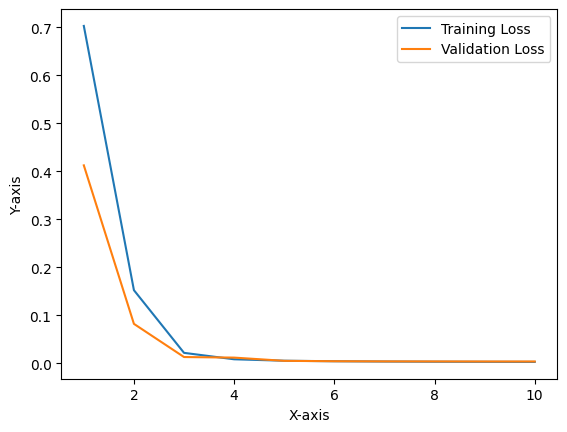

In [23]:
# prompt: plot a graph of following data:
# 1   0.702900	0.412326
# 2	0.152200	0.082027
# 3	0.021600	0.012879
# 4	0.008200	0.011686
# 5	0.005200	0.004955
# 6	0.004100	0.004149
# 7	0.003500	0.003836
# 8	0.003100	0.003733
# 9	0.002900	0.003627
# 10	0.002700	0.003622

import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [0.702900, 0.152200, 0.021600, 0.008200, 0.005200, 0.004100, 0.003500, 0.003100, 0.002900, 0.002700]
y2 = [0.412326, 0.082027, 0.012879, 0.011686, 0.004955, 0.004149, 0.003836, 0.003733, 0.003627, 0.003622]

# Plotting
plt.plot(x, y1, label="Training Loss")
plt.plot(x, y2, label="Validation Loss")

# Adding labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
# 8. –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ
predictions = trainer.predict(eval_encoded)  # –ò—Å–ø–æ–ª—å–∑—É–µ–º eval_encoded
predicted_labels = np.argmax(predictions.predictions, axis=1)

# –ù–∞—Å—Ç–æ—è—â–∏–µ –º–µ—Ç–∫–∏ –∏–∑ eval_dataset
true_labels = eval_dataset["labels"]

# 9. –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
print(classification_report(
    true_labels,
    predicted_labels,
    target_names=["–ü—Ä–µ—Ç–µ–Ω–∑–∏—è", "–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ", "–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å"],
    zero_division=0
))

               precision    recall  f1-score   support

    –ü—Ä–µ—Ç–µ–Ω–∑–∏—è       1.00      1.00      1.00        28
  –ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ       1.00      1.00      1.00        28
–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å       1.00      1.00      1.00        28

     accuracy                           1.00        84
    macro avg       1.00      1.00      1.00        84
 weighted avg       1.00      1.00      1.00        84



In [ ]:
from collections import Counter

# –ü–æ–¥—Å—á–µ—Ç –ø—Ä–∏–º–µ—Ä–æ–≤ –≤ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
print(Counter(train_dataset["labels"]))
print(Counter(predicted_labels))
probabilities = predictions.predictions  # –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
print(probabilities[:5])  # –ü–æ—Å–º–æ—Ç—Ä–µ—Ç—å –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫

Counter({0: 115, 2: 112, 1: 109})
Counter({1: 28, 2: 28, 0: 28})
[[-2.419004   4.408874  -2.2752738]
 [-2.43021   -2.2530484  4.7402425]
 [-2.395019   4.4203725 -2.318798 ]
 [-2.5258193 -2.2053206  4.71223  ]
 [-2.460894  -2.2283852  4.7362494]]


In [ ]:
incorrect_predictions = [
    (true, pred, text)
    for true, pred, text in zip(true_labels, predicted_labels, eval_texts)
    if true != pred
]
for true, pred, text in incorrect_predictions:
    print(f"True: {true}, Predicted: {pred}, Text: {text}")

In [11]:
from transformers import pipeline

# –ó–∞–≥—Ä—É–∑–∫–∞ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞
model_path = "./drive/MyDrive/Esenin colab/finetuned_rubert"  # –ü—É—Ç—å –∫ –≤–∞—à–µ–π –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏
classifier = pipeline("text-classification", model=model_path, tokenizer=model_path)

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
def classify_feedback(feedbacks):
    """
    –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Å–ø–∏—Å–∫–∞ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º.
    :param feedbacks: List[str] - –°–ø–∏—Å–æ–∫ —Ç–µ–∫—Å—Ç–æ–≤ –æ—Ç–∑—ã–≤–æ–≤
    :return: List[Dict] - –°–ø–∏—Å–æ–∫ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–π —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏
    """
    results = classifier(feedbacks)
    return [
        {
            "text": feedback,
            "label": result["label"],
            "score": round(result["score"], 2)  # –£–¥–æ–±–Ω–æ–µ –æ–∫—Ä—É–≥–ª–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
        }
        for feedback, result in zip(feedbacks, results)
    ]


Device set to use cpu


In [19]:
# –ü—Ä–∏–º–µ—Ä –æ—Ç–∑—ã–≤–æ–≤
feedbacks = [
    # "–¢–æ–≤–∞—Ä –¥–æ—Å—Ç–∞–≤–∏–ª–∏ –ø–æ–∑–¥–Ω–æ",
    # "–î–æ–±–∞–≤—å—Ç–µ –±–æ–ª—å—à–µ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –¥–æ—Å—Ç–∞–≤–∫–∏",
    # "–°–ø–∞—Å–∏–±–æ –∑–∞ –±—ã—Å—Ç—Ä–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ",
    # "–ö–∞—á–µ—Å—Ç–≤–æ —Ç–æ–≤–∞—Ä–∞ –º–µ–Ω—è –ø–æ–ª–Ω–æ—Å—Ç—å—é —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç",
    # "–ü–æ—á–µ–º—É —Ç–∞–∫ –¥–æ–ª–≥–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç—Å—è –∑–∞–∫–∞–∑?",
    # "–ú–æ–∂–µ—Ç –±—ã—Ç—å, –≤—ã –¥–æ–±–∞–≤–∏—Ç–µ –ø–æ–¥–¥–µ—Ä–∂–∫—É –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è?",
    """
    –ü—Ä–æ—à—É —Ä–µ–≥—É–ª—è—Ç–æ—Ä–Ω–æ –Ω–∞–¥–∑–∏—Ä–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ä–≥–∞–Ω—ã –≤ —á–∞—Å—Ç–∏ –∫–æ–Ω—Ç—Ä–æ–ª—è –∑–∞ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º–∏ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è–º–∏ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –º–æ–π –æ—Ç–∑—ã–≤!
    –ò –Ω–∞ –±–∞–Ω–∫ –≤ —Ü–µ–ª–æ–º –∏ –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∞ ¬´—Ñ–ª–∞–≥–º–∞–Ω—Å–∫–∏–π¬ª –æ—Ñ–∏—Å ¬´–î–û –ö–∏—Ç–∞–π-–≥–æ—Ä–æ–¥¬ª .
    –°–µ–≥–æ–¥–Ω—è 06.12.24 —è –±—ã–ª–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∫–ª–∏–µ–Ω—Ç–∞ –±–∞–Ω–∫–∞ –∏ –æ–∂–∏–¥–∞—è —Å–≤–æ—é –æ—á–µ—Ä–µ–¥—å —Å—Ç–∞–ª–∞ –Ω–µ–≤–æ–ª—å–Ω–æ–π —Å–≤–∏–¥–µ—Ç–µ–ª—å–Ω–∏—Ü–µ–π –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ —Å–µ—Ä—å–µ–∑–Ω–æ–≥–æ –Ω–∞—Ä—É—à–µ–Ω–∏—è!
    –ú–Ω–æ—é –ó–∞–º–µ—á–µ–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ–µ –Ω–∞—Ä—É—à–µ–Ω–∏–µ –∑–∞–∫–æ–Ω–æ–¥–∞—Ç–µ–ª—å–Ω–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –≤ —á–∞—Å—Ç–∏ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–∞–Ω–∫–∞ , –∞ –∏–º–µ–Ω–Ω–æ: –ü–æ–∫–∞ —è —Å–∏–¥–µ–ª–∞ –≤ –æ—á–µ—Ä–µ–¥–∏ —è —É—Å–ª—ã—à–∞–ª–∞ —Ä–∞–∑–≥–æ–≤–æ—Ä —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü—ã —Ä–∞–±–æ—Ç–∞—é—â–µ–π –≤ –æ–∫–Ω–µ 3 (–Ω–µ –∑–Ω–∞—é –µ–µ –∏–º–µ–Ω–∏) –∏ –∫–ª–∏–µ–Ω—Ç–∞ –∫–æ—Ç–æ—Ä—ã–π –±—ã–ª –Ω–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏ –≤ –µ–µ –æ–∫–Ω–µ. –°–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ –ø–æ–ø—Ä–æ—Å–∏–ª–∞ –∫–ª–∏–µ–Ω—Ç–∞ –ø—Ä–µ–¥—ä—è–≤–∏—Ç—å –ø–∞—Å–ø–æ—Ä—Ç , –Ω–∞ —á—Ç–æ –∫–ª–∏–µ–Ω—Ç –¥–∞–ª –µ–π —Å–≤–æ–µ –≤–æ–¥–∏—Ç–µ–ª—å—Å–∫–æ–µ —É–¥–æ—Å—Ç–æ–≤–µ—Ä–µ–Ω–∏–µ,–Ω–æ —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ –≤—Å–µ –µ—â–µ —Ç—Ä–µ–±–æ–≤–∞–ª–∞ –ø–∞—Å–ø–æ—Ä—Ç.
    –ö–ª–∏–µ–Ω—Ç –æ—Ç–∫–∞–∑—ã–≤–∞–ª—Å—è –¥–∞–≤–∞—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–µ —Å–≤–æ–π –ø–∞—Å–ø–æ—Ä—Ç , –º–æ—Ç–∏–≤–∏—Ä—É—è —ç—Ç–æ —Ç–µ–º, —á—Ç–æ –æ–Ω –≤–æ–ª–Ω—É–µ—Ç—Å—è –∑–∞ —Å–≤–æ–∏ –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ ¬´–∫–ª–∏–µ–Ω—Ç –≤—Å–µ–≥–¥–∞ –ø—Ä–∞–≤¬ª, —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ –ø—Ä–∏ —ç—Ç–æ–º —Å–∫–∞–∑–∞–ª–∞ —á—Ç–æ –ø–∞—Å–ø–æ—Ä—Ç –∫–∞–∫ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –¥–æ–∫—É–º–µ–Ω—Ç —É–¥–æ—Å—Ç–æ–≤–µ—Ä—è—é—â–∏–π –ª–∏—á–Ω–æ—Å—Ç—å –æ–Ω–∏ –æ–±—è–∑–∞–Ω—ã –ø—Ä–æ–≤–µ—Ä—è—Ç—å –Ω–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–º –ø—Ä–∏–±–æ—Ä–µ –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç —Ç–æ–≥–æ –Ω–µ –ø–æ–¥–¥–µ–ª—å–Ω—ã–π –ª–∏ –æ–Ω –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ.
    –î–∞–ª–µ–µ —è –æ—Ç–≤–ª–µ–∫–ª–∞—Å—å –Ω–∞ —Ç–µ–ª–µ—Ñ–æ–Ω –∏ –ø—Ä–æ–ø—É—Å—Ç–∏–ª–∞ —á–∞—Å—Ç—å –∏—Ö –¥–∏–∞–ª–æ–≥–∞ ( –æ—á–µ–Ω—å –∂–∞–ª—å!) –∏ –≤–∫–ª—é—á–∏–ª–∞—Å—å –æ–±—Ä–∞—Ç–Ω–æ –≤ –ø—Ä–æ—Ü–µ—Å—Å –Ω–∞ —Ç–æ–º, —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ (–≤–º–µ—Å—Ç–µ —Å –ï–ª–∏–∑–∞–≤–µ—Ç–æ–π –∏–∑ –æ–∫–Ω–∞ 2) –∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä–æ–≤–∞–ª–∏ –∫–ª–∏–µ–Ω—Ç–∞ –ø–æ –≤–æ–ø—Ä–æ—Å—É —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ (–∏–∑ –¥–∏–∞–ª–æ–≥–∞ –º–Ω–µ —Å—Ç–∞–ª–æ –ø–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ –∫–ª–∏–µ–Ω—Ç –≤–ª–∞–¥–µ–µ—Ç —Ü–µ–Ω–Ω—ã–º–∏ –±—É–º–∞–≥–∞–º–∏ –∏ —è–≤–ª—è–µ—Ç—Å—è –∫–ª–∏–µ–Ω—Ç–æ–º VIP —Å–µ–≥–º–µ–Ω—Ç–∞ orange premium club.
    –°–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ —É—Ç–æ—á–Ω—è–ª–∞ —É –∫–ª–∏–µ–Ω—Ç–∞ —á—Ç–æ-—Ç–æ —Å–≤—è–∑–∞–Ω–Ω–æ–µ —Å —Ü–∏—Ñ—Ä–∞–º–∏ –Ω–∞ –µ–≥–æ —Å—á–µ—Ç–µ –∏ –≤—Å–µ —ç—Ç–æ –±—ã–ª–æ –ü–û–°–õ–ï —Ç–æ–≥–æ –∫–∞–∫ –∫–ª–∏–µ–Ω—Ç–∞ –ø—Ä–æ—Å–∏–ª–∏ –¥–∞—Ç—å –ø–∞—Å–ø–æ—Ä—Ç –∏ –æ–Ω –æ—Ç–∫–∞–∑–∞–ª—Å—è. –ü—Ä–æ—à—É –ø—Ä–æ–≤–µ—Å—Ç–∏ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—É—é –ø—Ä–æ–≤–µ—Ä–∫—É —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ ¬´–î–û –ö–∏—Ç–∞–π –≥–æ—Ä–æ–¥¬ª –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç –¥–∞–Ω–Ω–æ–≥–æ –∏–Ω—Ü–∏–¥–µ–Ω—Ç–∞ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –≤–ª–µ–∫—É—â–µ–≥–æ –∑–∞ —Å–æ–±–æ–π –æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–Ω—ã–µ , —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ –∏ —Ä–µ–≥—É–ª—è—Ç–æ—Ä—ã–µ —Ä–∏—Å–∫–∏ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–∞ –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å!
    –¢–∞–∫–∞—è —Ä–∞–±–æ—Ç–∞ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º–∞!
    –Ω—É –∏ –∫–æ–Ω–µ—á–Ω–æ —Ä–∞–∑ —É–∂ —Ç–∞–∫–∏–µ –Ω–∞—Ä—É—à–µ–Ω–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å , —Ç–æ –æ—Å—Ç–∞–ª—å–Ω–æ–µ —É–∂–µ –∫–∞–∂–µ—Ç—Å—è –∏–≥–æ–ª–∫–æ–π –≤ —Å—Ç–æ–≥—É —Å–µ–Ω–∞ :
    2) –Ø –ø—Ä–æ–∂–¥–∞–ª–∞ –æ—á–µ—Ä–µ–¥—å –ø–æ —Å–≤–æ–µ–º—É —Ç–∞–ª–æ–Ω—É –±–æ–ª–µ–µ 1,5 —á–∞—Å–æ–≤ –≤–≤–∏–¥—É —Ç–æ–≥–æ —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞ –ï–ª–∏–∑–∞–≤–µ—Ç–∞ (–æ–∫–Ω–æ 2) –∑–∞–±–∏—Ä–∞–ª–∞ –¥—Ä—É–≥–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–µ–∑ –æ—á–µ—Ä–µ–¥–∏ –ø—Ä–∏ —ç—Ç–æ–º –¥–µ–ª–∞–ª–∞ –∏–º –∑–∞–º–µ—á–∞–Ω–∏—è –Ω–æ –Ω–µ –ø—Ä–æ—Å–∏–ª–∞ –ø–æ–∫–∏–Ω—É—Ç—å –æ–∫–Ω–æ –∏ –ø—Ä–æ–¥–æ–ª–∂–∞–ª–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ.
    3) –°–æ—Ç—Ä—É–¥–Ω–∏—Ü—ã —É–º—É–¥—Ä–∏–ª–∏—Å—å –ø–æ—Ç–µ—Ä—è—Ç—å –º–æ–π —Ç–∞–ª–æ–Ω —Å –Ω–æ–º–µ—Ä–æ–º –ü–ö–û (–∑–∞—á–µ–º-—Ç–æ –Ω–æ–º–µ—Ä –æ—Ä–¥–µ—Ä–∞ –æ–Ω–∏ –ø–∏—à—É—Ç —Ä—É—á–∫–æ–π –Ω–∞ —Ç–∞–ª–æ–Ω–∞—Ö –ø–æ –∫–æ—Ç–æ—Ä—ã–º –≤—ã–∑—ã–≤–∞—é—Ç –∫–ª–∏–µ–Ω—Ç–æ–≤) –∑–∞ –¥–≤–∞ —à–∞–≥–∞ –æ—Ç –æ–∫–Ω–∞ –¥–æ –∫–∞—Å—Å—ã –±–µ–∑ –∫–æ—Ç–æ—Ä–æ–≥–æ –Ω–µ —Å–º–æ–≥–ª–∏ –º–Ω–µ –≤–Ω–µ—Å—Ç–∏ –¥–µ–Ω—å–≥–∏ –Ω–∞ —Å—á–µ—Ç –∏ —Ç—Ä–µ–±–æ–≤–∞–ª–∏ –µ–≥–æ —Å –º–µ–Ω—è.
    –Ø –Ω–∞—á–∞–ª–∞ –≤–æ–∑–º—É—â–∞—Ç—å—Å—è –Ω–∞ —Å—á–µ—Ç —Ç–æ–≥–æ —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±–∞–Ω–∫–∞ –≤–≤–æ–¥—è—Ç –º–µ–Ω—è –∫–∞–∫ –∫–ª–∏–µ–Ω—Ç–∞ –≤ –∑–∞–±–ª—É–∂–¥–µ–Ω–∏–µ , –Ω–∞ —á—Ç–æ —É—Å–ª—ã—à–∞–≤ –ï–ª–∏–∑–∞–≤–µ—Ç–∞ –ø—Ä–∏—à–ª–∞ –∏ –Ω–∞—á–∞–ª–∞ —É–≥—Ä–æ–∂–∞—Ç—å –º–Ω–µ —á—Ç–æ –ø–æ–∑–æ–≤–µ—Ç –æ—Ö—Ä–∞–Ω—É –∏ –Ω–∞–∂–º–µ—Ç —Ç—Ä–µ–≤–æ–∂–Ω—É—é –∫–Ω–æ–ø–∫—É.
    """,
    """
    –î–æ–±—Ä—ã–π –¥–µ–Ω—å!
    –•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –∏—Å–∫—Ä–µ–Ω–Ω—é—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫—É –†-–≤–æ–π –ú–∞—Ä–∏–∏ –ë. - —É–ø—Ä–∞–≤–ª—è—é—â–µ–º—É –î–û ¬´–ü–æ–±–µ–¥–∞¬ª –≤ –≥. –°–∞–º–∞—Ä–∞ –ø–æ –∞–¥—Ä–µ—Å—É —É–ª. –ü–æ–±–µ–¥—ã, –¥. 92 –∑–∞ –µ–µ –∫–æ–º–ø–µ—Ç–µ–Ω—Ç–Ω–æ—Å—Ç—å, –¥–æ–±—Ä–æ–∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å, –∑–∞ –Ω–µ—Ä–∞–≤–Ω–æ–¥—É—à–∏–µ –∏ —É–º–µ–Ω–∏–µ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–ª–∏–µ–Ω—Ç–∞–º–∏.
    12.11.2024–≥ —è –ø–∏—Å—å–º–µ–Ω–Ω–æ –æ–±—Ä–∞—Ç–∏–ª–∞—Å—å –≤ –ü–°–ë —Å –≤–æ–ø—Ä–æ—Å–æ–º –æ —Ç–æ–º, –ø–æ—á–µ–º—É —É—Å–ª–æ–≤–∏—è –æ—Ç–∫—Ä—ã—Ç–æ–≥–æ –º–Ω–æ–π –≤–∫–ª–∞–¥–∞ –≤ –î–æ–≥–æ–≤–æ—Ä–µ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è —Å —É—Å–ª–æ–≤–∏—è–º–∏ —ç—Ç–æ–≥–æ –∂–µ –≤–∫–ª–∞–¥–∞ –≤ –º–æ–±–∏–ª—å–Ω–æ–º –±–∞–Ω–∫–µ. –ö–ª–∏–µ–Ω—Ç—Å–∫–∏–π –æ—Ç–¥–µ–ª –ü—Ä–∏–≤–æ–ª–∂—Å–∫–æ–≥–æ —Ñ–∏–ª–∏–∞–ª–∞ –ü–ê–° –ü–°–ë, –∫—É–¥–∞ –±—ã–ª–∏ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω—ã –º–æ–∏ –ø–∏—Å—å–º–µ–Ω–Ω—ã–µ –∑–∞–ø—Ä–æ—Å—ã, –æ–≥—Ä–∞–Ω–∏—á–∏–ª—Å—è —Ñ–æ—Ä–º–∞–ª—å–Ω—ã–º–∏ –æ—Ç–ø–∏—Å–∫–∞–º–∏ ‚Äì —Ü–∏—Ç–∞—Ç–æ–π –∏–∑ —É—Å–ª–æ–≤–∏–π, –ø—Ä–µ–¥—É—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –î–æ–≥–æ–≤–æ—Ä–æ–º, –Ω–æ –Ω–µ –æ–±—ä—è—Å–Ω—è—é—â–∏—Ö –∫–æ–Ω–∫—Ä–µ—Ç–Ω—É—é —Å–∏—Ç—É–∞—Ü–∏—é.
    –ú–∞—Ä–∏—è –ë. ‚Äì –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π —Å–æ—Ç—Ä—É–¥–Ω–∏–∫, –∫–æ—Ç–æ—Ä—ã–π –¥–æ—Å–∫–æ–Ω–∞–ª—å–Ω–æ —Ä–∞–∑–æ–±—Ä–∞–ª—Å—è –≤ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–µ–º –º–µ–Ω—è –≤–æ–ø—Ä–æ—Å–µ, –ø–æ–Ω—è–≤ –µ–≥–æ —Å—É—Ç—å. –ò–º–µ–Ω–Ω–æ –æ–Ω–∞ –Ω–∞—à–ª–∞ –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö –ü–°–ë –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏.
    –°–ø–∞—Å–∏–±–æ –í–∞–º, –ú–∞—Ä–∏—è –ë.!
    """,
    """
    –ß–µ—Ç—ã—Ä–µ –¥–Ω—è –Ω–∞–∑–∞–¥ –ø–æ–ª—É—á–∏–ª–∞ –¥–µ–±–µ—Ç–æ–≤—É—é –∫–∞—Ä—Ç—É –ü–°–ë (–¥–æ—Å—Ç–∞–≤–∫–∞ –∫—É—Ä—å–µ—Ä–æ–º) –ö–∞—Ä—Ç–∞ –Ω–µ –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–∞ –¥–æ —Å–∏—Ö –ø–æ—Ä ("–Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞ –¥–ª—è –≤—Ö–æ–¥–∞", —Ç.–∫.
    –∫—É—Ä—å–µ—Ä –Ω–µ –ø–µ—Ä–µ–¥–∞–ª —Å–≤–µ–¥–µ–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫–∞") –ü–æ–≤—Ç–æ—Ä–Ω—ã–µ –æ–±—Ä–∞—â–µ–Ω–∏—è –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏ - –±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞! –ü–æ–ª–Ω–∞—è –Ω–µ—Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫—É—Ä—å–µ—Ä—Å–∫–æ–π —Å–ª—É–∂–±—ã –∏ —Å–ª—É–∂–±—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏! –ü–æ–∑–æ—Ä!
    """,
    """
    –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –ù–µ–¥–∞–≤–Ω–æ —É–∑–Ω–∞–ª, —á—Ç–æ –≤ –ü—Ä–æ–º—Å–≤—è–∑—å–±–∞–Ω–∫–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç –∞–∫—Ü–∏—è "–º–æ–π —Å—É–ø–µ—Ä–ø—Ä–∏–∑". –ò —Ä–µ—à–∏–ª –æ–±—Ä–∞—Ç–∏—Ç—Å—è 18 –¥–µ–∫–∞–±—Ä—è 2024 –≥–æ–¥–∞ –≤ 13-50 –≤ —á–∞—Ç –±–∞–Ω–∫–∞ –∑–∞ –ø–æ–¥—Ä–æ–±–Ω—ã–º–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è–º–∏ –ø–æ –¥–∞–Ω–Ω–æ–π –∞–∫—Ü–∏–∏.
    –û–ø–µ—Ä–∞—Ç–æ—Ä –ö–∞—Ä–∏–Ω–∞ –º–æ–º–µ–Ω—Ç–∞–ª—å–Ω–æ –ø–æ–¥–∫–ª—é—á–∏–ª–∞—Å—å –∫ –¥–∏–∞–ª–æ–≥—É, –≤–µ–∂–ª–∏–≤–æ –ø–æ–∑–¥–æ—Ä–æ–≤–∞–ª–∞—Å—å —Å–æ –º–Ω–æ–π –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª–∞ –º–Ω–µ –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è –ø–æ –¥–∞–Ω–Ω–æ–º—É –≤–æ–ø—Ä–æ—Å—É. –¢–∞–∫–∂–µ –æ–Ω–∞ –≤–∫–ª—é—á–∏–ª–∞ –º–µ–Ω—è –≤ –¥–∞–Ω–Ω—É—é –∞–∫—Ü–∏—é –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –≤ —á–∞—Ç–µ. –ê —Ç–∞–∫–∂–µ –¥–∞–ª–∞ –≤—Å—é –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∫–∞–∫–æ–π –∏–º–µ–Ω–Ω–æ —è –¥–æ–ª–∂–µ–Ω –æ—Ç–∫—Ä—ã—Ç—å –≤–∫–ª–∞–¥ –∏ –Ω–∞ –∫–∞–∫–æ–π —Å—Ä–æ–∫, —á—Ç–æ–±—ã —Å–æ–±–ª—é—Å—Ç–∏ –≤—Å–µ —É—Å–ª–æ–≤–∏—è –¥–∞–Ω–Ω–æ–π –∞–∫—Ü–∏–∏.
    –ù–∞ –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –º–æ–∏ –≤–æ–ø—Ä–æ—Å—ã –æ—Ç–≤–µ—Ç–∏–ª–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä –í–µ—Ä–æ–Ω–∏–∫–∞ –∏ –ø–æ–º–æ–≥–ª–∞ –º–Ω–µ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ –¥–∞–Ω–Ω–æ–º –≤–æ–ø—Ä–æ—Å–µ. –°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é –∏ –≥—Ä–∞–º–æ—Ç–Ω—É—é –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é. –°–∞–º –±—ã —è –Ω–µ —Ä–∞–∑–æ–±—Ä–∞–ª—Å—è.
    """,
    """
    –û—Ñ–æ—Ä–º–∏–ª –∫—Ä–µ–¥–∏—Ç–∫—É 100+. –ò–∑ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤ - —Ä–µ–∞–ª—å–Ω—ã–µ 100 –¥–Ω–µ–π –≥—Ä–µ–π—Å-–ø–µ—Ä–∏–æ–¥–∞ (–Ω–∞ –ø–æ–∫—É–ø–∫–∏, —Ä–∞–∑—É–º–µ–µ—Ç—Å—è, –Ω–∏–∫–∞–∫–æ–≥–æ —Å–Ω—è—Ç–∏—è –Ω–∞–ª–∏—á–Ω—ã—Ö –∏–ª–∏ –ø–µ—Ä–µ–≤–æ–¥–æ–≤ - –Ω–∞ –Ω–∏—Ö –±—É–¥—É—Ç –Ω–∞—á–∏—Å–ª—è—Ç—å—Å—è –ø—Ä–æ—Ü–µ–Ω—Ç—ã - —É—á—Ç–∏—Ç–µ —ç—Ç–æ!). –≠—Ç–æ —Å–µ–π—á–∞—Å –Ω–µ —É –º–Ω–æ–≥–∏—Ö –±–∞–Ω–∫–æ–≤, –µ—Å–ª–∏ –¥–µ—Ç–∞–ª—å–Ω–æ –ø—Ä—è–º —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è. –ù–æ, —Å–ø—Ä–æ—Å–∏–ª –≤ —á–∞—Ç–µ –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –≥–¥–µ –∏ –∫–∞–∫ —É–≤–∏–¥–µ—Ç—å —Å—Ä–æ–∫ –æ–∫–æ–Ω—á–∞–Ω–∏—è –ª—å–≥–æ—Ç–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞? –ü—Ä–∏–≤—ã–∫ –≤ —Å–≤–æ–µ –≤—Ä–µ–º—è —Å –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ–π –∫–∞—Ä—Ç–æ–π –ê–ª—å—Ñ—ã: –ª—å–≥–æ—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥ —Å —Ç–∞–∫–æ–≥–æ-—Ç–æ –ø–æ —Ç–∞–∫–æ–µ-—Ç–æ, –Ω–∞—á–∞–ª–æ –∏ –æ–∫–æ–Ω—á–∞–Ω–∏–µ —á–µ—Ç–∫–æ –≤–∏–¥–Ω—ã –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏. –í–æ—Ç –∏ —Ç—É—Ç –∂–¥–∞–ª —á–µ–≥–æ-—Ç–æ –ø–æ–¥–æ–±–Ω–æ–≥–æ... –ê –æ–ø–µ—Ä–∞—Ç–æ—Ä –æ—Ç–≤–µ—á–∞–µ—Ç (–ø—Ä—è–º, –ø—Ä–æ—Ü–∏—Ç–∏—Ä—É—é): "–ü—Ä–æ–≤–µ—Ä–∏–ª–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é. –ù–∞ —Ç–µ–∫—É—â–∏–π –º–æ–º–µ–Ω—Ç –¥–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –ª—å–≥–æ—Ç–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –ø–æ –≤–∞—à–µ–π –∫–∞—Ä—Ç–µ - 05.09.2024–≥.
    –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–∏ –ª—å–≥–æ—Ç–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –≤ –ª–∏—á–Ω–æ–º –∫–∞–±–∏–Ω–µ—Ç–µ –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –≤ —Ç–æ–º –º–µ—Å—è—Ü–µ, –∫–æ–≥–¥–∞ –∏—Å—Ç–µ–∫–∞–µ—Ç –ª—å–≥–æ—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥.". –õ–∞–¥–Ω–æ, —É –º–µ–Ω—è –ª–∏–º–∏—Ç - 2/3 –∑–∞—Ä–ø–ª–∞—Ç—ã. –¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏, –ø—Ä–æ–±–ª–µ–º –≤–æ–∑–Ω–∏–∫–Ω—É—Ç—å –Ω–µ –¥–æ–ª–∂–Ω–æ. –ù–æ, –≤–æ-–ø–µ—Ä–≤—ã—Ö, –Ω–∞ —Ç—É –∂–µ –∑–ø –º–æ–≥—É—Ç –±—ã—Ç—å —Å–≤–æ–∏ –ø–ª–∞–Ω—ã, –Ω–∏–∫–∞–∫ –Ω–µ —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –ø–æ–≥–∞—à–µ–Ω–∏–µ–º –¥–æ–ª–≥–∞ –ø–æ –∫—Ä–µ–¥–∏—Ç–∫–µ, –≤–æ-–≤—Ç–æ—Ä—ã—Ö, –∞ –µ—Å–ª–∏ –± –ª–∏–º–∏—Ç –±—ã–ª —Ç—Ä–∏ –∑–∞—Ä–ø–ª–∞—Ç—ã? –í–æ—Ç, —É–∑–Ω–∞—é —è –ø–µ—Ä–≤–æ–≥–æ —Å–µ–Ω—Ç—è–±—Ä—è, —á—Ç–æ —É –º–µ–Ω—è –¥–æ–ª–≥ 2,5 –∑–∞—Ä–ø–ª–∞—Ç—ã (–¥–æ–ø—É—Å—Ç–∏–º, –¥–æ —ç—Ç–æ–≥–æ –ø–ª–∞—Ç–∏–ª —Ç–æ–ª—å–∫–æ –º–∏–Ω–∏–º–∞–ª–∫–∏), –∞ –ø—è—Ç–æ–≥–æ –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è –≥—Ä–µ–π—Å-–ø–µ—Ä–∏–æ–¥. –ò, —á—Ç–æ –¥–µ–ª–∞—Ç—å??? –í –æ–±—â–µ–º, –∫–∞–∫-—Ç–æ –Ω–µ –ø–æ–Ω—è–ª —è, –∑–∞—á–µ–º —Å–∫—Ä—ã–≤–∞—Ç—å –æ—Ç –∫–ª–∏–µ–Ω—Ç–∞ –¥–∞—Ç—É –æ–∫–æ–Ω—á–∞–Ω–∏—è –≥—Ä–µ–π—Å–∞, –Ω–µ –¥–∞–≤–∞—è –µ–º—É –ø–ª–∞–Ω–∏—Ä–æ–≤–∞—Ç—å –≤—ã—Ö–æ–¥ –Ω–∞ —ç—Ç—É –¥–∞—Ç—É, –∏ —Å–æ–∑–¥–∞–≤–∞—è —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –¥–ª—è –Ω–µ–≥–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ —Ä–∏—Å–∫–∏. –ü–æ—ç—Ç–æ–º—É, –∫–∞—Ä—Ç—É –≤ –Ω–∞—á–∞–ª–µ –∏—é–Ω—è –∑–∞–∫—Ä–æ—é. –ê —á–∏—Ç–∞—Ç–µ–ª—è–º –ø—Ä–æ—Å—Ç–æ —Å–æ–≤–µ—Ç—É—é –∏–º–µ—Ç—å –≤—ã—à–µ–∏–∑–ª–æ–∂–µ–Ω–Ω–æ–µ –≤ –≤–∏–¥—É.
    """,
    "–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ —Ä–∞–±–æ—Ç–æ–π –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ –±–∞–Ω–∫–∞ –ü–°–ë. –Ø –ø—ã—Ç–∞–ª—Å—è —Å–≤—è–∑–∞—Ç—å—Å—è —Å –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º, —á—Ç–æ–±—ã —É—Ç–æ—á–Ω–∏—Ç—å –¥–µ—Ç–∞–ª–∏ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –Ω–æ –º–Ω–µ –ø—Ä–∏—à–ª–æ—Å—å –∂–¥–∞—Ç—å –±–æ–ª–µ–µ 30 –º–∏–Ω—É—Ç, –ø—Ä–µ–∂–¥–µ —á–µ–º –º–µ–Ω—è —Å–æ–µ–¥–∏–Ω–∏–ª–∏. –ö–æ–≥–¥–∞ –Ω–∞–∫–æ–Ω–µ—Ü —É–¥–∞–ª–æ—Å—å –ø–æ–≥–æ–≤–æ—Ä–∏—Ç—å —Å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–º, –µ–≥–æ –æ—Ç–≤–µ—Ç—ã –±—ã–ª–∏ –Ω–∞—Å—Ç–æ–ª—å–∫–æ –æ–±—â–∏–º–∏, —á—Ç–æ —è –Ω–µ –ø–æ–ª—É—á–∏–ª –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∑–∞ –∫–æ—Ç–æ—Ä–æ–π –æ–±—Ä–∞—Ç–∏–ª—Å—è. –í –∏—Ç–æ–≥–µ –º–Ω–µ –ø—Ä–∏—à–ª–æ—Å—å –∏–¥—Ç–∏ –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —á—Ç–æ–±—ã —Ä–µ—à–∏—Ç—å –≤–æ–ø—Ä–æ—Å, —á—Ç–æ –∑–∞–Ω—è–ª–æ –µ—â—ë –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å–æ–≤. –û—á–µ–Ω—å –Ω–∞–¥–µ—é—Å—å, —á—Ç–æ –≤—ã –ø–µ—Ä–µ—Å–º–æ—Ç—Ä–∏—Ç–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—é —Ä–∞–±–æ—Ç—ã –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏, —á—Ç–æ–±—ã –ø–æ–¥–æ–±–Ω—ã–µ —Å–∏—Ç—É–∞—Ü–∏–∏ –Ω–µ –ø–æ–≤—Ç–æ—Ä—è–ª–∏—Å—å.",
    "–•–æ—Ç–µ–ª–æ—Å—å –±—ã –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å –±–∞–Ω–∫—É –ü–°–ë —É–ª—É—á—à–∏—Ç—å —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è. –ù–∞–ø—Ä–∏–º–µ—Ä, –±—ã–ª–æ –±—ã –ø–æ–ª–µ–∑–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≥–∏–±–∫–æ–≥–æ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –±—é–¥–∂–µ—Ç–∞ —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Ä–∞—Å—Ö–æ–¥–æ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º. –≠—Ç–æ –ø–æ–º–æ–≥–ª–æ –±—ã –∫–ª–∏–µ–Ω—Ç–∞–º –ª—É—á—à–µ –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä–æ–≤–∞—Ç—å —Å–≤–æ–∏ —Ñ–∏–Ω–∞–Ω—Å—ã –∏ –≤–∏–¥–µ—Ç—å, –∫—É–¥–∞ —É—Ö–æ–¥—è—Ç –¥–µ–Ω—å–≥–∏. –¢–∞–∫–∂–µ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–µ–¥—É—Å—Ç–∞–Ω–æ–≤–∫–∏ —à–∞–±–ª–æ–Ω–æ–≤ –¥–ª—è —á–∞—Å—Ç—ã—Ö –ø–ª–∞—Ç–µ–∂–µ–π, —á—Ç–æ–±—ã –Ω–µ –≤–≤–æ–¥–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –≤—Ä—É—á–Ω—É—é –∫–∞–∂–¥—ã–π —Ä–∞–∑. –¢–∞–∫–∏–µ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è —Å–¥–µ–ª–∞–ª–∏ –±—ã –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –µ—â—ë –±–æ–ª–µ–µ —É–¥–æ–±–Ω—ã–º –∏ –ø–æ–ª–µ–∑–Ω—ã–º –≤ –ø–æ–≤—Å–µ–¥–Ω–µ–≤–Ω–æ–π –∂–∏–∑–Ω–∏.",
    "–•–æ—á—É –≤—ã—Ä–∞–∑–∏—Ç—å –æ–≥—Ä–æ–º–Ω—É—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º –±–∞–Ω–∫–∞ –ü–°–ë –∑–∞ –ø–æ–º–æ—â—å –≤ —Å–ª–æ–∂–Ω–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏. –£ –º–µ–Ω—è –ø—Ä–æ–∏–∑–æ—à–ª–∞ –æ—à–∏–±–∫–∞ –ø—Ä–∏ –ø–µ—Ä–µ–≤–æ–¥–µ –∫—Ä—É–ø–Ω–æ–π —Å—É–º–º—ã, –∏ –¥–µ–Ω—å–≥–∏ —É—à–ª–∏ –Ω–µ –Ω–∞ —Ç–æ—Ç —Å—á—ë—Ç. –Ø —Å—Ä–∞–∑—É –æ–±—Ä–∞—Ç–∏–ª—Å—è –≤ —Å–ª—É–∂–±—É –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –Ω–µ —Ç–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ –ø—Ä–∏–Ω—è–ª–∏ –º–æ–π –∑–∞–ø—Ä–æ—Å, –Ω–æ –∏ –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏, –∫–∞–∫–∏–µ —à–∞–≥–∏ –Ω—É–∂–Ω–æ –ø—Ä–µ–¥–ø—Ä–∏–Ω—è—Ç—å, —á—Ç–æ–±—ã –≤–µ—Ä–Ω—É—Ç—å —Å—Ä–µ–¥—Å—Ç–≤–∞. –£–∂–µ —á–µ—Ä–µ–∑ –¥–≤–∞ –¥–Ω—è –¥–µ–Ω—å–≥–∏ –±—ã–ª–∏ –≤–æ–∑–≤—Ä–∞—â–µ–Ω—ã –Ω–∞ –º–æ–π —Å—á—ë—Ç, –∞ –≤–µ—Å—å –ø—Ä–æ—Ü–µ—Å—Å —Å–æ–ø—Ä–æ–≤–æ–∂–¥–∞–ª—Å—è –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ–π –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–µ–π. –û—á–µ–Ω—å —Ä–∞–¥, —á—Ç–æ –≤—ã–±—Ä–∞–ª –≤–∞—à –±–∞–Ω–∫ ‚Äî –∑–¥–µ—Å—å —Ä–∞–±–æ—Ç–∞—é—Ç –Ω–∞—Å—Ç–æ—è—â–∏–µ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—ã!",
    "–û—á–µ–Ω—å —Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω –∫–∞—á–µ—Å—Ç–≤–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –±–∞–Ω–∫–∞ –ü–°–ë. –ù–µ–¥–∞–≤–Ω–æ –ø—Ä–∏—à—ë–ª, —á—Ç–æ–±—ã –æ—Ç–∫—Ä—ã—Ç—å —Å—á—ë—Ç, –∏ —Å—Ç–æ–ª–∫–Ω—É–ª—Å—è —Å –Ω–µ–æ—Ä–≥–∞–Ω–∏–∑–æ–≤–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–æ–π —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤. –í–æ-–ø–µ—Ä–≤—ã—Ö, –æ—á–µ—Ä–µ–¥—å –¥–≤–∏–≥–∞–ª–∞—Å—å –∫—Ä–∞–π–Ω–µ –º–µ–¥–ª–µ–Ω–Ω–æ, —Ö–æ—Ç—è —Ä–∞–±–æ—Ç–∞–ª–æ —Ç–æ–ª—å–∫–æ –¥–≤–∞ –æ–∫–Ω–∞ –∏–∑ –ø—è—Ç–∏. –í–æ-–≤—Ç–æ—Ä—ã—Ö, —Å–æ—Ç—Ä—É–¥–Ω–∏–∫, –∫–æ—Ç–æ—Ä—ã–π –∑–∞–Ω–∏–º–∞–ª—Å—è –º–æ–∏–º –∑–∞–ø—Ä–æ—Å–æ–º, –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –æ—Ç–≤–ª–µ–∫–∞–ª—Å—è –Ω–∞ —Ä–∞–∑–≥–æ–≤–æ—Ä—ã —Å –∫–æ–ª–ª–µ–≥–∞–º–∏, –∏–∑-–∑–∞ —á–µ–≥–æ –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –æ—Ç–∫—Ä—ã—Ç–∏—è —Å—á—ë—Ç–∞ –∑–∞–Ω—è–ª–∞ –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏, —á–µ–º —è —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–ª. –í –∏—Ç–æ–≥–µ –º–Ω–µ –ø—Ä–∏—à–ª–æ—Å—å –≤–µ—Ä–Ω—É—Ç—å—Å—è –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å, —Ç–∞–∫ –∫–∞–∫ –≤ –ø–µ—Ä–≤—ã–π —Ä–∞–∑ –Ω–µ —É—Å–ø–µ–ª–∏ –∑–∞–≤–µ—Ä—à–∏—Ç—å –≤—Å–µ –æ–ø–µ—Ä–∞—Ü–∏–∏. –ù–∞–¥–µ—é—Å—å, —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ –±–∞–Ω–∫–∞ –æ–±—Ä–∞—Ç–∏—Ç –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –ø–æ–¥–æ–±–Ω—ã–µ —Å–∏—Ç—É–∞—Ü–∏–∏ –∏ –ø—Ä–∏–º–µ—Ç –º–µ—Ä—ã –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è.",
]

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –æ—Ç–∑—ã–≤–æ–≤
classified_feedbacks = classify_feedback(feedbacks)

# –ü–µ—á–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
for feedback in classified_feedbacks:
    print(f"–û—Ç–∑—ã–≤: {feedback['text']}")
    print(f"–ö–∞—Ç–µ–≥–æ—Ä–∏—è: {feedback['label']}, –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å: {feedback['score']}\n")


–û—Ç–∑—ã–≤: 
    –ü—Ä–æ—à—É —Ä–µ–≥—É–ª—è—Ç–æ—Ä–Ω–æ –Ω–∞–¥–∑–∏—Ä–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ä–≥–∞–Ω—ã –≤ —á–∞—Å—Ç–∏ –∫–æ–Ω—Ç—Ä–æ–ª—è –∑–∞ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º–∏ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è–º–∏ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –º–æ–π –æ—Ç–∑—ã–≤!
    –ò –Ω–∞ –±–∞–Ω–∫ –≤ —Ü–µ–ª–æ–º –∏ –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∞ ¬´—Ñ–ª–∞–≥–º–∞–Ω—Å–∫–∏–π¬ª –æ—Ñ–∏—Å ¬´–î–û –ö–∏—Ç–∞–π-–≥–æ—Ä–æ–¥¬ª .
    –°–µ–≥–æ–¥–Ω—è 06.12.24 —è –±—ã–ª–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∫–ª–∏–µ–Ω—Ç–∞ –±–∞–Ω–∫–∞ –∏ –æ–∂–∏–¥–∞—è —Å–≤–æ—é –æ—á–µ—Ä–µ–¥—å —Å—Ç–∞–ª–∞ –Ω–µ–≤–æ–ª—å–Ω–æ–π —Å–≤–∏–¥–µ—Ç–µ–ª—å–Ω–∏—Ü–µ–π –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ —Å–µ—Ä—å–µ–∑–Ω–æ–≥–æ –Ω–∞—Ä—É—à–µ–Ω–∏—è!
    –ú–Ω–æ—é –ó–∞–º–µ—á–µ–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ–µ –Ω–∞—Ä—É—à–µ–Ω–∏–µ –∑–∞–∫–æ–Ω–æ–¥–∞—Ç–µ–ª—å–Ω–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –≤ —á–∞—Å—Ç–∏ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–∞–Ω–∫–∞ , –∞ –∏–º–µ–Ω–Ω–æ: –ü–æ–∫–∞ —è —Å–∏–¥–µ–ª–∞ –≤ –æ—á–µ—Ä–µ–¥–∏ —è —É—Å–ª—ã—à–∞–ª–∞ —Ä–∞–∑–≥–æ–≤–æ—Ä —Å–æ—Ç—Ä—É–¥–Ω–∏—Ü—ã —Ä–∞–±–æ—Ç–∞—é—â–µ–π –≤ –æ–∫–Ω–µ 3 (–Ω–µ –∑–Ω–∞—é –µ–µ –∏–º–µ–Ω–∏) –∏ –∫–ª–

# Test

In [12]:
def preprocessing(json_data):
    text = json_data['text'].replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('<p>', '')
    text = text.replace('</p>', '')
    text = text.replace('<ul>', '')
    text = text.replace('<li>', '')
    while '  ' in text:
        text = text.replace('  ', ' ')
    text = text.strip()
    if len(text) > 512:
        text = text[:512]
    return text

In [13]:
def load_json_data(filepath):
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            json_data = json.load(file)
            return json_data
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in '{filepath}'.")
        return None

In [14]:
# Example usage
json_data = load_json_data('./drive/MyDrive/Esenin colab/finetuned_rubert/reviews_bankiru_promsvyazbank.json')
if json_data:
    print(preprocessing(json_data[0]))

–î–æ–±—Ä—ã–π –¥–µ–Ω—å. –ù–µ–¥–∞–≤–Ω–æ —É–∑–Ω–∞–ª, —á—Ç–æ –≤ –ü—Ä–æ–º—Å–≤—è–∑—å–±–∞–Ω–∫–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç –∞–∫—Ü–∏—è "–º–æ–π —Å—É–ø–µ—Ä–ø—Ä–∏–∑". –ò —Ä–µ—à–∏–ª –æ–±—Ä–∞—Ç–∏—Ç—Å—è 18 –¥–µ–∫–∞–±—Ä—è 2024 –≥–æ–¥–∞ –≤ 13-50 –≤ —á–∞—Ç –±–∞–Ω–∫–∞ –∑–∞ –ø–æ–¥—Ä–æ–±–Ω—ã–º–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è–º–∏ –ø–æ –¥–∞–Ω–Ω–æ–π –∞–∫—Ü–∏–∏. –û–ø–µ—Ä–∞—Ç–æ—Ä –ö–∞—Ä–∏–Ω–∞ –º–æ–º–µ–Ω—Ç–∞–ª—å–Ω–æ –ø–æ–¥–∫–ª—é—á–∏–ª–∞—Å—å –∫ –¥–∏–∞–ª–æ–≥—É, –≤–µ–∂–ª–∏–≤–æ –ø–æ–∑–¥–æ—Ä–æ–≤–∞–ª–∞—Å—å —Å–æ –º–Ω–æ–π –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª–∞ –º–Ω–µ –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è –ø–æ –¥–∞–Ω–Ω–æ–º—É –≤–æ–ø—Ä–æ—Å—É. –¢–∞–∫–∂–µ –æ–Ω–∞ –≤–∫–ª—é—á–∏–ª–∞ –º–µ–Ω—è –≤ –¥–∞–Ω–Ω—É—é –∞–∫—Ü–∏—é –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –≤ —á–∞—Ç–µ. –ê —Ç–∞–∫–∂–µ –¥–∞–ª–∞ –≤—Å—é –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∫–∞–∫–æ–π –∏–º–µ–Ω–Ω–æ —è –¥–æ–ª–∂–µ–Ω –æ—Ç–∫—Ä—ã—Ç—å –≤–∫–ª–∞–¥ –∏ –Ω–∞ –∫–∞–∫–æ–π —Å—Ä–æ–∫, —á—Ç–æ–±—ã —Å–æ–±–ª—é—Å—Ç–∏ –≤—Å–µ —É—Å


In [18]:
json_data[0]

{'title': '–ö–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—è –≤ —á–∞—Ç–µ –±–∞–Ω–∫–∞ –ø–æ –∞–∫—Ü–∏–∏ ¬´–º–æ–π —Å—É–ø–µ—Ä–ø—Ä–∏–∑¬ª',
 'userName': 'user-47287494153',
 'text': '<p>–î–æ–±—Ä—ã–π –¥–µ–Ω—å. –ù–µ–¥–∞–≤–Ω–æ —É–∑–Ω–∞–ª, —á—Ç–æ –≤ –ü—Ä–æ–º—Å–≤—è–∑—å–±–∞–Ω–∫–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç –∞–∫—Ü–∏—è "–º–æ–π —Å—É–ø–µ—Ä–ø—Ä–∏–∑". –ò —Ä–µ—à–∏–ª –æ–±—Ä–∞—Ç–∏—Ç—Å—è 18 –¥–µ–∫–∞–±—Ä—è 2024 –≥–æ–¥–∞ –≤ 13-50 –≤ —á–∞—Ç –±–∞–Ω–∫–∞ –∑–∞ –ø–æ–¥—Ä–æ–±–Ω—ã–º–∏ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è–º–∏ –ø–æ –¥–∞–Ω–Ω–æ–π –∞–∫—Ü–∏–∏. \r\n\r\n–û–ø–µ—Ä–∞—Ç–æ—Ä –ö–∞—Ä–∏–Ω–∞ –º–æ–º–µ–Ω—Ç–∞–ª—å–Ω–æ –ø–æ–¥–∫–ª—é—á–∏–ª–∞—Å—å –∫ –¥–∏–∞–ª–æ–≥—É, –≤–µ–∂–ª–∏–≤–æ –ø–æ–∑–¥–æ—Ä–æ–≤–∞–ª–∞—Å—å —Å–æ –º–Ω–æ–π –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª–∞ –º–Ω–µ –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ä–∞–∑—ä—è—Å–Ω–µ–Ω–∏—è –ø–æ –¥–∞–Ω–Ω–æ–º—É –≤–æ–ø—Ä–æ—Å—É. –¢–∞–∫–∂–µ –æ–Ω–∞ –≤–∫–ª—é—á–∏–ª–∞ –º–µ–Ω—è –≤ –¥–∞–Ω–Ω—É—é –∞–∫—Ü–∏—é –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –≤ —á–∞—Ç–µ. –ê —Ç–∞–∫–∂–µ –¥–∞–ª–∞ –≤—Å—é –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∫–∞–∫–æ–π –∏–º–µ–Ω–Ω–æ —è –¥–æ–ª–∂–µ–Ω –æ—Ç–∫—Ä

In [25]:
# prompt: get the texts from json_data with preprocessing and pass them to classify_feedback. Print the output correspondingly for feedback['label']: LABEL_0 is "–ü—Ä–µ—Ç–µ–Ω–∑–∏—è", LABEL_1 is "–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ", LABEL_2 is "–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å"

LABEL_0 = "–ü—Ä–µ—Ç–µ–Ω–∑–∏—è"
LABEL_1 = "–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ"
LABEL_2 = "–ë–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å"

# Example usage
# json_data = load_json_data('./drive/MyDrive/Esenin colab/finetuned_rubert/reviews_bankiru_promsvyazbank.json')
json_data = load_json_data('./drive/MyDrive/Esenin colab/real_feedback123.json')
result = []
# json_data = json_data[:100] # !@#%!#$%!#%#$%#@$%!#!#$!%!#$%!#
texts_to_classify = []
for item in json_data:
    texts_to_classify.append(preprocessing(item))

classified_feedbacks = classify_feedback(texts_to_classify)

resmet = []
for feedback, item in zip(classified_feedbacks, json_data):
    label_mapping = {
        "LABEL_0": LABEL_0,
        "LABEL_1": LABEL_1,
        "LABEL_2": LABEL_2
    }
    resmet.append(label_mapping.get(feedback['label'], 'Unknown'))
    # result.append({
    #     'grade': item['grade'],
    #     'dateCreate': item['dateCreate'],
    #     'label': label_mapping.get(feedback['label'], 'Unknown')})
    # print(f"–û—Ç–∑—ã–≤: {feedback['text']}")
    # print(f"–ö–∞—Ç–µ–≥–æ—Ä–∏—è: {label_mapping.get(feedback['label'], 'Unknown')}, –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å: {feedback['score']}\n")


In [27]:
# prompt: compare predicted `resmet` values and the truth values from `json_data['label']`. Compute the accuracy

from sklearn.metrics import accuracy_score

# Assuming 'resmet' and 'json_data' are defined as in the previous code

true_labels = [item['label'] for item in json_data]
accuracy = accuracy_score(true_labels, resmet)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7818181818181818


In [ ]:
with open('./drive/MyDrive/Esenin colab/labeled_reviews.json', 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=4)
